#Import Library

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image, ImageDraw, ImageFont
from skimage import img_as_ubyte
import numpy as np

In [ ]:
import cv2
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

In [ ]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import xgboost 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.2)
from keras.layers import PReLU
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from copy import copy

from numpy import hstack
from numpy import array
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling1D

from scipy import stats
from scipy.stats import spearmanr

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

torch.backends.cudnn.enabled = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from PIL import Image, ImageDraw, ImageFont
from skimage import img_as_ubyte

import copy
import time

%load_ext autoreload
%autoreload 2
%matplotlib inline
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

#Import Data From Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download cdminix/us-drought-meteorological-data

100% 899M/901M [00:06<00:00, 114MB/s] 
100% 901M/901M [00:06<00:00, 145MB/s]


In [ ]:
!unzip us-drought-meteorological-data.zip

Archive:  us-drought-meteorological-data.zip
  inflating: soil_data.csv           
  inflating: test_timeseries/test_timeseries.csv  
  inflating: train_timeseries/train_timeseries.csv  
  inflating: validation_timeseries/validation_timeseries.csv  


In [ ]:
train = pd.read_csv('/content/train_timeseries/train_timeseries.csv')
#soil = pd.read_csv('/content/soil_data.csv')
validation = pd.read_csv('/content/validation_timeseries/validation_timeseries.csv')
test = pd.read_csv('/content/test_timeseries/test_timeseries.csv')
pd.set_option('display.max_columns', None)

#Choosing 9 regions of the United States Based on 9 Climate Regions in the United States

There are 9 climate regions in the United States:
1. Northeast
2. Upper Midwest
3. Ohio Valley
4. Southeast
5. Northern Rockies and Plains
6. South
7. Southwest
8. Northwest
9. West

Then, we will choose 1 state from each of the climate regions, there are:
1. New York County, New York (36061), dari Northeast 
2. Dakota County, Minnesota (27037), dari Upper Midwest
3. Jasper County, Missouri (29097), dari Ohio Valley
4. St. Lucie County, Florida (12111), dari Southeast
5. Holt County, Nebraska (31089), dari Northern Rockies and Plains
6. Clark County, Kansas (20025), dari South
7. Coconino County, Arizona (04005), dari Southwest
8. Crook County, Oregon (41013), dari Northwest
9. Los Angeles County, California (06037), dari West

Each notebook contains 3 different states for different models(MLP-and-LSTM and CNN-LSTM)

##Jasper, Missouri

###train

In [ ]:
jasper = train[train['fips']==29097]

#using interpolation to fill in the NaN values
jasper = jasper.interpolate().fillna(method='bfill')
jasper.score[jasper.score <0.5] = 0
jasper.score[(jasper.score >=0.5)&(jasper.score<1.5)] = 1
jasper.score[(jasper.score >=1.5)&(jasper.score<2.5)] = 2
jasper.score[(jasper.score >=2.5)&(jasper.score<3.5)] = 3
jasper.score[(jasper.score >=3.5)&(jasper.score<4.5)] = 4
jasper.score[(jasper.score >=4.5)&(jasper.score<5.5)] = 5
jasper

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
9296370  29097  2000-01-01     0.24  97.47  5.89  7.79    5.52    5.52   
9296371  29097  2000-01-02     0.42  97.23  6.46  9.61    6.66    6.66   
9296372  29097  2000-01-03    12.93  97.14  4.46  3.04    1.67    1.67   
9296373  29097  2000-01-04     0.06  98.74  2.05 -3.87   -8.21   -8.07   
9296374  29097  2000-01-05     0.03  98.39  2.64 -0.08   -5.03   -4.96   
...        ...         ...      ...    ...   ...   ...     ...     ...   
9302575  29097  2016-12-27     0.05  98.69  2.74  2.19   -4.59   -4.49   
9302576  29097  2016-12-28     0.00  97.84  4.42  5.33    1.52    1.53   
9302577  29097  2016-12-29     0.00  99.01  2.48  1.81   -5.74   -5.60   
9302578  29097  2016-12-30     0.00  98.26  2.27  3.27   -6.87   -6.67   
9302579  29097  2016-12-31     0.00  97.32  3.55  4.49   -1.44   -1.40   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
9296370    15.11     1.73      13.38  7.07   5.90       7.69       4.22   
9296371    12.44     2.34      10.10  8.21   5.48       9.26       1.41   
9296372     7.67    -0.41       8.07  3.06   5.35       7.68       3.36   
9296373    -0.71    -6.73       6.01 -3.59   5.67       8.69       1.57   
9296374     6.38    -5.13      11.51 -0.48   6.50      10.02       2.20   
...          ...      ...        ...   ...    ...        ...        ...   
9302575     9.52    -2.46      11.97  1.14   2.17       4.65       0.12   
9302576    13.14     0.61      12.53  4.79   5.10       7.48       3.25   
9302577     9.15    -2.86      12.01  1.20   5.71       8.90       3.80   
9302578    11.76    -4.07      15.82  2.59   6.45       9.99       2.87   
9302579    10.78    -1.69      12.47  4.10   4.90       8.84       2.67   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
9296370         3.47   9.28      11.41       6.46         4.95    0.0  
9296371         7.85   7.90      13.20       2.03        11.17    0.0  
9296372         4.31   7.21      10.04       5.32         4.72    0.0  
9296373         7.13   7.52      11.26       2.52         8.73    0.0  
9296374         7.83   9.53      12.73       4.10         8.63    0.0  
...              ...    ...        ...        ...          ...    ...  
9302575         4.53   3.70       9.51       0.27         9.25    1.0  
9302576         4.24   8.51      10.07       5.98         4.10    1.0  
9302577         5.11   9.46      11.10       6.98         4.13    1.0  
9302578         7.12   9.84      13.87       5.59         8.29    1.0  
9302579         6.17   7.93      13.15       4.49         8.66    1.0  

[6210 rows x 21 columns]

###val

In [ ]:
js_val = validation[validation['fips']==29097]

#using interpolation to fill in the NaN values
js_val = js_val.interpolate().fillna(method='bfill')
js_val.score[js_val.score <0.5] = 0
js_val.score[(js_val.score >=0.5)&(js_val.score<1.5)] = 1
js_val.score[(js_val.score >=1.5)&(js_val.score<2.5)] = 2
js_val.score[(js_val.score >=2.5)&(js_val.score<3.5)] = 3
js_val.score[(js_val.score >=3.5)&(js_val.score<4.5)] = 4
js_val.score[(js_val.score >=4.5)&(js_val.score<5.5)] = 5

js_val

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
1092810  29097  2017-01-01     0.01  97.60  4.18  3.53    0.47    0.48   
1092811  29097  2017-01-02     0.81  97.28  7.17  8.75    8.44    8.44   
1092812  29097  2017-01-03     0.22  98.02  3.74  2.19   -2.01   -1.91   
1092813  29097  2017-01-04     0.11  98.46  1.40 -4.92  -12.35  -11.93   
1092814  29097  2017-01-05     1.29  98.28  1.42 -7.02  -12.36  -12.03   
...        ...         ...      ...    ...   ...   ...     ...     ...   
1093535  29097  2018-12-27    31.21  96.71  6.26  8.76    6.50    5.58   
1093536  29097  2018-12-28     0.01  98.26  2.32 -3.15   -6.87   -6.53   
1093537  29097  2018-12-29     0.00  98.91  2.21 -3.57   -7.42   -7.09   
1093538  29097  2018-12-30     1.06  97.95  3.26  0.15   -2.43   -2.55   
1093539  29097  2018-12-31    29.15  97.26  4.48  2.48    1.82    1.79   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
1092810    12.18    -3.10      15.28  3.56   4.17       5.55       3.07   
1092811    13.41     5.68       7.73  8.50   3.97       5.65       2.04   
1092812     8.64    -6.33      14.97  2.43   6.78       8.59       2.46   
1092813    -1.07    -8.06       6.98 -3.82   4.37       5.89       2.19   
1092814    -4.57   -10.30       5.74 -5.92   5.99       7.12       4.82   
...          ...      ...        ...   ...    ...        ...        ...   
1093535    15.15    -2.00      17.15  8.47   8.65      12.63       5.13   
1093536     0.25    -5.51       5.76 -2.84   4.55       6.22       2.78   
1093537     0.49    -6.47       6.96 -2.61   2.25       3.95       0.38   
1093538     4.26    -4.01       8.27  0.12   3.34       5.60       1.71   
1093539     5.94    -1.81       7.74  2.20   4.29       6.94       1.58   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1092810         2.47   6.55       8.37       4.59         3.78    2.0  
1092811         3.61   5.97       8.01       3.72         4.29    2.0  
1092812         6.14   8.75      10.44       4.89         5.55    2.0  
1092813         3.70   5.56       7.80       3.20         4.60    2.0  
1092814         2.30   7.16       8.32       6.06         2.26    2.0  
...              ...    ...        ...        ...          ...    ...  
1093535         7.50  11.66      16.29       7.58         8.70    2.0  
1093536         3.44   6.60       7.46       5.42         2.04    2.0  
1093537         3.57   3.00       5.32       0.57         4.75    2.0  
1093538         3.89   5.30       8.74       3.07         5.67    2.0  
1093539         5.36   6.63       9.05       2.83         6.22    2.0  

[730 rows x 21 columns]

In [ ]:
js_val['score'].value_counts()

0.0    304
1.0    272
2.0     98
3.0     42
4.0     14
Name: score, dtype: int64

In [ ]:
js_val = js_val.round(4)

In [ ]:
X = js_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = js_val['score']

###xgboost feature importance

In [ ]:
X_train = jasper[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = jasper['score']

In [ ]:
X_val = js_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = js_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

-0.2753113690091955
0.16868480024307936
1.2005971244220925


In [ ]:
model.get_booster().get_score(importance_type='gain')

{'f0': 1.2033730745315552,
 'f1': 1.7228866815567017,
 'f2': 2.5834662914276123,
 'f3': 2.18810772895813,
 'f4': 5.461418628692627,
 'f5': 2.9379234313964844,
 'f6': 3.291339874267578,
 'f7': 3.9783332347869873,
 'f8': 3.279017210006714,
 'f9': 4.6088433265686035,
 'f10': 1.8033287525177002,
 'f11': 2.07881498336792,
 'f12': 1.921994924545288,
 'f13': 2.123774766921997,
 'f14': 1.8519123792648315,
 'f15': 1.9844653606414795,
 'f16': 2.3179306983947754,
 'f17': 2.1722068786621094}

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

{'f0': 1.2033730745315552,
 'f1': 1.7228866815567017,
 'f2': 2.5834662914276123,
 'f3': 2.18810772895813,
 'f4': 5.461418628692627,
 'f5': 2.9379234313964844,
 'f6': 3.291339874267578,
 'f7': 3.9783332347869873,
 'f8': 3.279017210006714,
 'f9': 4.6088433265686035,
 'f10': 1.8033287525177002,
 'f11': 2.07881498336792,
 'f12': 1.921994924545288,
 'f13': 2.123774766921997,
 'f14': 1.8519123792648315,
 'f15': 1.9844653606414795,
 'f16': 2.3179306983947754,
 'f17': 2.1722068786621094}

In [ ]:
importance_df

0
f0   1.203373
f1   1.722887
f2   2.583466
f3   2.188108
f4   5.461419
f5   2.937923
f6   3.291340
f7   3.978333
f8   3.279017
f9   4.608843
f10  1.803329
f11  2.078815
f12  1.921995
f13  2.123775
f14  1.851912
f15  1.984465
f16  2.317931
f17  2.172207

<Axes: >

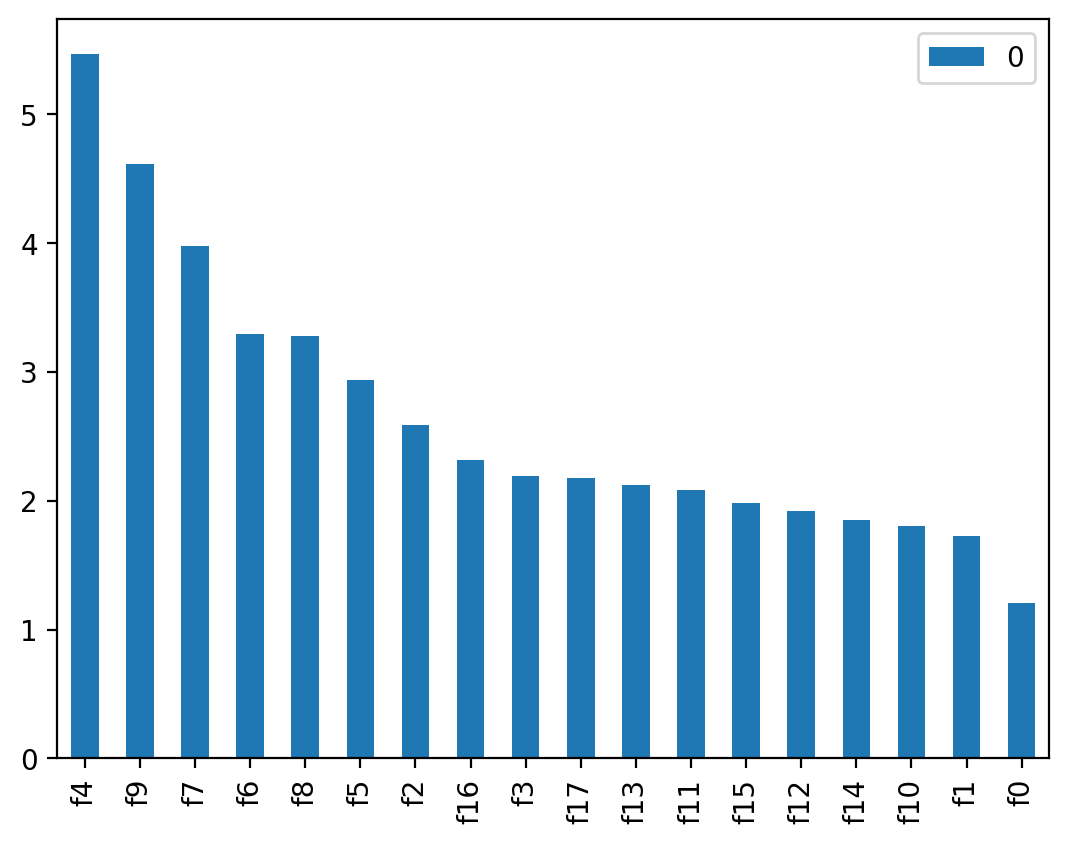

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the  to the lowest of the xgoost feature importance rank:
1. T2MDEW
2. TS
3. T2M_MIN
4. T2M_MAX
5. T2M_RANGE
6. T2M_WET
7. QV2M
8. WS50M_MIN
9. T2M
10. WS50M_RANGE
11. WS10M_RANGE
12. WS10M_MAX
13. WS50M_MAX
14. WS10M_MIN
15. WS50M
16. WS10M
17. PS
18. PRECTOT

###test

In [ ]:
js_test = test[test['fips']==29097]

#using interpolation to fill in the NaN values
js_test = js_test.interpolate().fillna(method='bfill')
js_test.score[js_test.score <0.5] = 0
js_test.score[(js_test.score >=0.5)&(js_test.score<1.5)] = 1
js_test.score[(js_test.score >=1.5)&(js_test.score<2.5)] = 2
js_test.score[(js_test.score >=2.5)&(js_test.score<3.5)] = 3
js_test.score[(js_test.score >=3.5)&(js_test.score<4.5)] = 4
js_test.score[(js_test.score >=4.5)&(js_test.score<5.5)] = 5

js_test.head()

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
1094307  29097  2019-01-01     0.04  98.86  2.48 -3.15   -5.91   -5.69   
1094308  29097  2019-01-02     0.09  98.58  2.50 -2.92   -5.85   -5.61   
1094309  29097  2019-01-03     4.92  97.98  3.03 -0.52   -3.38   -3.34   
1094310  29097  2019-01-04     6.42  97.46  3.63  1.83   -1.03   -1.00   
1094311  29097  2019-01-05     0.02  97.96  4.71  3.69    2.62    2.43   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
1094307     0.07    -5.01       5.07 -2.38   3.85       6.06       1.68   
1094308    -1.63    -4.03       2.41 -2.69   2.67       4.04       1.39   
1094309     2.86    -3.83       6.70 -0.69   1.77       3.52       0.44   
1094310     8.13    -1.04       9.17  1.34   3.54       4.83       2.69   
1094311    12.28    -1.63      13.91  2.67   3.57       4.47       2.88   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1094307         4.37   4.88       8.04       1.94         6.10    1.0  
1094308         2.65   3.54       4.79       1.62         3.18    1.0  
1094309         3.08   3.04       7.14       0.64         6.50    1.0  
1094310         2.14   6.12       9.67       3.06         6.61    1.0  
1094311         1.59   6.04       8.36       4.06         4.31    1.0

In [ ]:
js_test = js_test.round(4)
js_test

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
1094307  29097  2019-01-01     0.04  98.86  2.48 -3.15   -5.91   -5.69   
1094308  29097  2019-01-02     0.09  98.58  2.50 -2.92   -5.85   -5.61   
1094309  29097  2019-01-03     4.92  97.98  3.03 -0.52   -3.38   -3.34   
1094310  29097  2019-01-04     6.42  97.46  3.63  1.83   -1.03   -1.00   
1094311  29097  2019-01-05     0.02  97.96  4.71  3.69    2.62    2.43   
...        ...         ...      ...    ...   ...   ...     ...     ...   
1095033  29097  2020-12-27     0.01  97.37  5.13  6.23    3.76    5.00   
1095034  29097  2020-12-28     0.02  98.96  3.25 -0.32   -2.35   -1.33   
1095035  29097  2020-12-29     3.84  98.20  4.57  3.75    2.23    2.99   
1095036  29097  2020-12-30    20.58  98.16  3.63  1.21   -0.94    0.13   
1095037  29097  2020-12-31     8.58  98.15  2.86 -1.69   -4.13   -2.91   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
1094307     0.07    -5.01       5.07 -2.38   3.85       6.06       1.68   
1094308    -1.63    -4.03       2.41 -2.69   2.67       4.04       1.39   
1094309     2.86    -3.83       6.70 -0.69   1.77       3.52       0.44   
1094310     8.13    -1.04       9.17  1.34   3.54       4.83       2.69   
1094311    12.28    -1.63      13.91  2.67   3.57       4.47       2.88   
...          ...      ...        ...   ...    ...        ...        ...   
1095033    13.10    -0.35      13.45  5.28   6.48       9.88       3.46   
1095034     3.04    -3.14       6.18 -0.53   3.55       4.84       2.43   
1095035     8.72    -1.29      10.01  3.58   7.71       9.72       4.81   
1095036     7.03    -3.94      10.98  1.07   4.68       6.79       2.65   
1095037     1.95    -5.17       7.12 -1.80   5.68       9.59       2.77   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1094307         4.37   4.88       8.04       1.94         6.10    1.0  
1094308         2.65   3.54       4.79       1.62         3.18    1.0  
1094309         3.08   3.04       7.14       0.64         6.50    1.0  
1094310         2.14   6.12       9.67       3.06         6.61    1.0  
1094311         1.59   6.04       8.36       4.06         4.31    1.0  
...              ...    ...        ...        ...          ...    ...  
1095033         6.41  10.43      12.94       7.36         5.58    0.0  
1095034         2.42   5.77       8.24       4.22         4.02    0.0  
1095035         4.91  10.43      13.48       7.40         6.08    0.0  
1095036         4.14   6.72       8.61       5.39         3.21    0.0  
1095037         6.82   7.73      11.99       5.34         6.66    0.0  

[731 rows x 21 columns]

In [ ]:
js_test['score'].value_counts()

0.0    568
1.0    110
2.0     34
3.0     19
Name: score, dtype: int64

In [ ]:
X_test = js_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = js_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN 2D With SuperTML Method

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


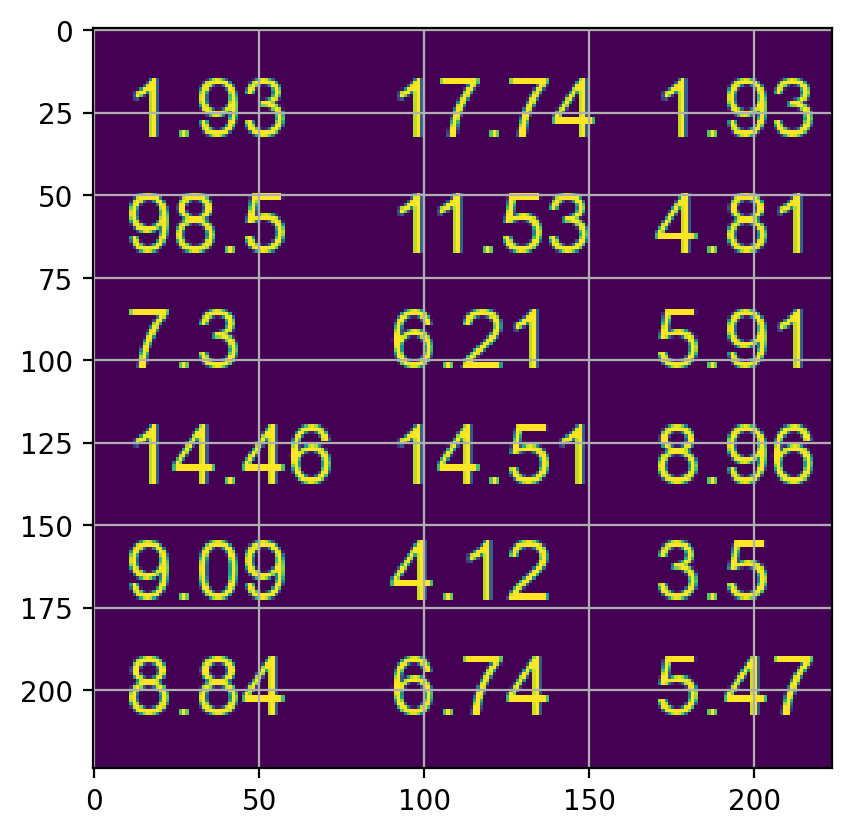

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 21s 212ms/step - loss: 121.0930 - root_mean_squared_error: 11.0042 - val_loss: 1.1108 - val_root_mean_squared_error: 1.0539
Epoch 2/50
37/37 [==============================] - 5s 133ms/step - loss: 1.5406 - root_mean_squared_error: 1.2412 - val_loss: 0.9366 - val_root_mean_squared_error: 0.9678
Epoch 3/50
37/37 [==============================] - 5s 135ms/step - loss: 1.1007 - root_mean_squared_error: 1.0491 - val_loss: 0.9564 - val_root_mean_squared_error: 0.9780
Epoch 4/50
37/37 [==============================] - 5s 134ms/step - loss: 1.0414 - root_mean_squared_error: 1.0205 - val_loss: 0.9302 - val_root_mean_squared_error: 0.9645
Epoch 5/50
37/37 [==============================] - 5s 134ms/step - loss: 0.9772 - root_mean_squared_error: 0.9885 - val_loss: 0.9281 - val_root_mean_squared_error: 0.9634
Epoch 6/50
37/37 [==============================] - 5s 146ms/step - loss: 1.0148 - root_mean_squared_error: 1.0074 - val_loss: 0.9342 - 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 126ms/step


predictions  actuals
0       0.488199      1.0
1       0.246577      1.0
2       0.864719      1.0
3       0.513256      1.0
4       0.232535      1.0
..           ...      ...
726     0.454443      0.0
727     0.442848      0.0
728     0.633927      0.0
729     0.158966      0.0
730     0.435689      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      1.0
1            0.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      1.0
1            0.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71       568
         1.0       0.21      0.47      0.29       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.58       731
   macro avg       0.25      0.28      0.25       731
weighted avg       0.64      0.58      0.60       731



<Axes: >

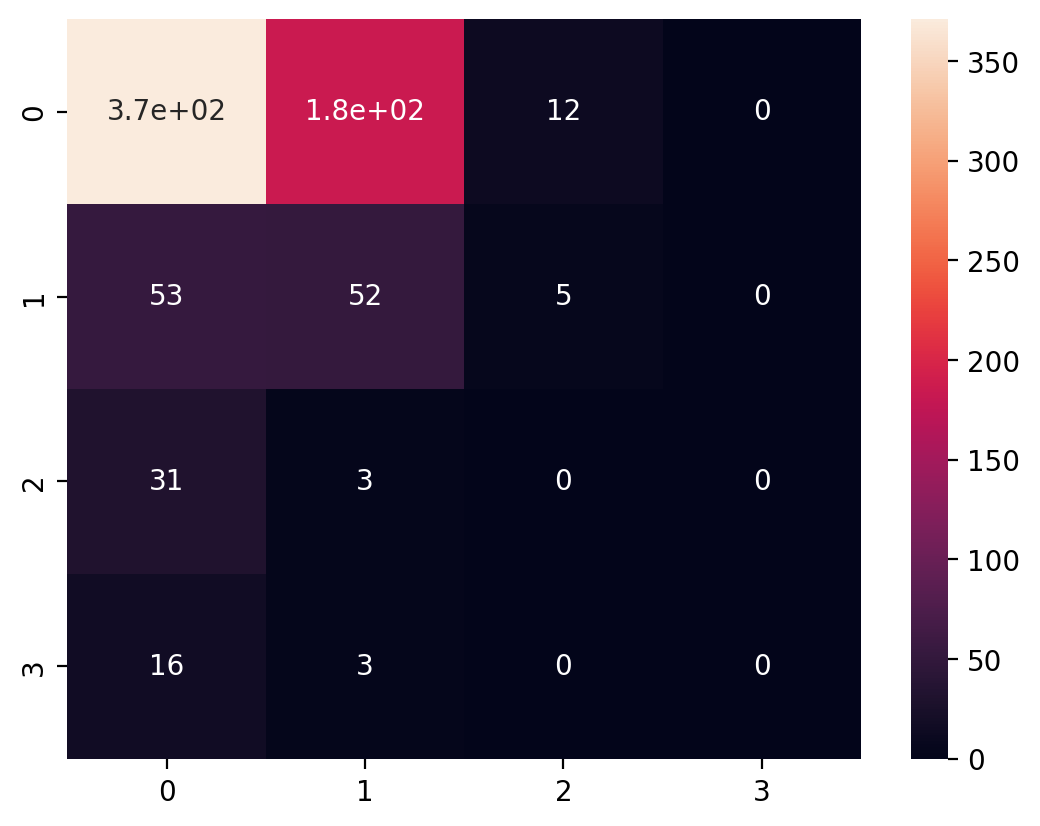

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 32s 420ms/step - loss: 15.7746 - root_mean_squared_error: 3.9717 - val_loss: 1.1442 - val_root_mean_squared_error: 1.0697
Epoch 2/50
37/37 [==============================] - 8s 223ms/step - loss: 1.1922 - root_mean_squared_error: 1.0919 - val_loss: 1.0242 - val_root_mean_squared_error: 1.0121
Epoch 3/50
37/37 [==============================] - 8s 222ms/step - loss: 1.0733 - root_mean_squared_error: 1.0360 - val_loss: 0.9455 - val_root_mean_squared_error: 0.9723
Epoch 4/50
37/37 [==============================] - 8s 220ms/step - loss: 1.0527 - root_mean_squared_error: 1.0260 - val_loss: 0.9570 - val_root_mean_squared_error: 0.9783
Epoch 5/50
37/37 [==============================] - 8s 220ms/step - loss: 1.0336 - root_mean_squared_error: 1.0167 - val_loss: 1.0523 - val_root_mean_squared_error: 1.0258
Epoch 6/50
37/37 [==============================] - 8s 219ms/step - loss: 1.0034 - root_mean_squared_error: 1.0017 - val_loss: 0.9463 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 214ms/step


predictions  actuals
0       1.033583      1.0
1       1.209801      1.0
2       1.141752      1.0
3       1.595329      1.0
4       0.513373      1.0
..           ...      ...
726     0.842689      0.0
727     1.224462      0.0
728     1.267660      0.0
729     1.097279      0.0
730     1.220469      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            2.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            2.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.69      0.19      0.30       568
         1.0       0.11      0.55      0.19       110
         2.0       0.03      0.03      0.03        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.23       731
   macro avg       0.21      0.19      0.13       731
weighted avg       0.55      0.23      0.26       731



In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

<Axes: >

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 10s 188ms/step - loss: 4.9380 - root_mean_squared_error: 2.2222 - val_loss: 0.9421 - val_root_mean_squared_error: 0.9706
Epoch 2/50
37/37 [==============================] - 4s 122ms/step - loss: 1.0304 - root_mean_squared_error: 1.0151 - val_loss: 0.9835 - val_root_mean_squared_error: 0.9917
Epoch 3/50
37/37 [==============================] - 4s 122ms/step - loss: 1.0636 - root_mean_squared_error: 1.0313 - val_loss: 0.9494 - val_root_mean_squared_error: 0.9744
Epoch 4/50
37/37 [==============================] - 4s 122ms/step - loss: 1.0146 - root_mean_squared_error: 1.0073 - val_loss: 0.9731 - val_root_mean_squared_error: 0.9865
Epoch 5/50
37/37 [==============================] - 5s 122ms/step - loss: 1.0441 - root_mean_squared_error: 1.0218 - val_loss: 0.9664 - val_root_mean_squared_error: 0.9830
Epoch 6/50
37/37 [==============================] - 4s 122ms/step - loss: 0.9783 - root_mean_squared_error: 0.9891 - val_loss: 0.9512 - val

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 271ms/step


predictions  actuals
0       0.858247      1.0
1       0.858247      1.0
2       0.858247      1.0
3       0.858247      1.0
4       0.858247      1.0
..           ...      ...
726     0.858247      0.0
727     0.858247      0.0
728     0.858247      0.0
729     0.858247      0.0
730     0.858247      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       568
         1.0       0.15      1.00      0.26       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.15       731
   macro avg       0.04      0.25      0.07       731
weighted avg       0.02      0.15      0.04       731



<Axes: >

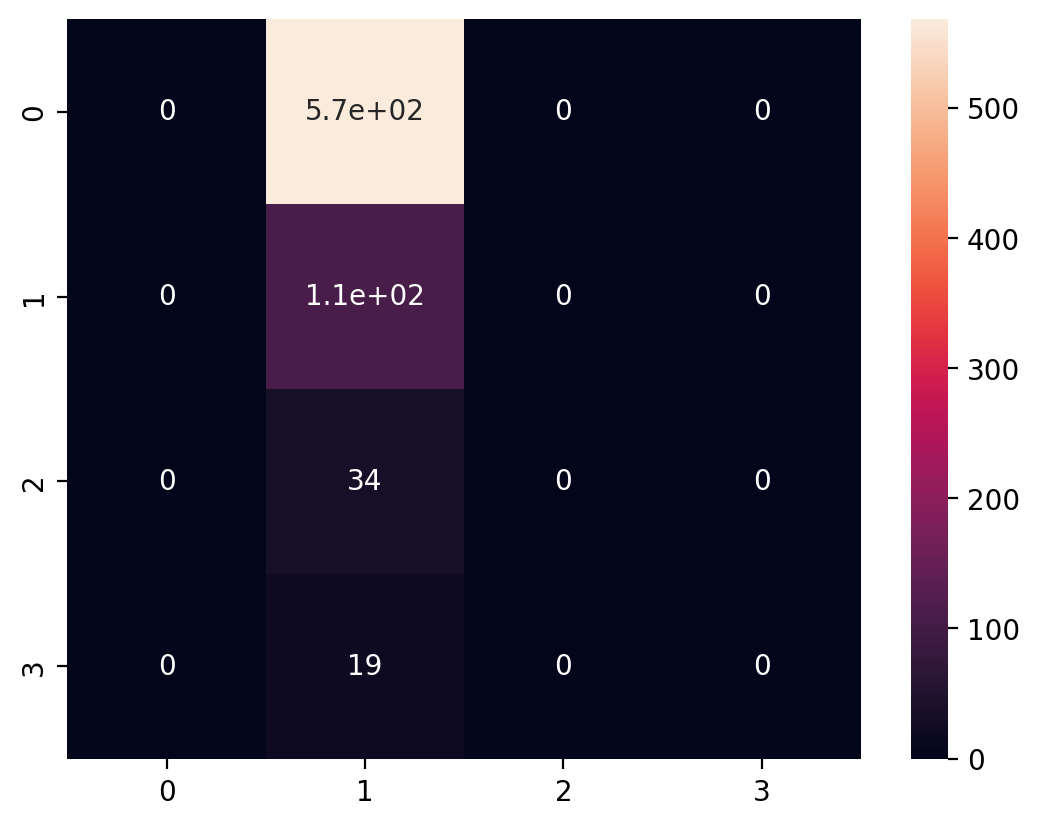

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:304,1:304,2:304,3:304,4:304},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1520, 18)
After OverSampling, the shape of train_y: (1520,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[ 1.93  , 98.5   ,  7.3   , ...,  8.96  ,  3.5   ,  5.47  ],
       [ 6.12  , 98.23  , 17.1   , ...,  5.69  ,  1.63  ,  4.07  ],
       [ 0.    , 98.29  ,  2.45  , ...,  9.73  ,  0.98  ,  8.75  ],
       ...,
       [ 3.4034, 97.9653, 14.1603, ...,  8.0964,  3.4262,  4.6701],
       [ 2.278 , 97.8615, 14.5845, ...,  5.0111,  2.1783,  2.8329],
       [ 9.1768, 97.7709, 16.5746, ...,  4.2191,  2.5201,  1.6892]])

(1520, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


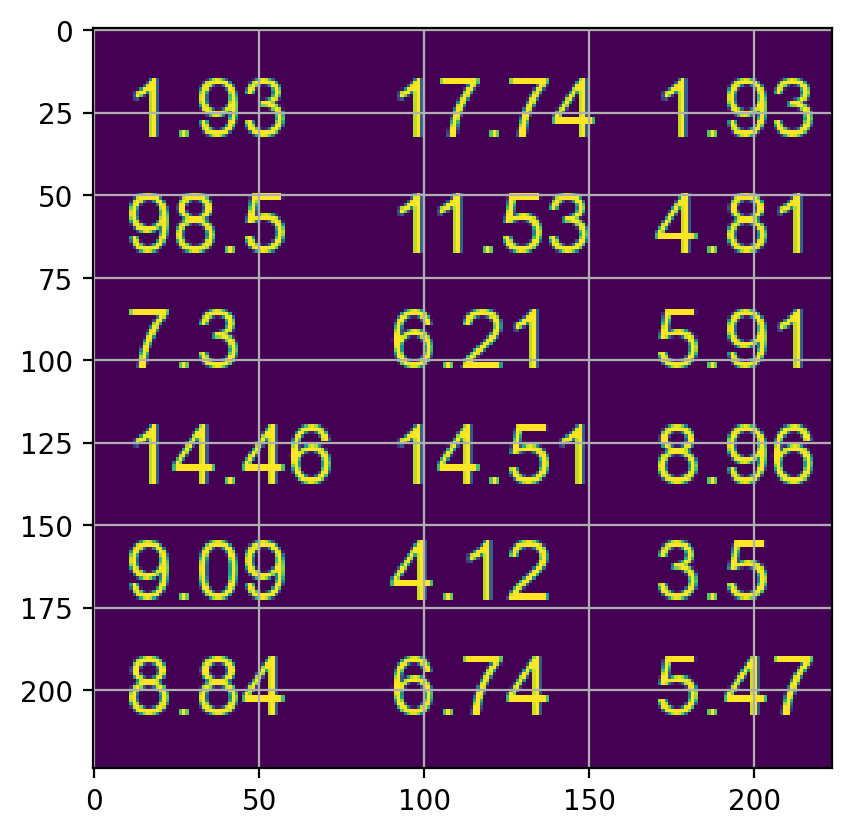

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1520, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1520,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
95/95 [==============================] - 20s 54ms/step - loss: 60.7185 - root_mean_squared_error: 7.7922 - val_loss: 0.9326 - val_root_mean_squared_error: 0.9657
Epoch 2/50
95/95 [==============================] - 3s 27ms/step - loss: 1.6264 - root_mean_squared_error: 1.2753 - val_loss: 1.0555 - val_root_mean_squared_error: 1.0274
Epoch 3/50
95/95 [==============================] - 3s 27ms/step - loss: 1.6414 - root_mean_squared_error: 1.2812 - val_loss: 0.9610 - val_root_mean_squared_error: 0.9803
Epoch 4/50
95/95 [==============================] - 3s 27ms/step - loss: 1.6191 - root_mean_squared_error: 1.2724 - val_loss: 0.9293 - val_root_mean_squared_error: 0.9640
Epoch 5/50
95/95 [==============================] - 3s 27ms/step - loss: 1.6114 - root_mean_squared_error: 1.2694 - val_loss: 0.9136 - val_root_mean_squared_error: 0.9558
Epoch 6/50
95/95 [==============================] - 3s 27ms/step - loss: 1.4115 - root_mean_squared_error: 1.1881 - val_loss: 0.8996 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 32ms/step


predictions  actuals
0       1.134955      1.0
1       0.924562      1.0
2       1.325243      1.0
3       1.155301      1.0
4       0.834919      1.0
..           ...      ...
726     0.965333      0.0
727     1.450746      0.0
728     1.091074      0.0
729     1.010674      0.0
730     1.302666      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.89      0.01      0.03       568
         1.0       0.14      0.83      0.24       110
         2.0       0.02      0.03      0.02        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.14       731
   macro avg       0.26      0.22      0.07       731
weighted avg       0.71      0.14      0.06       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.89      0.01      0.03       568
         1.0       0.14      0.83      0.24       110
         2.0       0.02      0.03      0.02        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.14       731
   macro avg       0.26      0.22      0.07       731
weighted avg       0.71      0.14      0.06       731



<Axes: >

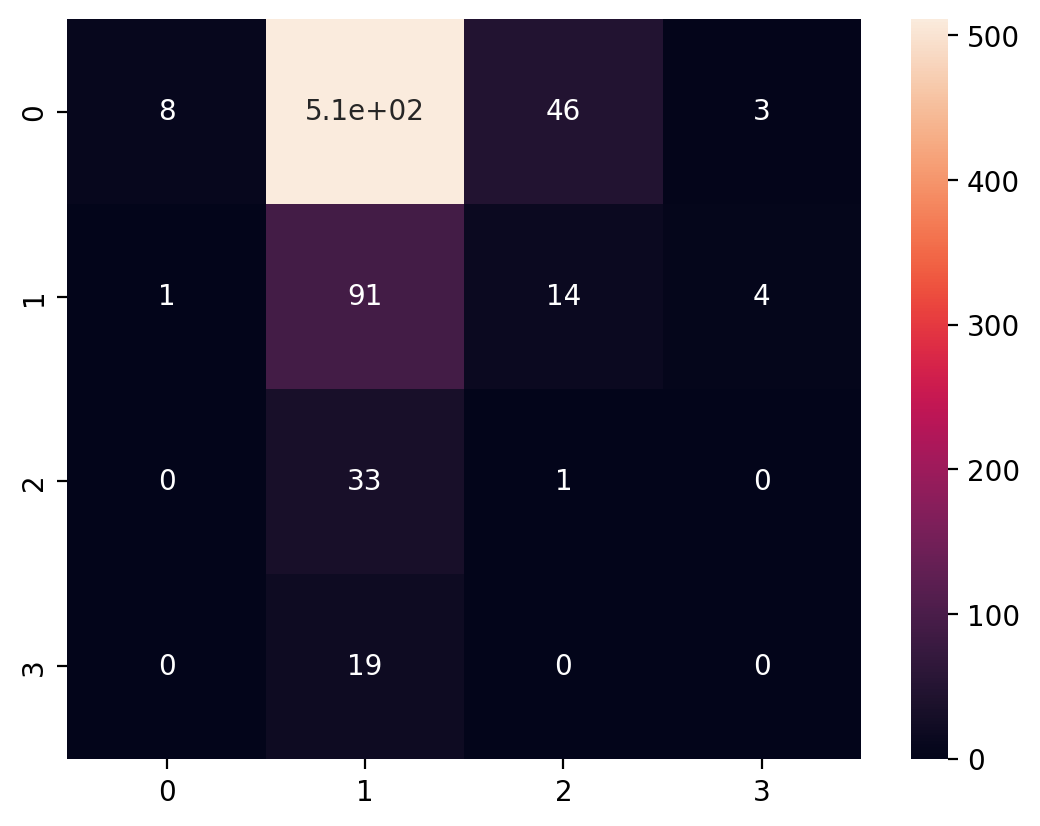

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
95/95 [==============================] - 29s 124ms/step - loss: 9.7090 - root_mean_squared_error: 3.1159 - val_loss: 1.0947 - val_root_mean_squared_error: 1.0463
Epoch 2/50
95/95 [==============================] - 5s 52ms/step - loss: 1.8820 - root_mean_squared_error: 1.3719 - val_loss: 0.9318 - val_root_mean_squared_error: 0.9653
Epoch 3/50
95/95 [==============================] - 5s 53ms/step - loss: 1.6007 - root_mean_squared_error: 1.2652 - val_loss: 0.9208 - val_root_mean_squared_error: 0.9596
Epoch 4/50
95/95 [==============================] - 5s 51ms/step - loss: 1.5583 - root_mean_squared_error: 1.2483 - val_loss: 0.9544 - val_root_mean_squared_error: 0.9769
Epoch 5/50
95/95 [==============================] - 5s 53ms/step - loss: 1.5844 - root_mean_squared_error: 1.2587 - val_loss: 0.9507 - val_root_mean_squared_error: 0.9750
Epoch 6/50
95/95 [==============================] - 5s 52ms/step - loss: 1.2941 - root_mean_squared_error: 1.1376 - val_loss: 0.9893 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 7s 55ms/step


predictions  actuals
0       1.223097      1.0
1       0.969396      1.0
2       1.041935      1.0
3       1.421087      1.0
4       0.854566      1.0
..           ...      ...
726     0.812834      0.0
727     0.898398      0.0
728     1.194848      0.0
729     1.024809      0.0
730     1.309589      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.69      0.11      0.19       568
         1.0       0.11      0.55      0.18       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.17       731
   macro avg       0.20      0.16      0.09       731
weighted avg       0.55      0.17      0.17       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.69      0.11      0.19       568
         1.0       0.11      0.55      0.18       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.17       731
   macro avg       0.20      0.16      0.09       731
weighted avg       0.55      0.17      0.17       731



<Axes: >

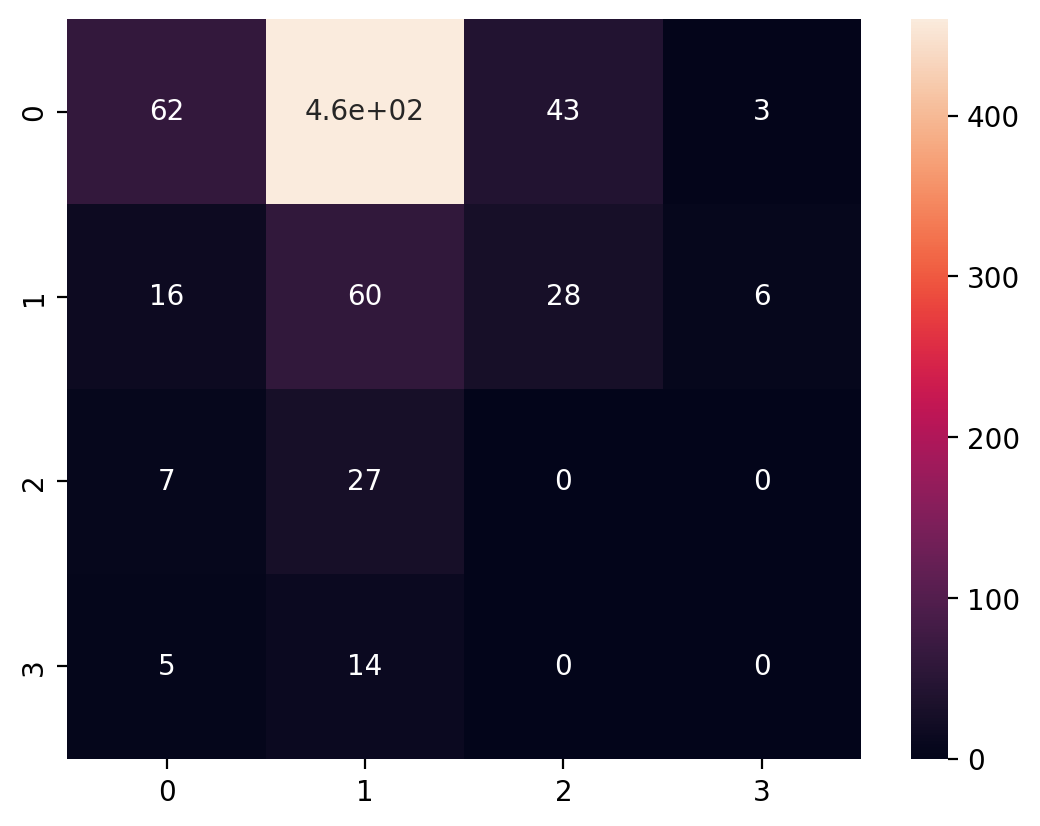

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
95/95 [==============================] - 7s 23ms/step - loss: 3.4893 - root_mean_squared_error: 1.8680 - val_loss: 0.9440 - val_root_mean_squared_error: 0.9716
Epoch 2/50
95/95 [==============================] - 1s 15ms/step - loss: 1.6144 - root_mean_squared_error: 1.2706 - val_loss: 0.9827 - val_root_mean_squared_error: 0.9913
Epoch 3/50
95/95 [==============================] - 1s 15ms/step - loss: 1.3979 - root_mean_squared_error: 1.1823 - val_loss: 1.1501 - val_root_mean_squared_error: 1.0724
Epoch 4/50
95/95 [==============================] - 1s 15ms/step - loss: 1.2520 - root_mean_squared_error: 1.1189 - val_loss: 0.9985 - val_root_mean_squared_error: 0.9993
Epoch 5/50
95/95 [==============================] - 1s 15ms/step - loss: 1.1639 - root_mean_squared_error: 1.0788 - val_loss: 0.9575 - val_root_mean_squared_error: 0.9785
Epoch 6/50
95/95 [==============================] - 1s 15ms/step - loss: 1.1667 - root_mean_squared_error: 1.0801 - val_loss: 0.9158 - val_root_m

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 54ms/step


predictions  actuals
0       1.740538      1.0
1       1.072298      1.0
2       0.938787      1.0
3       0.844385      1.0
4       1.516474      1.0
..           ...      ...
726     0.619464      0.0
727     1.728490      0.0
728     1.484672      0.0
729    -0.360052      0.0
730     0.287343      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            2.0      1.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          1.0      0.0
729          0.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            2.0      1.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          1.0      0.0
729          0.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.74      0.34      0.47       568
         1.0       0.11      0.35      0.17       110
         2.0       0.03      0.09      0.04        34
         3.0       0.00      0.00      0.00        19
         4.0       0.00      0.00      0.00         0

    accuracy                           0.32       731
   macro avg       0.18      0.16      0.14       731
weighted avg       0.60      0.32      0.39       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.74      0.34      0.47       568
         1.0       0.11      0.35      0.17       110
         2.0       0.03      0.09      0.04        34
         3.0       0.00      0.00      0.00        19

   micro avg       0.32      0.32      0.32       731
   macro avg       0.22      0.19      0.17       731
weighted avg       0.60      0.32      0.39       731



<Axes: >

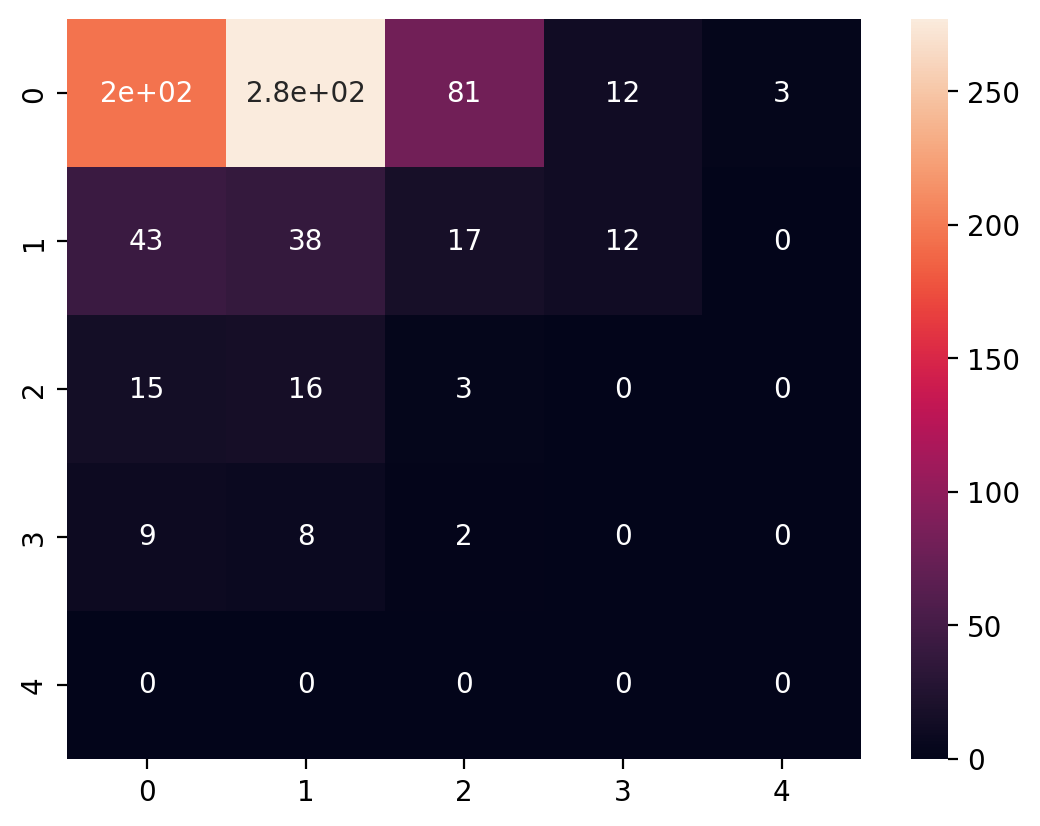

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font2)
        draw.text((10, 80), str(dat[7]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[8]), fill='white', font=font3)
        draw.text((10, 185), str(dat[5]), fill='white', font=font3)
        draw.text((90, 10), str(dat[2]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[3]), fill='white', font=font4)
        draw.text((90, 115), str(dat[17]), fill='white', font=font4)
        draw.text((90, 150), str(dat[13]), fill='white', font=font5)
        draw.text((90, 185), str(dat[11]), fill='white', font=font5)
        draw.text((170, 10), str(dat[15]), fill='white', font=font5)
        draw.text((170, 45), str(dat[12]), fill='white', font=font5)
        draw.text((170, 80), str(dat[14]), fill='white', font=font5)
        draw.text((170, 115), str(dat[10]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


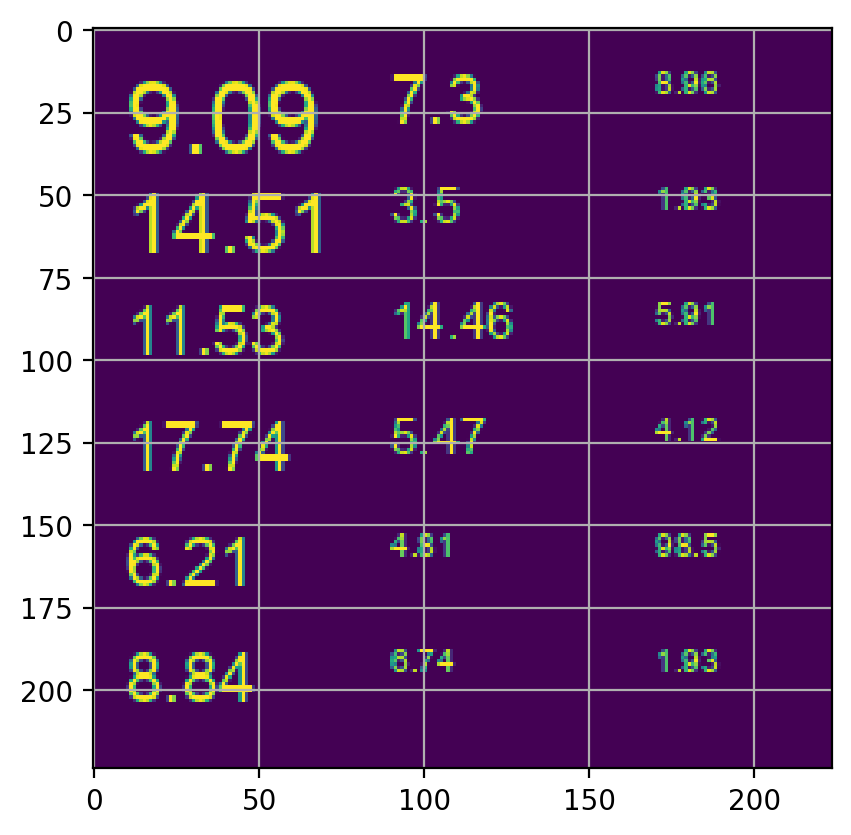

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 20s 205ms/step - loss: 155.5884 - root_mean_squared_error: 12.4735 - val_loss: 1.0367 - val_root_mean_squared_error: 1.0182
Epoch 2/50
37/37 [==============================] - 5s 132ms/step - loss: 1.2431 - root_mean_squared_error: 1.1149 - val_loss: 0.9384 - val_root_mean_squared_error: 0.9687
Epoch 3/50
37/37 [==============================] - 5s 132ms/step - loss: 1.1728 - root_mean_squared_error: 1.0830 - val_loss: 0.9767 - val_root_mean_squared_error: 0.9883
Epoch 4/50
37/37 [==============================] - 5s 133ms/step - loss: 1.1250 - root_mean_squared_error: 1.0607 - val_loss: 1.0953 - val_root_mean_squared_error: 1.0466
Epoch 5/50
37/37 [==============================] - 5s 133ms/step - loss: 1.1117 - root_mean_squared_error: 1.0544 - val_loss: 0.9755 - val_root_mean_squared_error: 0.9877
Epoch 6/50
37/37 [==============================] - 5s 133ms/step - loss: 1.0485 - root_mean_squared_error: 1.0240 - val_loss: 0.9352 - 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 121ms/step


predictions  actuals
0       0.279383      1.0
1       0.201525      1.0
2       0.171266      1.0
3       0.298727      1.0
4       0.160333      1.0
..           ...      ...
726     0.191719      0.0
727     0.439684      0.0
728     0.184683      0.0
729     0.195918      0.0
730     0.540275      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      1.0
1            0.0      1.0
2            0.0      1.0
3            0.0      1.0
4            0.0      1.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          0.0      0.0
729          0.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      1.0
1            0.0      1.0
2            0.0      1.0
3            0.0      1.0
4            0.0      1.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          0.0      0.0
729          0.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       568
         1.0       0.32      0.10      0.15       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.76       731
   macro avg       0.28      0.26      0.25       731
weighted avg       0.66      0.76      0.69       731



In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

<Axes: >

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 11s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 30s 400ms/step - loss: 57.7596 - root_mean_squared_error: 7.6000 - val_loss: 1.0262 - val_root_mean_squared_error: 1.0130
Epoch 2/50
37/37 [==============================] - 8s 218ms/step - loss: 1.2222 - root_mean_squared_error: 1.1055 - val_loss: 1.0246 - val_root_mean_squared_error: 1.0122
Epoch 3/50
37/37 [==============================] - 8s 228ms/step - loss: 1.1762 - root_mean_squared_error: 1.0845 - val_loss: 0.9400 - val_root_mean_squared_error: 0.9696
Epoch 4/50
37/37 [==============================] - 8s 215ms/step - loss: 1.1092 - root_mean_squared_error: 1.0532 - val_loss: 0.9425 - val_root_mean_squared_error: 0.9708
Epoch 5/50
37/37 [==============================] - 8s 215ms/step - loss: 1.1405 - root_mean_squared_error: 1.0680 - val_loss: 1.0203 - val_root_mean_squared_error: 1.0101
Epoch 6/50
37/37 [==============================] - 8s 214ms/step - loss: 1.0957 - root_mean_squared_error: 1.0467 - val_loss: 1.0058 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 167ms/step


predictions  actuals
0       1.492740      1.0
1       0.627940      1.0
2       0.761082      1.0
3       1.324522      1.0
4       0.170286      1.0
..           ...      ...
726     1.045802      0.0
727     0.848285      0.0
728     0.438214      0.0
729     0.783078      0.0
730     0.449739      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          0.0      0.0
729          1.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          0.0      0.0
729          1.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.76      0.26      0.38       568
         1.0       0.14      0.60      0.23       110
         2.0       0.01      0.03      0.02        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.29       731
   macro avg       0.23      0.22      0.16       731
weighted avg       0.61      0.29      0.33       731



<Axes: >

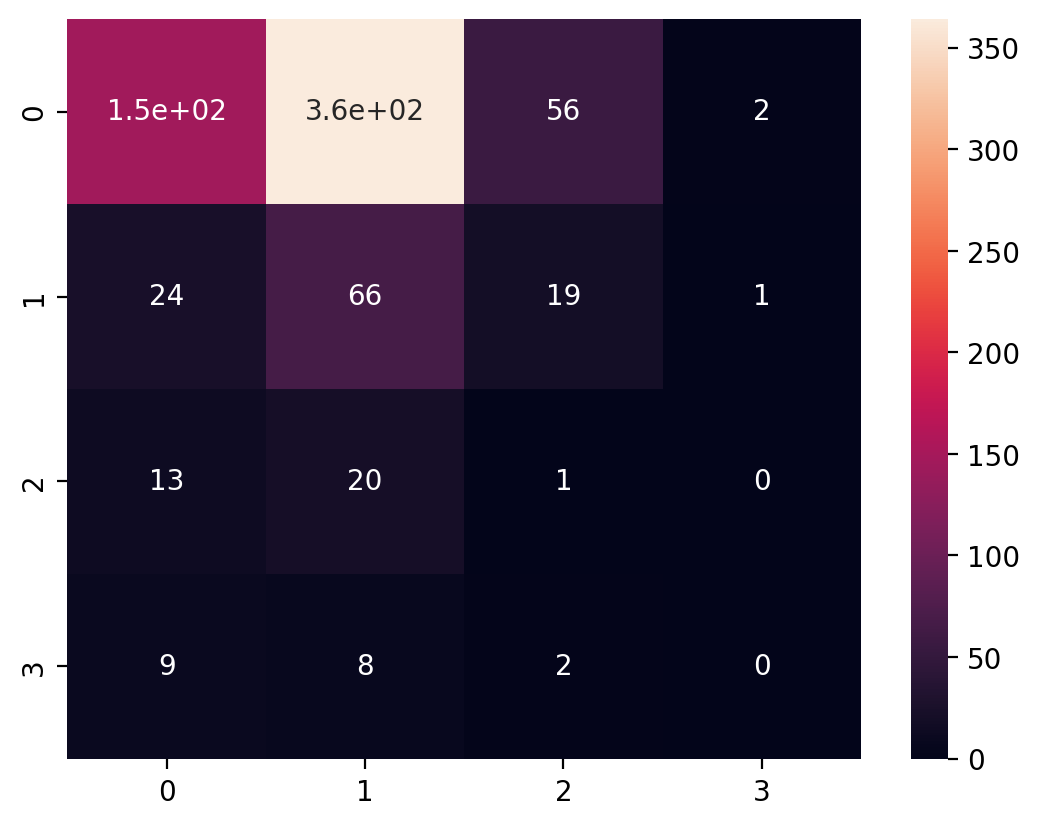

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 7s 186ms/step - loss: 5.5487 - root_mean_squared_error: 2.3556 - val_loss: 1.0430 - val_root_mean_squared_error: 1.0213
Epoch 2/50
37/37 [==============================] - 4s 120ms/step - loss: 1.0612 - root_mean_squared_error: 1.0302 - val_loss: 0.9533 - val_root_mean_squared_error: 0.9763
Epoch 3/50
37/37 [==============================] - 4s 120ms/step - loss: 1.1358 - root_mean_squared_error: 1.0657 - val_loss: 0.9723 - val_root_mean_squared_error: 0.9860
Epoch 4/50
37/37 [==============================] - 4s 119ms/step - loss: 1.0631 - root_mean_squared_error: 1.0311 - val_loss: 0.9761 - val_root_mean_squared_error: 0.9880
Epoch 5/50
37/37 [==============================] - 4s 118ms/step - loss: 1.0197 - root_mean_squared_error: 1.0098 - val_loss: 1.0077 - val_root_mean_squared_error: 1.0038
Epoch 6/50
37/37 [==============================] - 4s 120ms/step - loss: 1.3425 - root_mean_squared_error: 1.1587 - val_loss: 1.0792 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 262ms/step


predictions  actuals
0       1.084741      1.0
1       0.969823      1.0
2       1.059879      1.0
3       1.536728      1.0
4       0.835350      1.0
..           ...      ...
726     0.661795      0.0
727     1.026583      0.0
728     0.972944      0.0
729     0.900509      0.0
730     1.345695      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            2.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            2.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.75      0.02      0.04       568
         1.0       0.15      0.92      0.26       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.15       731
   macro avg       0.22      0.23      0.07       731
weighted avg       0.61      0.15      0.07       731



<Axes: >

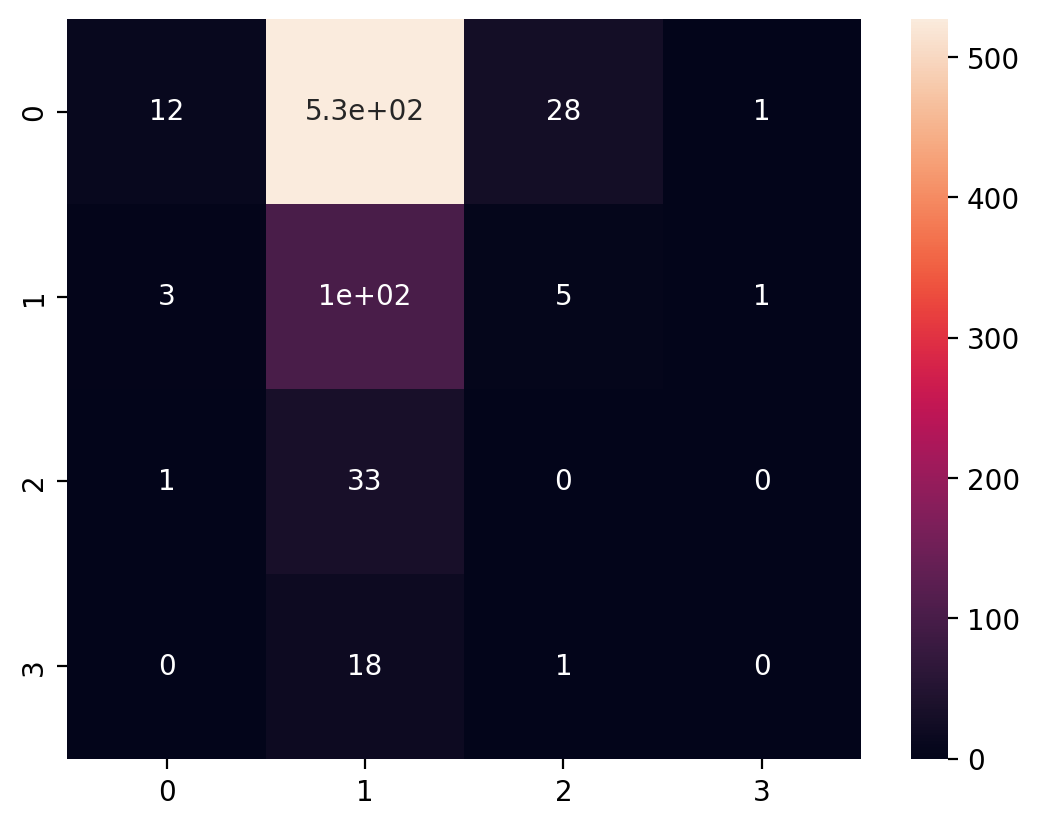

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font2)
        draw.text((10, 80), str(dat[7]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[8]), fill='white', font=font3)
        draw.text((10, 185), str(dat[5]), fill='white', font=font3)
        draw.text((90, 10), str(dat[2]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[3]), fill='white', font=font4)
        draw.text((90, 115), str(dat[17]), fill='white', font=font4)
        draw.text((90, 150), str(dat[13]), fill='white', font=font5)
        draw.text((90, 185), str(dat[11]), fill='white', font=font5)
        draw.text((170, 10), str(dat[15]), fill='white', font=font5)
        draw.text((170, 45), str(dat[12]), fill='white', font=font5)
        draw.text((170, 80), str(dat[14]), fill='white', font=font5)
        draw.text((170, 115), str(dat[10]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:304,1:304,2:304,3:304,4:304},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1520, 18)
After OverSampling, the shape of train_y: (1520,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[ 1.93  , 98.5   ,  7.3   , ...,  8.96  ,  3.5   ,  5.47  ],
       [ 6.12  , 98.23  , 17.1   , ...,  5.69  ,  1.63  ,  4.07  ],
       [ 0.    , 98.29  ,  2.45  , ...,  9.73  ,  0.98  ,  8.75  ],
       ...,
       [ 3.4034, 97.9653, 14.1603, ...,  8.0964,  3.4262,  4.6701],
       [ 2.278 , 97.8615, 14.5845, ...,  5.0111,  2.1783,  2.8329],
       [ 9.1768, 97.7709, 16.5746, ...,  4.2191,  2.5201,  1.6892]])

(1520, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


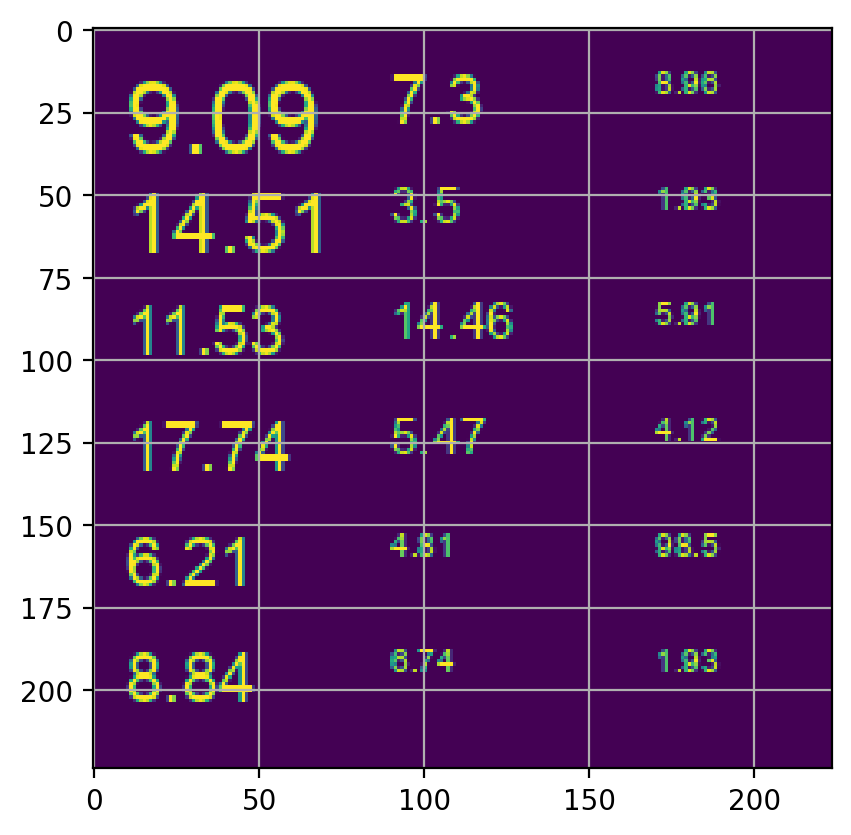

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1520, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1520,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
95/95 [==============================] - 30s 147ms/step - loss: 49.6608 - root_mean_squared_error: 7.0470 - val_loss: 0.9865 - val_root_mean_squared_error: 0.9932
Epoch 2/50
95/95 [==============================] - 12s 125ms/step - loss: 1.5474 - root_mean_squared_error: 1.2439 - val_loss: 0.9257 - val_root_mean_squared_error: 0.9621
Epoch 3/50
95/95 [==============================] - 12s 125ms/step - loss: 1.5579 - root_mean_squared_error: 1.2482 - val_loss: 0.9279 - val_root_mean_squared_error: 0.9633
Epoch 4/50
95/95 [==============================] - 12s 125ms/step - loss: 1.3781 - root_mean_squared_error: 1.1739 - val_loss: 0.9218 - val_root_mean_squared_error: 0.9601
Epoch 5/50
95/95 [==============================] - 12s 126ms/step - loss: 1.3728 - root_mean_squared_error: 1.1716 - val_loss: 0.9247 - val_root_mean_squared_error: 0.9616
Epoch 6/50
95/95 [==============================] - 12s 127ms/step - loss: 1.4832 - root_mean_squared_error: 1.2179 - val_loss: 0.9081

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 132ms/step


predictions  actuals
0       1.159914      1.0
1       0.977491      1.0
2       0.814671      1.0
3       1.039120      1.0
4       0.646109      1.0
..           ...      ...
726     0.721885      0.0
727     1.233359      0.0
728     0.946116      0.0
729     0.859368      0.0
730     1.339152      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            1.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.73      0.19      0.30       568
         1.0       0.11      0.50      0.18       110
         2.0       0.01      0.03      0.02        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.22       731
   macro avg       0.21      0.18      0.13       731
weighted avg       0.58      0.22      0.26       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.73      0.19      0.30       568
         1.0       0.11      0.50      0.18       110
         2.0       0.01      0.03      0.02        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.22       731
   macro avg       0.21      0.18      0.13       731
weighted avg       0.58      0.22      0.26       731



In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

<Axes: >

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
95/95 [==============================] - 42s 259ms/step - loss: 31.4259 - root_mean_squared_error: 5.6059 - val_loss: 0.9563 - val_root_mean_squared_error: 0.9779
Epoch 2/50
95/95 [==============================] - 18s 194ms/step - loss: 1.6701 - root_mean_squared_error: 1.2923 - val_loss: 0.9403 - val_root_mean_squared_error: 0.9697
Epoch 3/50
95/95 [==============================] - 18s 193ms/step - loss: 1.6941 - root_mean_squared_error: 1.3016 - val_loss: 1.0500 - val_root_mean_squared_error: 1.0247
Epoch 4/50
95/95 [==============================] - 19s 196ms/step - loss: 1.4376 - root_mean_squared_error: 1.1990 - val_loss: 0.9865 - val_root_mean_squared_error: 0.9932
Epoch 5/50
95/95 [==============================] - 18s 191ms/step - loss: 1.4159 - root_mean_squared_error: 1.1899 - val_loss: 0.9777 - val_root_mean_squared_error: 0.9888
Epoch 6/50
95/95 [==============================] - 18s 191ms/step - loss: 1.3647 - root_mean_squared_error: 1.1682 - val_loss: 0.9860

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 12s 226ms/step


predictions  actuals
0       1.149045      1.0
1       0.785620      1.0
2       0.838098      1.0
3       1.147834      1.0
4       0.412918      1.0
..           ...      ...
726     0.858765      0.0
727     1.343233      0.0
728     0.804641      0.0
729     0.849575      0.0
730     0.682252      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.72      0.09      0.16       568
         1.0       0.13      0.70      0.22       110
         2.0       0.03      0.06      0.04        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.18       731
   macro avg       0.22      0.21      0.10       731
weighted avg       0.58      0.18      0.16       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.72      0.09      0.16       568
         1.0       0.13      0.70      0.22       110
         2.0       0.03      0.06      0.04        34
         3.0       0.00      0.00      0.00        19

    accuracy                           0.18       731
   macro avg       0.22      0.21      0.10       731
weighted avg       0.58      0.18      0.16       731



In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

<Axes: >

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
95/95 [==============================] - 15s 96ms/step - loss: 6.4181 - root_mean_squared_error: 2.5334 - val_loss: 0.9501 - val_root_mean_squared_error: 0.9747
Epoch 2/50
95/95 [==============================] - 8s 84ms/step - loss: 1.4294 - root_mean_squared_error: 1.1956 - val_loss: 0.9765 - val_root_mean_squared_error: 0.9882
Epoch 3/50
95/95 [==============================] - 8s 84ms/step - loss: 1.3838 - root_mean_squared_error: 1.1764 - val_loss: 0.9756 - val_root_mean_squared_error: 0.9877
Epoch 4/50
95/95 [==============================] - 8s 85ms/step - loss: 1.2443 - root_mean_squared_error: 1.1155 - val_loss: 0.9605 - val_root_mean_squared_error: 0.9801
Epoch 5/50
95/95 [==============================] - 8s 85ms/step - loss: 2.3692 - root_mean_squared_error: 1.5392 - val_loss: 0.9598 - val_root_mean_squared_error: 0.9797
Epoch 6/50
95/95 [==============================] - 8s 86ms/step - loss: 1.6033 - root_mean_squared_error: 1.2662 - val_loss: 0.9927 - val_root_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 278ms/step


predictions  actuals
0       0.927232      1.0
1       0.707539      1.0
2       0.746496      1.0
3       0.853646      1.0
4       0.197475      1.0
..           ...      ...
726     0.247506      0.0
727     1.173754      0.0
728     0.465076      0.0
729     0.989940      0.0
730     1.275824      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          0.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      1.0
1            1.0      1.0
2            1.0      1.0
3            1.0      1.0
4            0.0      1.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          0.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.74      0.53      0.62       568
         1.0       0.09      0.24      0.13       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19
         4.0       0.00      0.00      0.00         0

    accuracy                           0.45       731
   macro avg       0.17      0.15      0.15       731
weighted avg       0.59      0.45      0.50       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.74      0.53      0.62       568
         1.0       0.09      0.24      0.13       110
         2.0       0.00      0.00      0.00        34
         3.0       0.00      0.00      0.00        19

   micro avg       0.45      0.45      0.45       731
   macro avg       0.21      0.19      0.19       731
weighted avg       0.59      0.45      0.50       731



<Axes: >

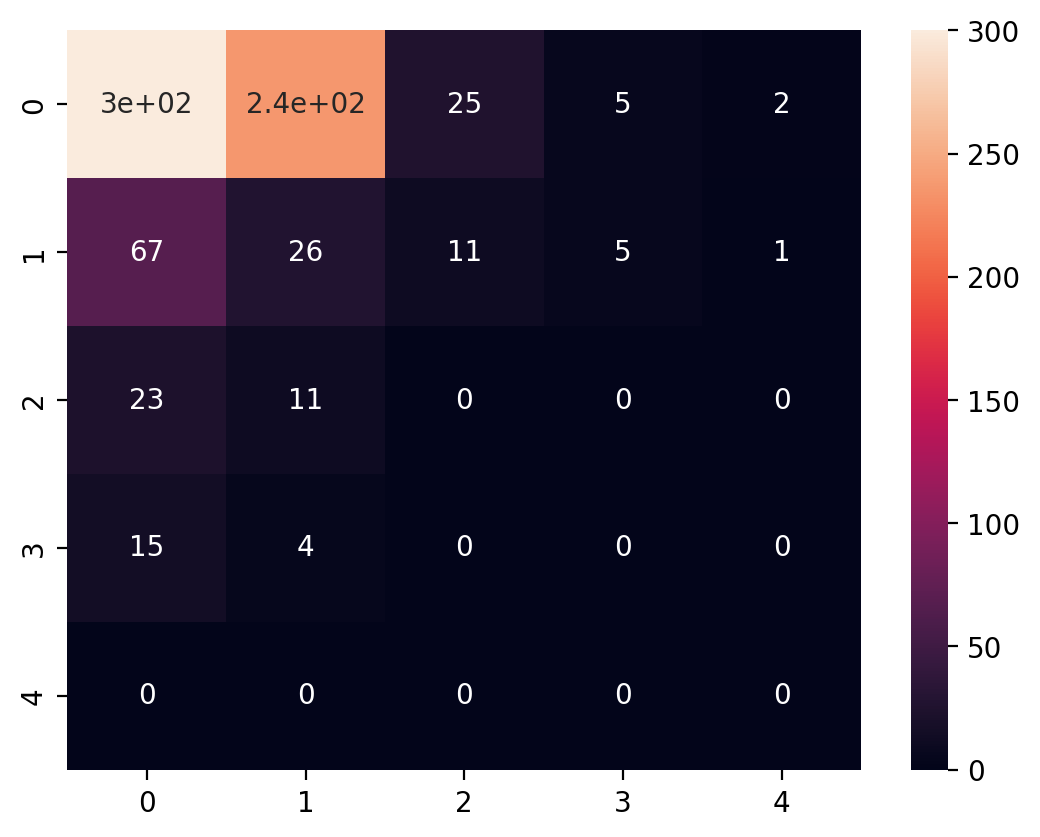

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

##St. Lucie, Florida

###train

In [ ]:
stlucie = train[train['fips']==12111]

#using interpolation to fill in the NaN values
stlucie = stlucie.interpolate().fillna(method='bfill')
stlucie.score[stlucie.score <0.5] = 0
stlucie.score[(stlucie.score >=0.5)&(stlucie.score<1.5)] = 1
stlucie.score[(stlucie.score >=1.5)&(stlucie.score<2.5)] = 2
stlucie.score[(stlucie.score >=2.5)&(stlucie.score<3.5)] = 3
stlucie.score[(stlucie.score >=3.5)&(stlucie.score<4.5)] = 4
stlucie.score[(stlucie.score >=4.5)&(stlucie.score<5.5)] = 5
stlucie

fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  \
2148660  12111  2000-01-01     0.00  102.21  11.96  21.32   17.08   17.08   
2148661  12111  2000-01-02     0.01  102.24  11.92  21.16   17.07   17.07   
2148662  12111  2000-01-03     0.26  102.05  12.97  22.05   18.35   18.35   
2148663  12111  2000-01-04     1.33  101.91  14.46  22.74   20.07   20.07   
2148664  12111  2000-01-05     1.91  102.07  11.93  20.08   16.88   16.88   
...        ...         ...      ...     ...    ...    ...     ...     ...   
2154865  12111  2016-12-27     0.68  102.24  14.49  23.65   20.19   20.16   
2154866  12111  2016-12-28     0.18  101.98  13.94  23.88   19.50   19.50   
2154867  12111  2016-12-29     0.24  101.71  13.67  23.60   19.10   19.10   
2154868  12111  2016-12-30     0.17  102.12   7.68  17.04    9.14    9.16   
2154869  12111  2016-12-31     0.00  102.18   9.98  19.79   14.07   14.08   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
2148660    24.01    19.17       4.83  21.41   3.44       4.23       2.62   
2148661    23.65    19.52       4.12  21.51   4.00       4.63       3.40   
2148662    24.71    19.94       4.77  22.10   4.33       5.14       3.68   
2148663    25.26    20.93       4.33  22.80   4.80       5.87       3.79   
2148664    21.87    17.70       4.17  21.44   5.80       6.63       4.54   
...          ...      ...        ...    ...    ...        ...        ...   
2154865    25.89    22.10       3.79  24.13   3.94       5.41       3.18   
2154866    26.32    22.35       3.98  24.32   1.91       3.58       0.49   
2154867    26.69    20.91       5.77  24.20   4.40       5.79       3.09   
2154868    21.42    15.30       6.12  20.41   7.65      10.15       5.06   
2154869    23.26    16.06       7.20  21.24   5.01       6.25       4.35   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
2148660         1.61   4.40       5.84       3.29         2.55    0.0  
2148661         1.24   5.12       5.76       4.68         1.08    0.0  
2148662         1.46   5.63       6.00       4.84         1.16    0.0  
2148663         2.07   6.40       7.53       5.23         2.30    0.0  
2148664         2.09   7.30       8.53       6.13         2.40    0.0  
...              ...    ...        ...        ...          ...    ...  
2154865         2.23   5.11       7.86       4.07         3.79    1.0  
2154866         3.09   2.44       5.11       0.55         4.56    1.0  
2154867         2.69   5.85       7.91       4.27         3.63    1.0  
2154868         5.09   9.32      12.15       7.02         5.12    1.0  
2154869         1.90   6.38       7.20       5.62         1.58    1.0  

[6210 rows x 21 columns]

###val

In [ ]:
st_val = validation[validation['fips']==12111]

#using interpolation to fill in the NaN values
st_val = st_val.interpolate().fillna(method='bfill')
st_val.score[st_val.score <0.5] = 0
st_val.score[(st_val.score >=0.5)&(st_val.score<1.5)] = 1
st_val.score[(st_val.score >=1.5)&(st_val.score<2.5)] = 2
st_val.score[(st_val.score >=2.5)&(st_val.score<3.5)] = 3
st_val.score[(st_val.score >=3.5)&(st_val.score<4.5)] = 4
st_val.score[(st_val.score >=4.5)&(st_val.score<5.5)] = 5

st_val

fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  \
252580  12111  2017-01-01     0.03  102.11  13.42  22.89   18.85   18.85   
252581  12111  2017-01-02     0.93  102.03  15.74  24.18   21.45   21.45   
252582  12111  2017-01-03     1.34  101.51  16.18  24.83   21.80   21.80   
252583  12111  2017-01-04     3.04  101.12  14.76  23.66   20.09   20.09   
252584  12111  2017-01-05     0.04  101.26  10.80  20.72   15.33   15.33   
...       ...         ...      ...     ...    ...    ...     ...     ...   
253305  12111  2018-12-27     3.17  102.09  13.93  23.46   19.56   19.45   
253306  12111  2018-12-28     1.42  102.00  16.16  24.24   21.88   21.88   
253307  12111  2018-12-29     0.83  102.07  16.45  24.33   22.18   22.17   
253308  12111  2018-12-30     0.24  102.05  15.38  24.03   21.10   21.08   
253309  12111  2018-12-31     0.07  102.05  14.58  23.76   20.27   20.21   

        T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
252580    26.09    19.98       6.11  23.09   5.18       6.37       4.45   
252581    26.66    22.33       4.33  24.34   5.54       7.14       4.45   
252582    27.56    23.01       4.55  24.89   4.71       6.24       2.79   
252583    26.61    19.85       6.75  24.22   5.05       5.86       4.13   
252584    24.32    17.34       6.98  22.33   3.52       4.87       2.24   
...         ...      ...        ...    ...    ...        ...        ...   
253305    25.20    22.21       2.99  23.44   8.58       9.21       7.84   
253306    26.09    23.09       3.00  23.98   6.66       8.20       5.05   
253307    27.38    22.28       5.09  24.28   3.25       4.89       2.28   
253308    26.75    22.49       4.26  24.18   3.27       4.97       1.89   
253309    26.49    21.66       4.83  23.84   5.52       7.04       3.57   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
252580         1.92   6.80       7.68       5.80         1.88    1.0  
252581         2.68   7.39       8.60       6.37         2.23    1.0  
252582         3.45   6.43       7.75       4.18         3.57    1.0  
252583         1.73   6.68       7.42       5.80         1.62    1.0  
252584         2.63   4.45       6.69       2.58         4.11    1.0  
...             ...    ...        ...        ...          ...    ...  
253305         1.37  11.05      11.72      10.06         1.66    2.0  
253306         3.16   9.03      10.91       7.51         3.40    2.0  
253307         2.61   4.50       7.30       2.73         4.57    2.0  
253308         3.08   4.33       7.22       2.34         4.89    2.0  
253309         3.47   7.32       8.45       4.84         3.61    2.0  

[730 rows x 21 columns]

In [ ]:
st_val['score'].value_counts()

0.0    427
1.0    145
2.0    104
3.0     54
Name: score, dtype: int64

In [ ]:
st_val = st_val.round(4)

In [ ]:
X = st_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = st_val['score']

###xgboost feature importance

In [ ]:
X_train = stlucie[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = stlucie['score']

In [ ]:
X_val = st_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = st_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

0.06910731465717379
0.2331275001100314
0.871823186084302


In [ ]:
model.get_booster().get_score(importance_type='gain')

{'f0': 2.1906726360321045,
 'f1': 2.882266044616699,
 'f2': 3.3500566482543945,
 'f3': 2.810347318649292,
 'f4': 7.310239791870117,
 'f5': 3.5451273918151855,
 'f6': 4.482430934906006,
 'f7': 3.2503950595855713,
 'f8': 5.42236852645874,
 'f9': 6.038617134094238,
 'f10': 2.9548745155334473,
 'f11': 3.199152708053589,
 'f12': 2.7480807304382324,
 'f13': 2.9527459144592285,
 'f14': 3.5439822673797607,
 'f15': 3.520402431488037,
 'f16': 2.571204900741577,
 'f17': 2.947721481323242}

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

{'f0': 2.1906726360321045,
 'f1': 2.882266044616699,
 'f2': 3.3500566482543945,
 'f3': 2.810347318649292,
 'f4': 7.310239791870117,
 'f5': 3.5451273918151855,
 'f6': 4.482430934906006,
 'f7': 3.2503950595855713,
 'f8': 5.42236852645874,
 'f9': 6.038617134094238,
 'f10': 2.9548745155334473,
 'f11': 3.199152708053589,
 'f12': 2.7480807304382324,
 'f13': 2.9527459144592285,
 'f14': 3.5439822673797607,
 'f15': 3.520402431488037,
 'f16': 2.571204900741577,
 'f17': 2.947721481323242}

In [ ]:
importance_df

0
f0   2.190673
f1   2.882266
f2   3.350057
f3   2.810347
f4   7.310240
f5   3.545127
f6   4.482431
f7   3.250395
f8   5.422369
f9   6.038617
f10  2.954875
f11  3.199153
f12  2.748081
f13  2.952746
f14  3.543982
f15  3.520402
f16  2.571205
f17  2.947721

<Axes: >

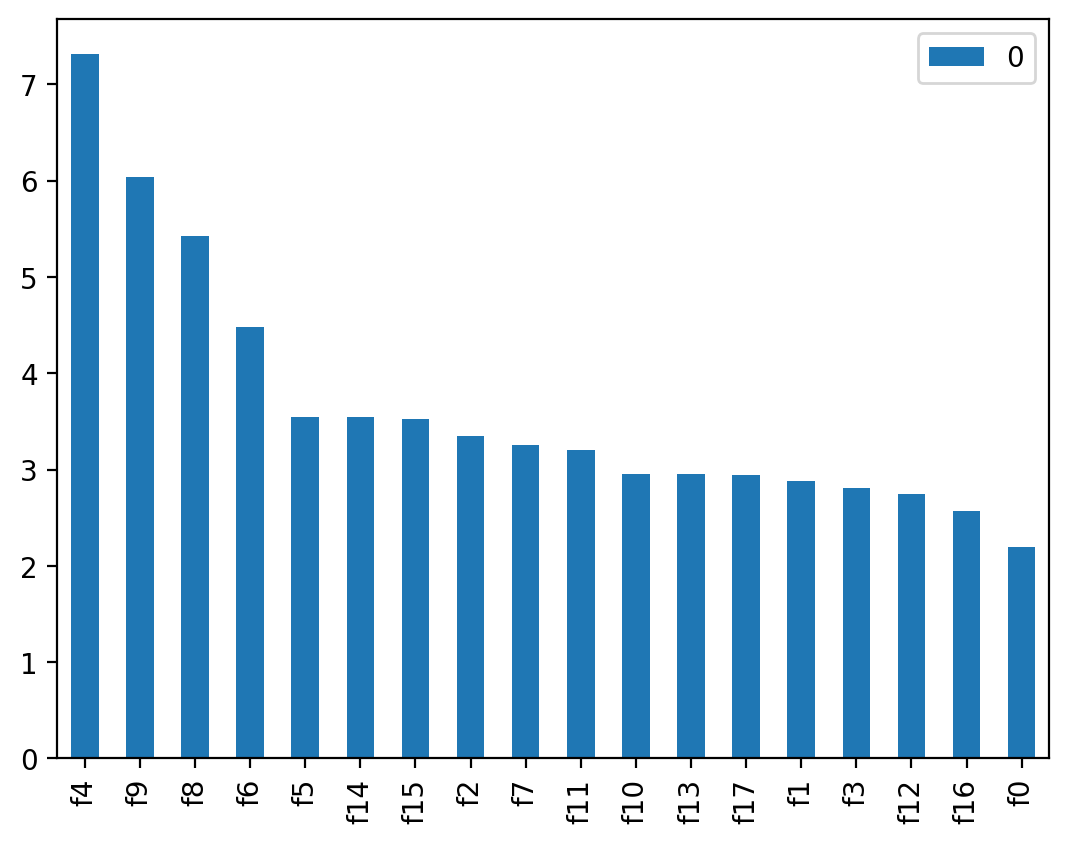

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. T2M_DEW
2. TS
3. T2M_RANGE
4. T2M_MAX
5. T2M_WET
6. WS50M
7. WS50M_MAX
8. QV2M
9. T2M_MIN
10. WS10M_MAX
11. WS10M
12. WS10M_RANGE
13. WS50M_RANGE
14. PS
15. T2M
16. WS10M_MIN
17. WS50M_MIN
18. PRECTOT

###test

In [ ]:
st_test = test[test['fips']==12111]

#using interpolation to fill in the NaN values
st_test = st_test.interpolate().fillna(method='bfill')
st_test.score[st_test.score <0.5] = 0
st_test.score[(st_test.score >=0.5)&(st_test.score<1.5)] = 1
st_test.score[(st_test.score >=1.5)&(st_test.score<2.5)] = 2
st_test.score[(st_test.score >=2.5)&(st_test.score<3.5)] = 3
st_test.score[(st_test.score >=3.5)&(st_test.score<4.5)] = 4
st_test.score[(st_test.score >=4.5)&(st_test.score<5.5)] = 5

st_test.head()

fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  \
252926  12111  2019-01-01     0.25  102.05  14.65  23.97   20.35   20.30   
252927  12111  2019-01-02     0.00  101.99  13.74  23.92   19.35   19.26   
252928  12111  2019-01-03     3.47  101.73  15.95  24.33   21.64   21.62   
252929  12111  2019-01-04     1.24  101.49  15.37  24.58   21.03   20.95   
252930  12111  2019-01-05     2.18  101.57  11.69  21.12   16.72   16.44   

        T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
252926    26.86    21.82       5.04  24.04   3.48       4.34       2.65   
252927    26.79    21.79       5.00  23.99   3.65       5.42       1.88   
252928    27.02    22.15       4.87  24.45   4.48       5.28       3.78   
252929    27.85    22.43       5.42  24.66   5.68       6.73       4.27   
252930    24.37    16.69       7.69  22.64   6.04       7.18       4.92   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
252926         1.69   4.49       6.05       3.29         2.76    2.0  
252927         3.54   4.78       7.81       2.05         5.76    2.0  
252928         1.51   5.99       7.57       4.65         2.91    2.0  
252929         2.46   7.53       9.03       5.79         3.25    2.0  
252930         2.26   7.54       8.29       6.34         1.95    2.0

In [ ]:
st_test = st_test.round(4)
st_test

fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  \
252926  12111  2019-01-01     0.25  102.05  14.65  23.97   20.35   20.30   
252927  12111  2019-01-02     0.00  101.99  13.74  23.92   19.35   19.26   
252928  12111  2019-01-03     3.47  101.73  15.95  24.33   21.64   21.62   
252929  12111  2019-01-04     1.24  101.49  15.37  24.58   21.03   20.95   
252930  12111  2019-01-05     2.18  101.57  11.69  21.12   16.72   16.44   
...       ...         ...      ...     ...    ...    ...     ...     ...   
253652  12111  2020-12-27     0.10  102.05   9.05  17.43   12.84   15.13   
253653  12111  2020-12-28     0.01  102.23  10.31  19.97   14.88   17.43   
253654  12111  2020-12-29     0.03  102.34  10.63  20.41   15.36   17.89   
253655  12111  2020-12-30     0.08  102.12  12.20  21.91   17.47   19.69   
253656  12111  2020-12-31     0.03  101.92  14.36  23.03   19.98   21.51   

        T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
252926    26.86    21.82       5.04  24.04   3.48       4.34       2.65   
252927    26.79    21.79       5.00  23.99   3.65       5.42       1.88   
252928    27.02    22.15       4.87  24.45   4.48       5.28       3.78   
252929    27.85    22.43       5.42  24.66   5.68       6.73       4.27   
252930    24.37    16.69       7.69  22.64   6.04       7.18       4.92   
...         ...      ...        ...    ...    ...        ...        ...   
253652    20.95    13.20       7.74  18.75   4.00       4.51       3.31   
253653    22.80    17.65       5.15  20.06   4.89       5.76       3.60   
253654    22.45    18.38       4.07  20.67   6.33       7.44       4.92   
253655    23.79    20.23       3.56  21.88   7.28       7.98       6.42   
253656    25.14    21.15       3.99  22.70   7.05       8.49       6.02   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
252926         1.69   4.49       6.05       3.29         2.76    2.0  
252927         3.54   4.78       7.81       2.05         5.76    2.0  
252928         1.51   5.99       7.57       4.65         2.91    2.0  
252929         2.46   7.53       9.03       5.79         3.25    2.0  
252930         2.26   7.54       8.29       6.34         1.95    2.0  
...             ...    ...        ...        ...          ...    ...  
253652         1.20   5.21       6.29       4.23         2.05    0.0  
253653         2.17   6.45       8.51       4.50         4.01    0.0  
253654         2.52   8.56      10.54       6.91         3.64    0.0  
253655         1.56   9.93      10.50       8.88         1.62    0.0  
253656         2.46   9.67      10.60       8.69         1.91    0.0  

[731 rows x 21 columns]

In [ ]:
st_test['score'].value_counts()

0.0    574
1.0     90
2.0     57
3.0     10
Name: score, dtype: int64

In [ ]:
X_test = st_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = st_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN 2D With SuperTML Method

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


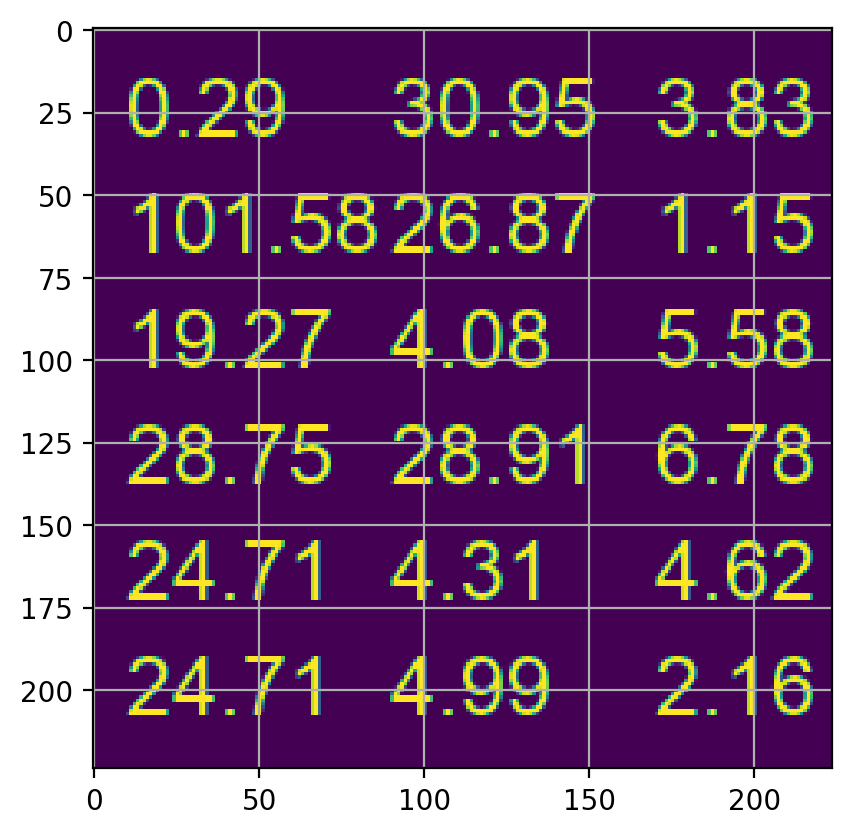

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 9s 90ms/step - loss: 60.0816 - root_mean_squared_error: 7.7512 - val_loss: 1.0501 - val_root_mean_squared_error: 1.0247
Epoch 2/50
37/37 [==============================] - 1s 32ms/step - loss: 1.2247 - root_mean_squared_error: 1.1067 - val_loss: 0.9879 - val_root_mean_squared_error: 0.9940
Epoch 3/50
37/37 [==============================] - 1s 32ms/step - loss: 1.0336 - root_mean_squared_error: 1.0166 - val_loss: 0.8791 - val_root_mean_squared_error: 0.9376
Epoch 4/50
37/37 [==============================] - 1s 32ms/step - loss: 1.0596 - root_mean_squared_error: 1.0294 - val_loss: 0.8657 - val_root_mean_squared_error: 0.9304
Epoch 5/50
37/37 [==============================] - 1s 32ms/step - loss: 0.9593 - root_mean_squared_error: 0.9794 - val_loss: 0.9730 - val_root_mean_squared_error: 0.9864
Epoch 6/50
37/37 [==============================] - 1s 32ms/step - loss: 0.9121 - root_mean_squared_error: 0.9550 - val_loss: 0.9902 - val_root_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 27ms/step


predictions  actuals
0       0.399707      2.0
1       1.843852      2.0
2       0.333320      2.0
3       0.598469      2.0
4       1.240832      2.0
..           ...      ...
726     0.163395      0.0
727     0.368777      0.0
728     0.991250      0.0
729     0.357887      0.0
730     0.988503      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            2.0      2.0
2            0.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            2.0      2.0
2            0.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75       574
         1.0       0.20      0.58      0.29        90
         2.0       0.14      0.12      0.13        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.59       731
   macro avg       0.31      0.34      0.29       731
weighted avg       0.73      0.59      0.63       731



<AxesSubplot:>

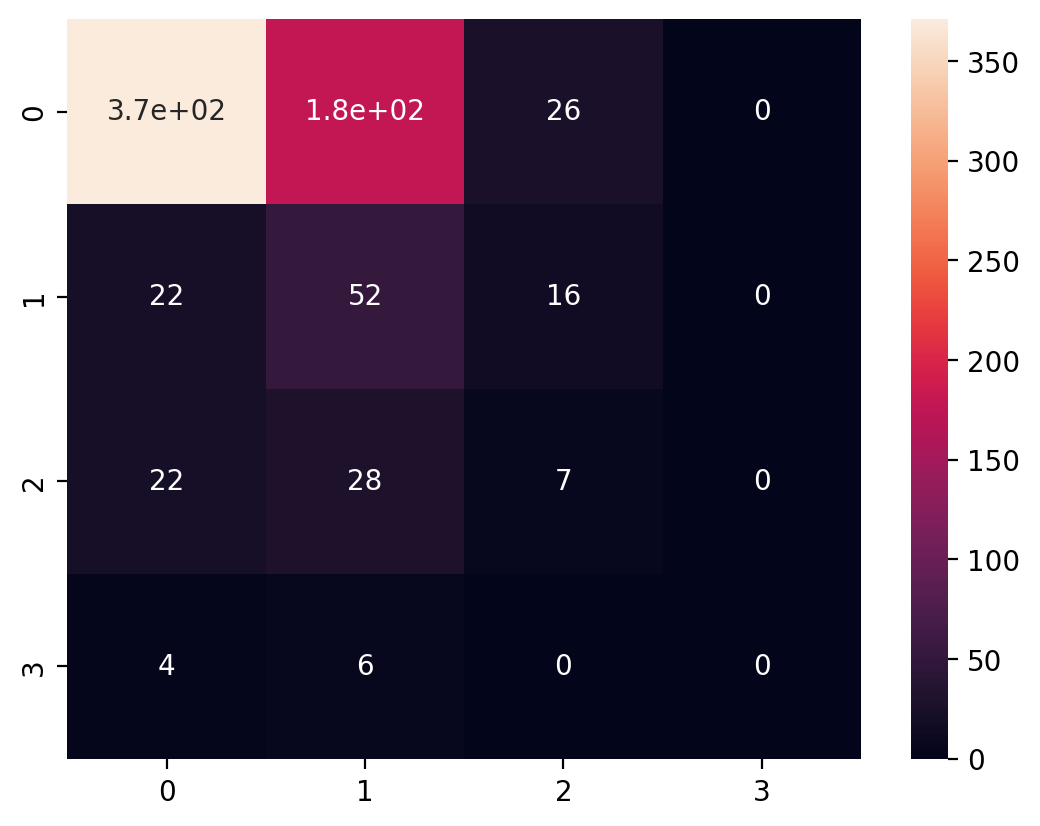

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 24s 231ms/step - loss: 11.4944 - root_mean_squared_error: 3.3903 - val_loss: 1.1215 - val_root_mean_squared_error: 1.0590
Epoch 2/50
37/37 [==============================] - 3s 75ms/step - loss: 1.0321 - root_mean_squared_error: 1.0159 - val_loss: 0.9395 - val_root_mean_squared_error: 0.9693
Epoch 3/50
37/37 [==============================] - 3s 74ms/step - loss: 0.9895 - root_mean_squared_error: 0.9947 - val_loss: 0.9515 - val_root_mean_squared_error: 0.9754
Epoch 4/50
37/37 [==============================] - 3s 74ms/step - loss: 1.0250 - root_mean_squared_error: 1.0124 - val_loss: 0.9768 - val_root_mean_squared_error: 0.9883
Epoch 5/50
37/37 [==============================] - 3s 74ms/step - loss: 0.9553 - root_mean_squared_error: 0.9774 - val_loss: 0.8792 - val_root_mean_squared_error: 0.9377
Epoch 6/50
37/37 [==============================] - 3s 75ms/step - loss: 0.9053 - root_mean_squared_error: 0.9515 - val_loss: 0.9035 - val_roo

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 42ms/step


predictions  actuals
0       0.150107      2.0
1       2.021330      2.0
2       0.959295      2.0
3       1.484926      2.0
4       0.267701      2.0
..           ...      ...
726     0.965626      0.0
727     0.571163      0.0
728     0.265821      0.0
729     0.595844      0.0
730     0.667796      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            0.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          0.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            0.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          0.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.90      0.62      0.74       574
         1.0       0.21      0.59      0.31        90
         2.0       0.18      0.25      0.21        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.58       731
   macro avg       0.32      0.36      0.31       731
weighted avg       0.75      0.58      0.63       731



<AxesSubplot:>

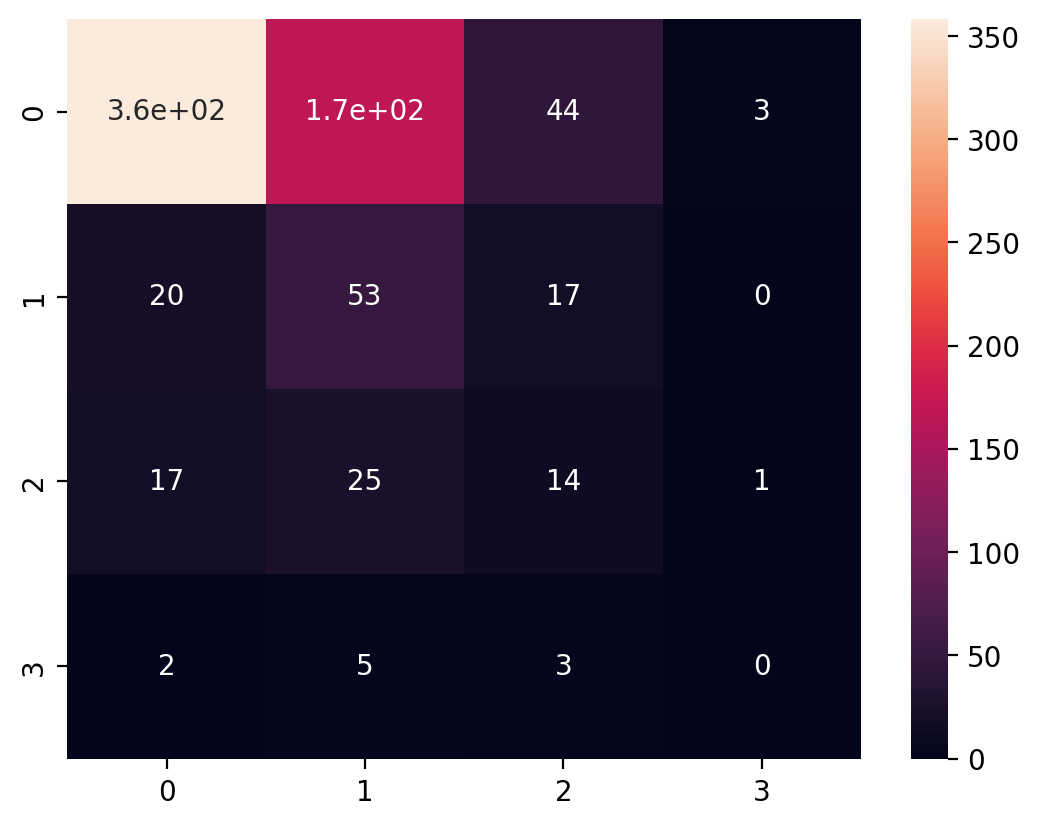

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 3s 33ms/step - loss: 4.0105 - root_mean_squared_error: 2.0026 - val_loss: 0.9481 - val_root_mean_squared_error: 0.9737
Epoch 2/50
37/37 [==============================] - 1s 18ms/step - loss: 1.2806 - root_mean_squared_error: 1.1316 - val_loss: 1.3516 - val_root_mean_squared_error: 1.1626
Epoch 3/50
37/37 [==============================] - 1s 18ms/step - loss: 1.2588 - root_mean_squared_error: 1.1220 - val_loss: 1.1915 - val_root_mean_squared_error: 1.0916
Epoch 4/50
37/37 [==============================] - 1s 18ms/step - loss: 1.0849 - root_mean_squared_error: 1.0416 - val_loss: 1.0284 - val_root_mean_squared_error: 1.0141
Epoch 5/50
37/37 [==============================] - 1s 19ms/step - loss: 0.9954 - root_mean_squared_error: 0.9977 - val_loss: 0.9590 - val_root_mean_squared_error: 0.9793
Epoch 6/50
37/37 [==============================] - 1s 19ms/step - loss: 0.9476 - root_mean_squared_error: 0.9734 - val_loss: 0.9474 - val_root_m

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 1s 18ms/step


predictions  actuals
0       0.706206      2.0
1       0.706206      2.0
2       0.706206      2.0
3       0.706206      2.0
4       0.706206      2.0
..           ...      ...
726     0.706206      0.0
727     0.706206      0.0
728     0.706206      0.0
729     0.706206      0.0
730     0.706206      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       574
         1.0       0.12      1.00      0.22        90
         2.0       0.00      0.00      0.00        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.12       731
   macro avg       0.03      0.25      0.05       731
weighted avg       0.02      0.12      0.03       731



<AxesSubplot:>

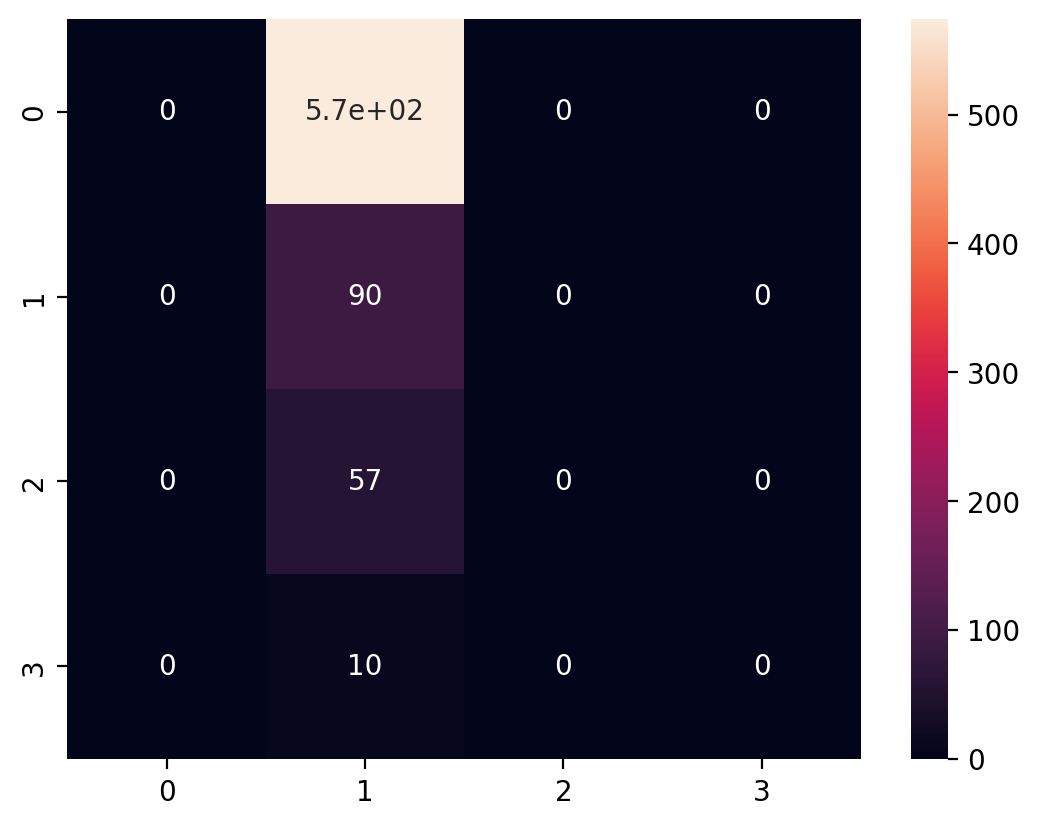

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:427,1:427,2:427,3:427},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1708, 18)
After OverSampling, the shape of train_y: (1708,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[2.900000e-01, 1.015800e+02, 1.927000e+01, ..., 6.780000e+00,
        4.620000e+00, 2.160000e+00],
       [8.940000e+00, 1.014900e+02, 1.612000e+01, ..., 7.340000e+00,
        2.240000e+00, 5.100000e+00],
       [3.770000e+00, 1.002800e+02, 1.940000e+01, ..., 2.377000e+01,
        7.300000e+00, 1.647000e+01],
       ...,
       [3.220000e-02, 1.012333e+02, 1.186220e+01, ..., 7.468900e+00,
        1.407100e+00, 6.061800e+00],
       [1.010000e-02, 1.014718e+02, 1.112480e+01, ..., 6.493100e+00,
        7.695000e-01, 5.723600e+00],
       [0.000000e+00, 1.016942e+02, 1.222520e+01, ..., 5.870600e+00,
        9.367000e-01, 4.933900e+00]])

(1708, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


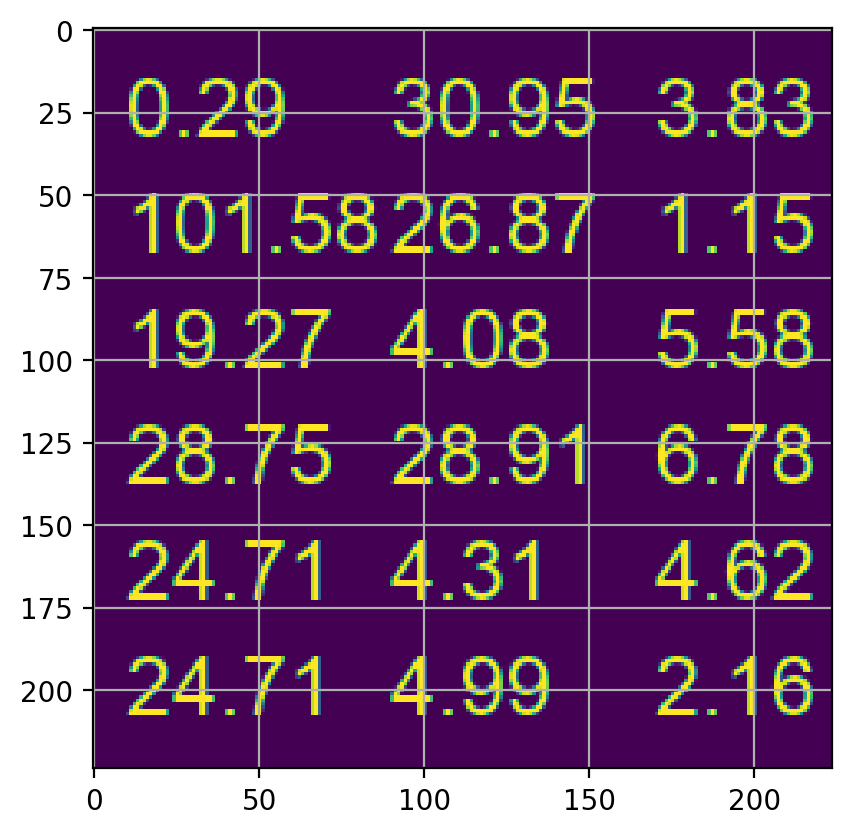

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1708, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1708,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
107/107 [==============================] - 22s 148ms/step - loss: 153.8192 - root_mean_squared_error: 12.4024 - val_loss: 0.9974 - val_root_mean_squared_error: 0.9987
Epoch 2/50
107/107 [==============================] - 13s 123ms/step - loss: 1.4374 - root_mean_squared_error: 1.1989 - val_loss: 0.9051 - val_root_mean_squared_error: 0.9514
Epoch 3/50
107/107 [==============================] - 13s 123ms/step - loss: 1.3440 - root_mean_squared_error: 1.1593 - val_loss: 0.9249 - val_root_mean_squared_error: 0.9617
Epoch 4/50
107/107 [==============================] - 13s 124ms/step - loss: 1.3255 - root_mean_squared_error: 1.1513 - val_loss: 0.9007 - val_root_mean_squared_error: 0.9491
Epoch 5/50
107/107 [==============================] - 13s 126ms/step - loss: 1.2220 - root_mean_squared_error: 1.1054 - val_loss: 0.9075 - val_root_mean_squared_error: 0.9526
Epoch 6/50
107/107 [==============================] - 14s 128ms/step - loss: 1.2264 - root_mean_squared_error: 1.1074 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 94ms/step


predictions  actuals
0       0.677759      2.0
1       1.390617      2.0
2       0.338531      2.0
3       0.404739      2.0
4       0.651433      2.0
..           ...      ...
726     0.591534      0.0
727     0.767727      0.0
728     1.219181      0.0
729     0.606465      0.0
730     1.168591      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            0.0      2.0
3            0.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            0.0      2.0
3            0.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.92      0.63      0.75       574
         1.0       0.21      0.74      0.33        90
         2.0       0.12      0.05      0.07        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.59       731
   macro avg       0.31      0.36      0.29       731
weighted avg       0.76      0.59      0.64       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.92      0.63      0.75       574
         1.0       0.21      0.74      0.33        90
         2.0       0.12      0.05      0.07        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.59       731
   macro avg       0.31      0.36      0.29       731
weighted avg       0.76      0.59      0.64       731



<Axes: >

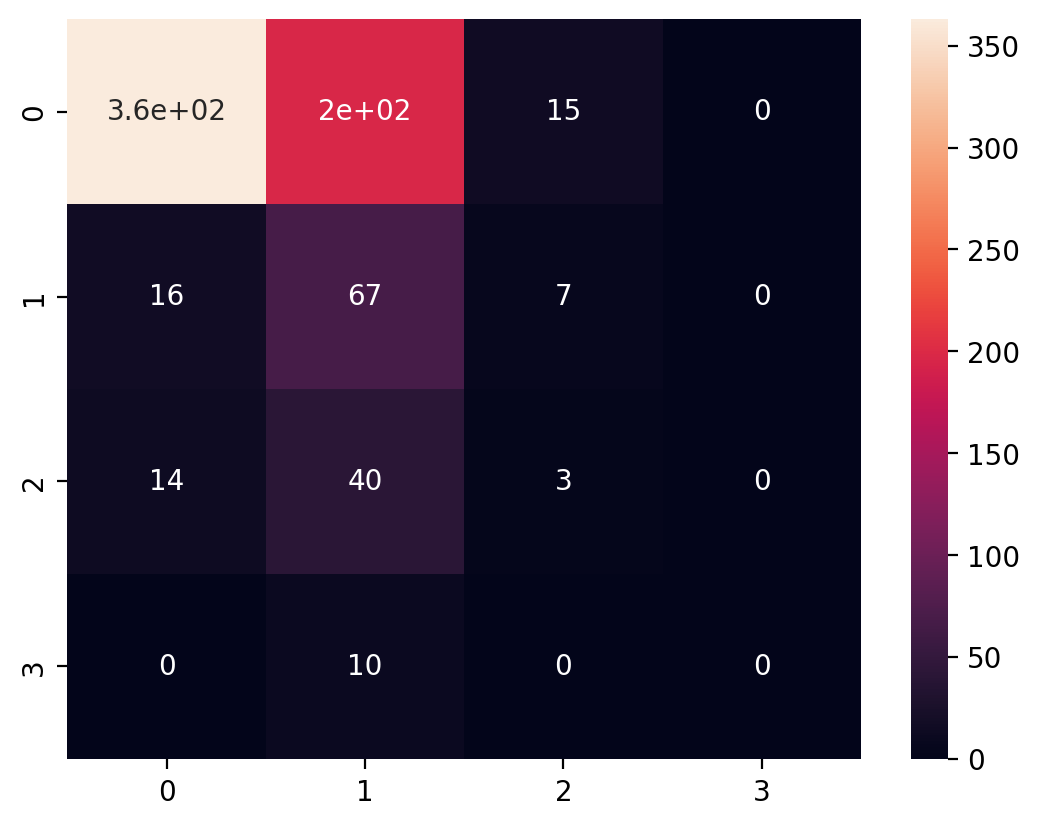

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
107/107 [==============================] - 43s 255ms/step - loss: 9.4951 - root_mean_squared_error: 3.0814 - val_loss: 0.9827 - val_root_mean_squared_error: 0.9913
Epoch 2/50
107/107 [==============================] - 21s 194ms/step - loss: 1.3734 - root_mean_squared_error: 1.1719 - val_loss: 0.9197 - val_root_mean_squared_error: 0.9590
Epoch 3/50
107/107 [==============================] - 21s 193ms/step - loss: 1.2814 - root_mean_squared_error: 1.1320 - val_loss: 0.8293 - val_root_mean_squared_error: 0.9107
Epoch 4/50
107/107 [==============================] - 20s 191ms/step - loss: 1.1392 - root_mean_squared_error: 1.0673 - val_loss: 0.8725 - val_root_mean_squared_error: 0.9341
Epoch 5/50
107/107 [==============================] - 20s 192ms/step - loss: 0.9887 - root_mean_squared_error: 0.9943 - val_loss: 0.9229 - val_root_mean_squared_error: 0.9607
Epoch 6/50
107/107 [==============================] - 21s 197ms/step - loss: 1.0512 - root_mean_squared_error: 1.0253 - val_l

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 158ms/step


predictions  actuals
0       0.521008      2.0
1       1.544845      2.0
2       1.154162      2.0
3       0.804135      2.0
4       0.651152      2.0
..           ...      ...
726     0.704118      0.0
727     0.655545      0.0
728     0.716920      0.0
729     0.647736      0.0
730     0.611949      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.95      0.43      0.59       574
         1.0       0.18      0.90      0.31        90
         2.0       0.13      0.07      0.09        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.46       731
   macro avg       0.32      0.35      0.25       731
weighted avg       0.78      0.46      0.51       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.95      0.43      0.59       574
         1.0       0.18      0.90      0.31        90
         2.0       0.13      0.07      0.09        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.46       731
   macro avg       0.32      0.35      0.25       731
weighted avg       0.78      0.46      0.51       731



<Axes: >

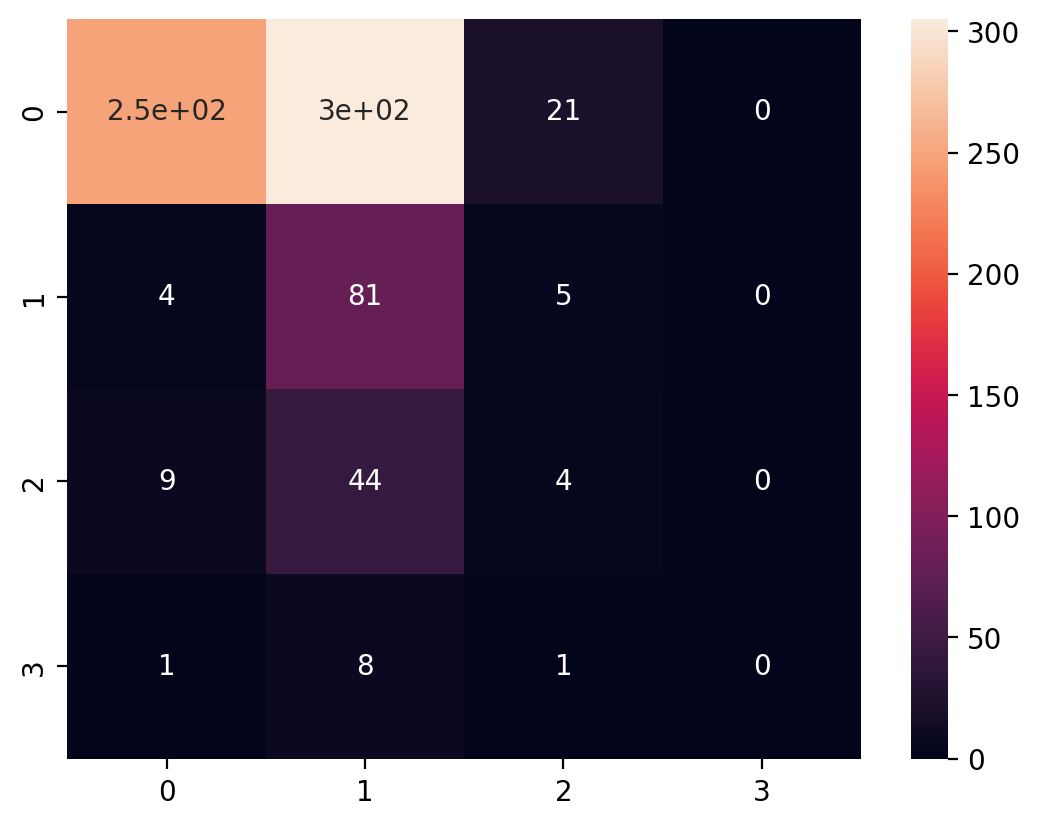

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
107/107 [==============================] - 15s 110ms/step - loss: 3.5692 - root_mean_squared_error: 1.8892 - val_loss: 1.2563 - val_root_mean_squared_error: 1.1209
Epoch 2/50
107/107 [==============================] - 9s 86ms/step - loss: 1.1730 - root_mean_squared_error: 1.0831 - val_loss: 0.8568 - val_root_mean_squared_error: 0.9256
Epoch 3/50
107/107 [==============================] - 9s 89ms/step - loss: 0.9946 - root_mean_squared_error: 0.9973 - val_loss: 0.8654 - val_root_mean_squared_error: 0.9303
Epoch 4/50
107/107 [==============================] - 9s 88ms/step - loss: 0.9618 - root_mean_squared_error: 0.9807 - val_loss: 0.8609 - val_root_mean_squared_error: 0.9278
Epoch 5/50
107/107 [==============================] - 9s 88ms/step - loss: 0.9313 - root_mean_squared_error: 0.9651 - val_loss: 0.8324 - val_root_mean_squared_error: 0.9124
Epoch 6/50
107/107 [==============================] - 9s 87ms/step - loss: 0.8970 - root_mean_squared_error: 0.9471 - val_loss: 0.862

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 118ms/step


predictions  actuals
0       1.805916      2.0
1       1.857083      2.0
2       1.447185      2.0
3       1.089314      2.0
4       0.959564      2.0
..           ...      ...
726     1.054210      0.0
727     0.608079      0.0
728     0.694281      0.0
729     0.011248      0.0
730     1.441398      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          0.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          0.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.91      0.62      0.73       574
         1.0       0.21      0.57      0.31        90
         2.0       0.16      0.26      0.20        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.57       731
   macro avg       0.32      0.36      0.31       731
weighted avg       0.75      0.57      0.63       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.91      0.62      0.73       574
         1.0       0.21      0.57      0.31        90
         2.0       0.16      0.26      0.20        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.57       731
   macro avg       0.32      0.36      0.31       731
weighted avg       0.75      0.57      0.63       731



<Axes: >

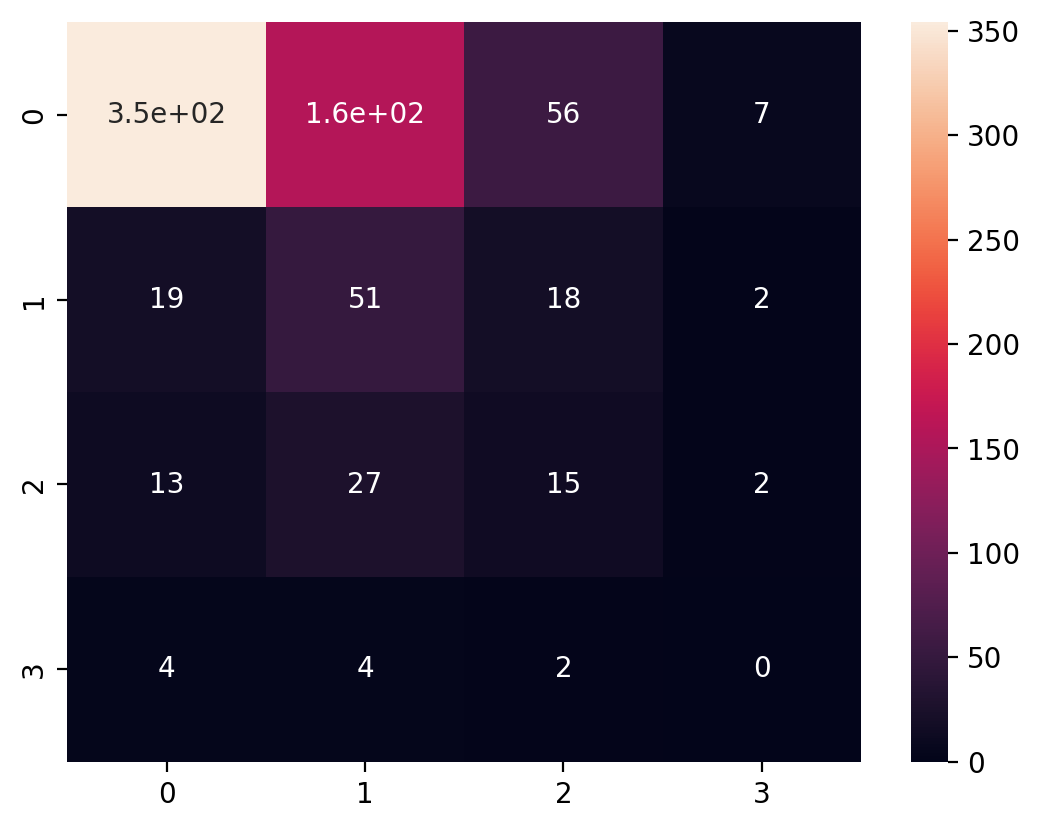

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font2)
        draw.text((10, 80), str(dat[8]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[5]), fill='white', font=font3)
        draw.text((10, 185), str(dat[14]), fill='white', font=font3)
        draw.text((90, 10), str(dat[15]), fill='white', font=font3)
        draw.text((90, 45), str(dat[2]), fill='white', font=font4)
        draw.text((90, 80), str(dat[7]), fill='white', font=font4)
        draw.text((90, 115), str(dat[11]), fill='white', font=font4)
        draw.text((90, 150), str(dat[10]), fill='white', font=font5)
        draw.text((90, 185), str(dat[13]), fill='white', font=font5)
        draw.text((170, 10), str(dat[17]), fill='white', font=font5)
        draw.text((170, 45), str(dat[1]), fill='white', font=font5)
        draw.text((170, 80), str(dat[3]), fill='white', font=font5)
        draw.text((170, 115), str(dat[12]), fill='white', font=font5)
        draw.text((170, 150), str(dat[16]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


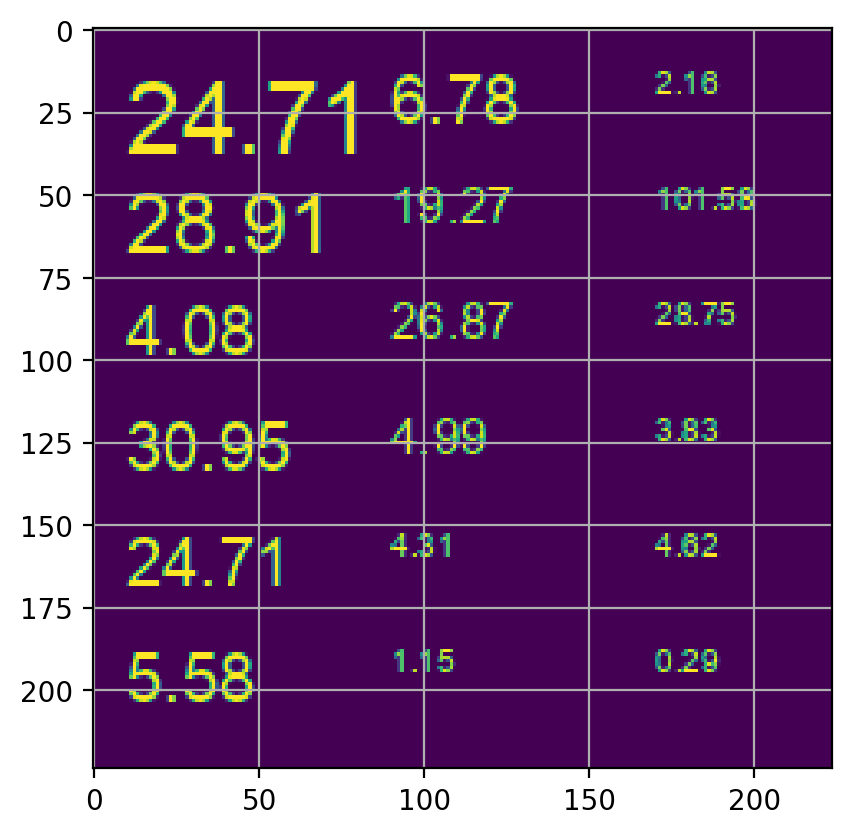

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 12s 189ms/step - loss: 54.5122 - root_mean_squared_error: 7.3832 - val_loss: 0.9329 - val_root_mean_squared_error: 0.9659
Epoch 2/50
37/37 [==============================] - 5s 144ms/step - loss: 1.0279 - root_mean_squared_error: 1.0138 - val_loss: 0.9825 - val_root_mean_squared_error: 0.9912
Epoch 3/50
37/37 [==============================] - 5s 140ms/step - loss: 1.0138 - root_mean_squared_error: 1.0069 - val_loss: 0.9794 - val_root_mean_squared_error: 0.9896
Epoch 4/50
37/37 [==============================] - 5s 139ms/step - loss: 1.0193 - root_mean_squared_error: 1.0096 - val_loss: 0.8910 - val_root_mean_squared_error: 0.9439
Epoch 5/50
37/37 [==============================] - 5s 140ms/step - loss: 0.9492 - root_mean_squared_error: 0.9743 - val_loss: 0.9448 - val_root_mean_squared_error: 0.9720
Epoch 6/50
37/37 [==============================] - 5s 138ms/step - loss: 0.9933 - root_mean_squared_error: 0.9967 - val_loss: 0.9987 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 95ms/step


predictions  actuals
0       0.306394      2.0
1       1.418975      2.0
2       1.364232      2.0
3       1.141206      2.0
4       1.178611      2.0
..           ...      ...
726     0.365171      0.0
727     0.297539      0.0
728     0.510748      0.0
729     0.429165      0.0
730     0.260707      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.92      0.56      0.69       574
         1.0       0.20      0.78      0.31        90
         2.0       0.27      0.12      0.17        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.54       731
   macro avg       0.35      0.36      0.29       731
weighted avg       0.77      0.54      0.60       731



<Axes: >

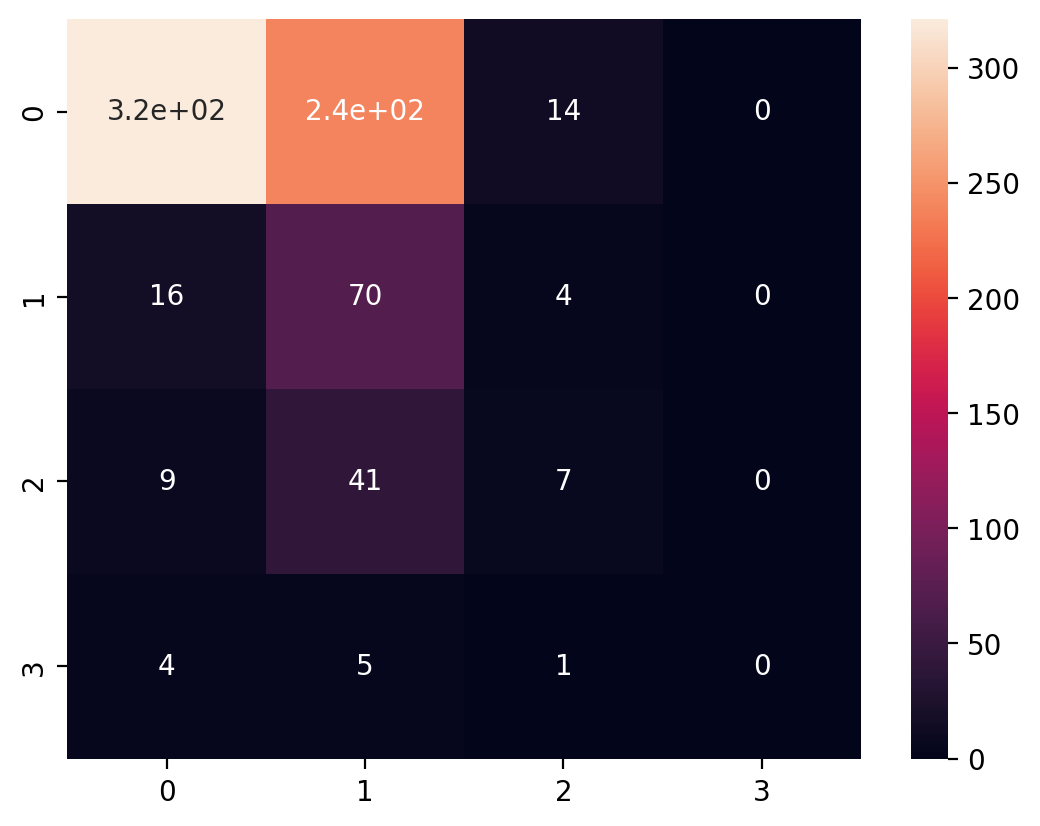

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 28s 369ms/step - loss: 22.7024 - root_mean_squared_error: 4.7647 - val_loss: 0.9389 - val_root_mean_squared_error: 0.9690
Epoch 2/50
37/37 [==============================] - 8s 214ms/step - loss: 1.0731 - root_mean_squared_error: 1.0359 - val_loss: 0.9380 - val_root_mean_squared_error: 0.9685
Epoch 3/50
37/37 [==============================] - 8s 218ms/step - loss: 1.0175 - root_mean_squared_error: 1.0087 - val_loss: 0.9262 - val_root_mean_squared_error: 0.9624
Epoch 4/50
37/37 [==============================] - 8s 220ms/step - loss: 1.0006 - root_mean_squared_error: 1.0003 - val_loss: 0.9161 - val_root_mean_squared_error: 0.9571
Epoch 5/50
37/37 [==============================] - 8s 225ms/step - loss: 0.9582 - root_mean_squared_error: 0.9789 - val_loss: 0.9942 - val_root_mean_squared_error: 0.9971
Epoch 6/50
37/37 [==============================] - 8s 220ms/step - loss: 0.9228 - root_mean_squared_error: 0.9606 - val_loss: 0.9108 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 10s 160ms/step


predictions  actuals
0       0.721875      2.0
1       1.817169      2.0
2       0.536890      2.0
3       0.621840      2.0
4       0.462983      2.0
..           ...      ...
726     0.836270      0.0
727     1.173105      0.0
728     0.607943      0.0
729     0.762639      0.0
730     0.956269      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            0.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            0.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      0.47      0.62       574
         1.0       0.18      0.71      0.29        90
         2.0       0.11      0.19      0.14        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.47       731
   macro avg       0.31      0.34      0.26       731
weighted avg       0.77      0.47      0.54       731



<Axes: >

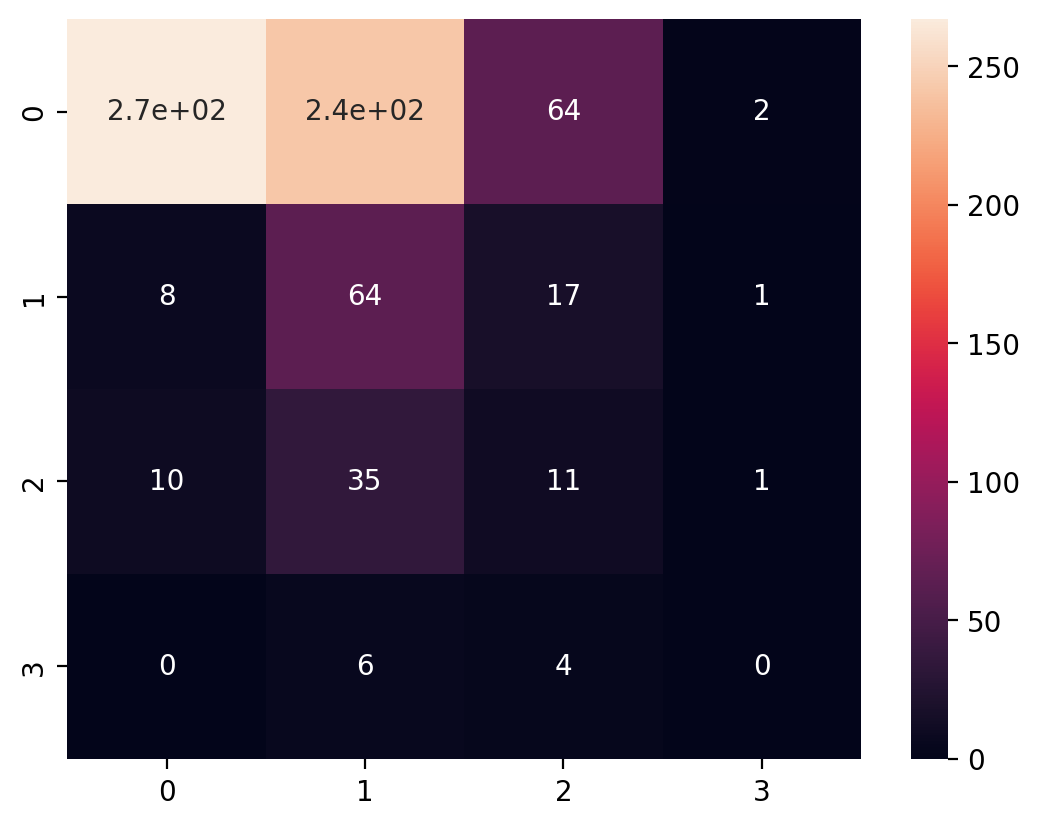

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 7s 128ms/step - loss: 4.2521 - root_mean_squared_error: 2.0621 - val_loss: 1.0698 - val_root_mean_squared_error: 1.0343
Epoch 2/50
37/37 [==============================] - 4s 112ms/step - loss: 1.0470 - root_mean_squared_error: 1.0232 - val_loss: 1.0334 - val_root_mean_squared_error: 1.0165
Epoch 3/50
37/37 [==============================] - 4s 112ms/step - loss: 1.0306 - root_mean_squared_error: 1.0152 - val_loss: 1.0005 - val_root_mean_squared_error: 1.0003
Epoch 4/50
37/37 [==============================] - 4s 113ms/step - loss: 0.9545 - root_mean_squared_error: 0.9770 - val_loss: 0.9477 - val_root_mean_squared_error: 0.9735
Epoch 5/50
37/37 [==============================] - 4s 112ms/step - loss: 0.9415 - root_mean_squared_error: 0.9703 - val_loss: 0.9230 - val_root_mean_squared_error: 0.9607
Epoch 6/50
37/37 [==============================] - 4s 112ms/step - loss: 0.9272 - root_mean_squared_error: 0.9629 - val_loss: 0.8276 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 154ms/step


predictions  actuals
0       0.814039      2.0
1       0.756111      2.0
2       1.197056      2.0
3       0.452810      2.0
4       1.784476      2.0
..           ...      ...
726     0.835000      0.0
727     0.235000      0.0
728     0.726131      0.0
729     0.129147      0.0
730     1.568798      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            0.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            0.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      0.0
727          0.0      0.0
728          1.0      0.0
729          0.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72       574
         1.0       0.14      0.30      0.19        90
         2.0       0.11      0.21      0.14        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.54       731
   macro avg       0.28      0.28      0.26       731
weighted avg       0.72      0.54      0.60       731



<Axes: >

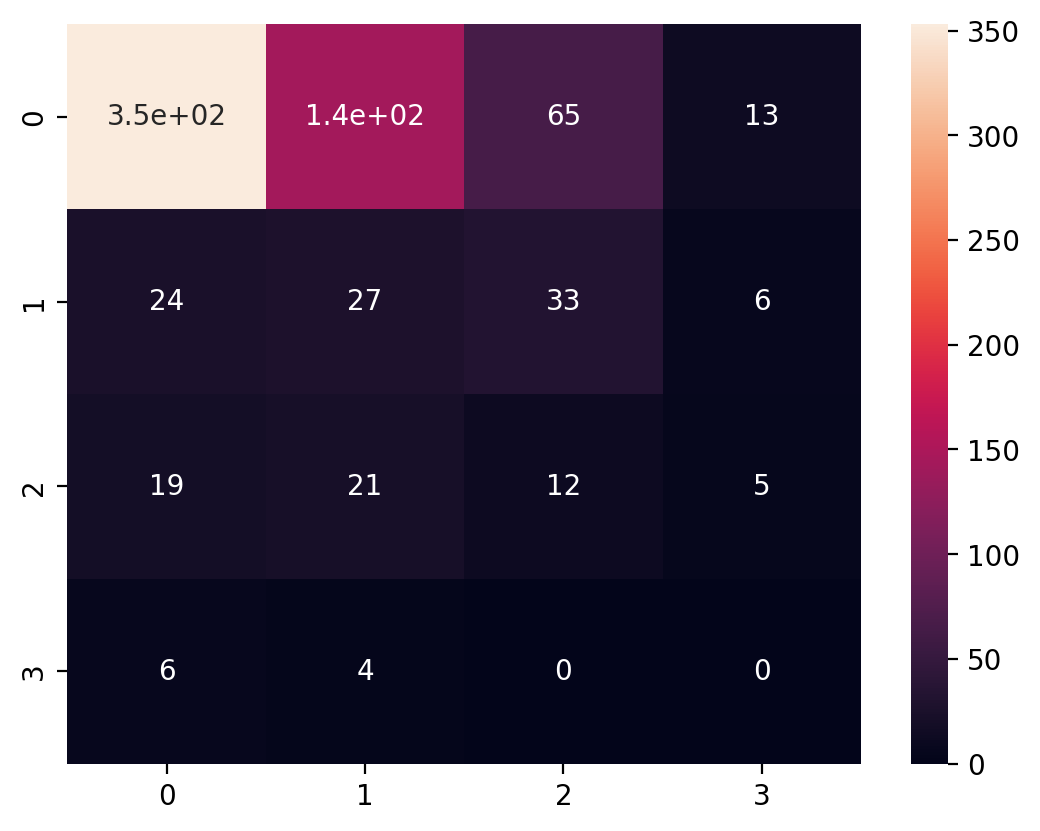

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font2)
        draw.text((10, 80), str(dat[8]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[5]), fill='white', font=font3)
        draw.text((10, 185), str(dat[14]), fill='white', font=font3)
        draw.text((90, 10), str(dat[15]), fill='white', font=font3)
        draw.text((90, 45), str(dat[2]), fill='white', font=font4)
        draw.text((90, 80), str(dat[7]), fill='white', font=font4)
        draw.text((90, 115), str(dat[11]), fill='white', font=font4)
        draw.text((90, 150), str(dat[10]), fill='white', font=font5)
        draw.text((90, 185), str(dat[13]), fill='white', font=font5)
        draw.text((170, 10), str(dat[17]), fill='white', font=font5)
        draw.text((170, 45), str(dat[1]), fill='white', font=font5)
        draw.text((170, 80), str(dat[3]), fill='white', font=font5)
        draw.text((170, 115), str(dat[12]), fill='white', font=font5)
        draw.text((170, 150), str(dat[16]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:427,1:427,2:427,3:427},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1708, 18)
After OverSampling, the shape of train_y: (1708,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[2.900000e-01, 1.015800e+02, 1.927000e+01, ..., 6.780000e+00,
        4.620000e+00, 2.160000e+00],
       [8.940000e+00, 1.014900e+02, 1.612000e+01, ..., 7.340000e+00,
        2.240000e+00, 5.100000e+00],
       [3.770000e+00, 1.002800e+02, 1.940000e+01, ..., 2.377000e+01,
        7.300000e+00, 1.647000e+01],
       ...,
       [3.220000e-02, 1.012333e+02, 1.186220e+01, ..., 7.468900e+00,
        1.407100e+00, 6.061800e+00],
       [1.010000e-02, 1.014718e+02, 1.112480e+01, ..., 6.493100e+00,
        7.695000e-01, 5.723600e+00],
       [0.000000e+00, 1.016942e+02, 1.222520e+01, ..., 5.870600e+00,
        9.367000e-01, 4.933900e+00]])

(1708, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


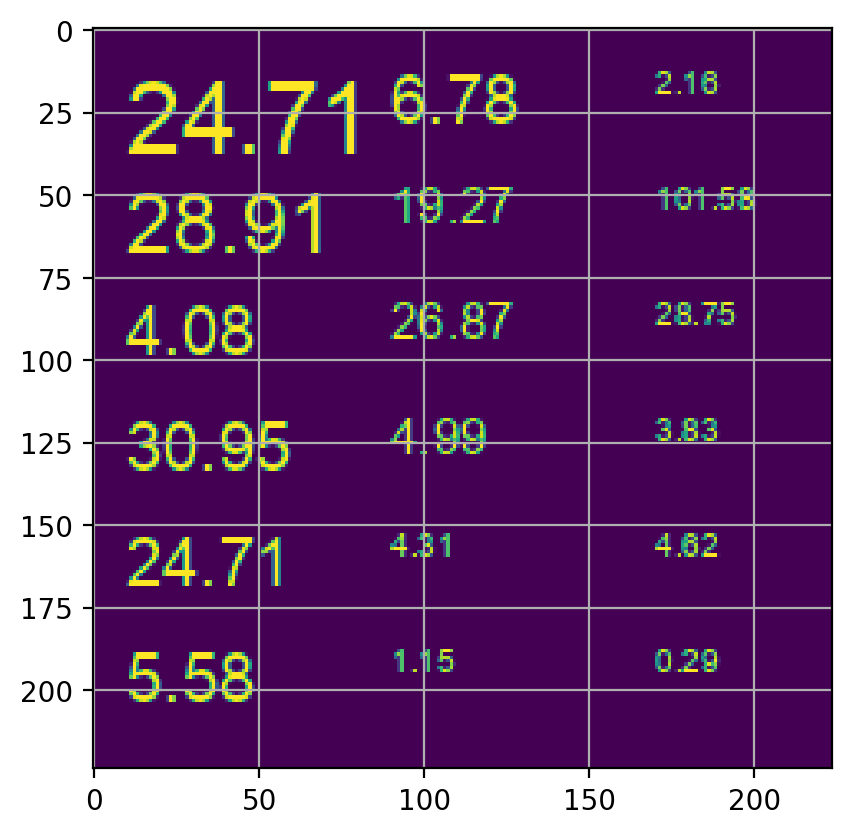

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1708, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1708,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
107/107 [==============================] - 21s 140ms/step - loss: 30.2590 - root_mean_squared_error: 5.5008 - val_loss: 0.8786 - val_root_mean_squared_error: 0.9373
Epoch 2/50
107/107 [==============================] - 13s 123ms/step - loss: 1.4283 - root_mean_squared_error: 1.1951 - val_loss: 0.9790 - val_root_mean_squared_error: 0.9894
Epoch 3/50
107/107 [==============================] - 13s 123ms/step - loss: 1.3545 - root_mean_squared_error: 1.1638 - val_loss: 0.8399 - val_root_mean_squared_error: 0.9165
Epoch 4/50
107/107 [==============================] - 13s 124ms/step - loss: 1.3041 - root_mean_squared_error: 1.1420 - val_loss: 0.8133 - val_root_mean_squared_error: 0.9018
Epoch 5/50
107/107 [==============================] - 13s 125ms/step - loss: 1.1636 - root_mean_squared_error: 1.0787 - val_loss: 0.7938 - val_root_mean_squared_error: 0.8910
Epoch 6/50
107/107 [==============================] - 13s 126ms/step - loss: 1.2006 - root_mean_squared_error: 1.0957 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 94ms/step


predictions  actuals
0       0.702993      2.0
1       1.094721      2.0
2       0.790650      2.0
3       0.801628      2.0
4       0.991769      2.0
..           ...      ...
726     0.523288      0.0
727     0.752461      0.0
728     0.752775      0.0
729     0.520668      0.0
730     0.634553      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61       574
         1.0       0.19      0.98      0.32        90
         2.0       0.44      0.07      0.12        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.47       731
   macro avg       0.41      0.37      0.26       731
weighted avg       0.84      0.47      0.53       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61       574
         1.0       0.19      0.98      0.32        90
         2.0       0.44      0.07      0.12        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.47       731
   macro avg       0.41      0.37      0.26       731
weighted avg       0.84      0.47      0.53       731



<Axes: >

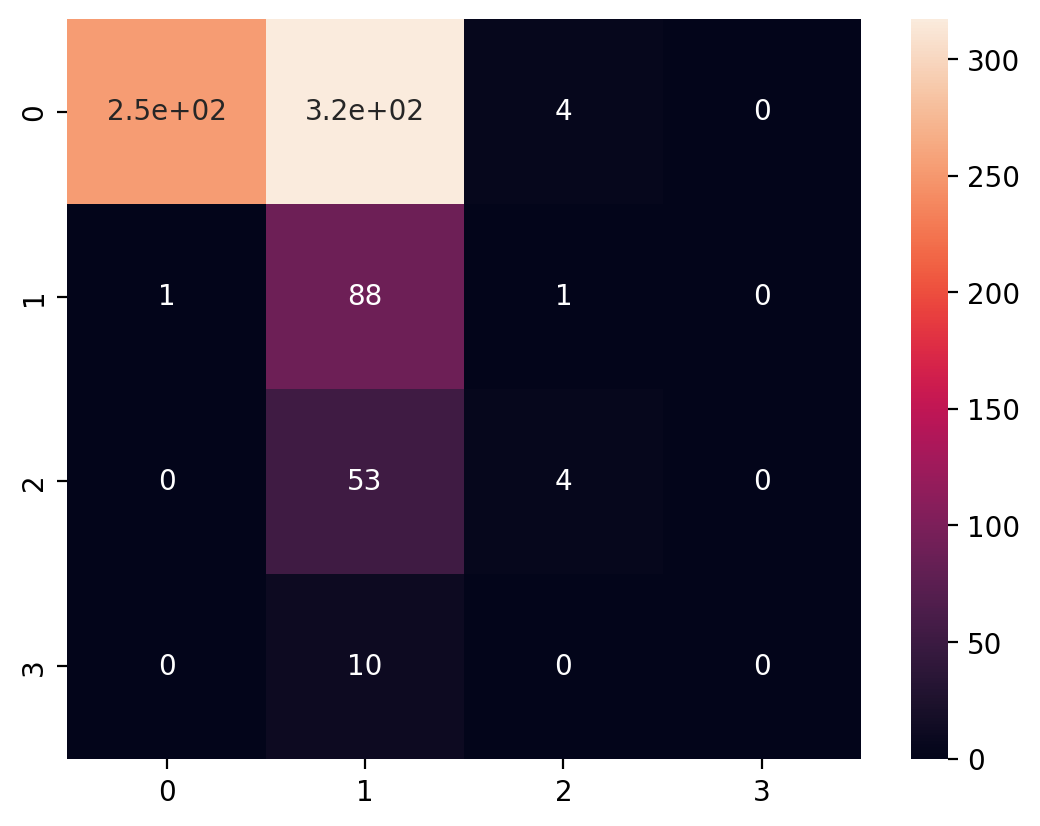

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
107/107 [==============================] - 41s 237ms/step - loss: 14.5614 - root_mean_squared_error: 3.8159 - val_loss: 1.0244 - val_root_mean_squared_error: 1.0121
Epoch 2/50
107/107 [==============================] - 20s 188ms/step - loss: 1.3644 - root_mean_squared_error: 1.1681 - val_loss: 0.9637 - val_root_mean_squared_error: 0.9817
Epoch 3/50
107/107 [==============================] - 20s 191ms/step - loss: 1.4031 - root_mean_squared_error: 1.1845 - val_loss: 0.9109 - val_root_mean_squared_error: 0.9544
Epoch 4/50
107/107 [==============================] - 21s 194ms/step - loss: 1.2976 - root_mean_squared_error: 1.1391 - val_loss: 0.8746 - val_root_mean_squared_error: 0.9352
Epoch 5/50
107/107 [==============================] - 21s 193ms/step - loss: 1.1670 - root_mean_squared_error: 1.0803 - val_loss: 0.7895 - val_root_mean_squared_error: 0.8885
Epoch 6/50
107/107 [==============================] - 20s 191ms/step - loss: 1.2597 - root_mean_squared_error: 1.1223 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 156ms/step


predictions  actuals
0       1.016539      2.0
1       1.900891      2.0
2       0.523081      2.0
3       1.058538      2.0
4       0.932796      2.0
..           ...      ...
726     0.491804      0.0
727     0.959200      0.0
728     0.915510      0.0
729     0.692021      0.0
730     0.684933      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.95      0.51      0.66       574
         1.0       0.20      0.72      0.31        90
         2.0       0.12      0.21      0.16        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.51       731
   macro avg       0.32      0.36      0.28       731
weighted avg       0.78      0.51      0.57       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.95      0.51      0.66       574
         1.0       0.20      0.72      0.31        90
         2.0       0.12      0.21      0.16        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.51       731
   macro avg       0.32      0.36      0.28       731
weighted avg       0.78      0.51      0.57       731



<Axes: >

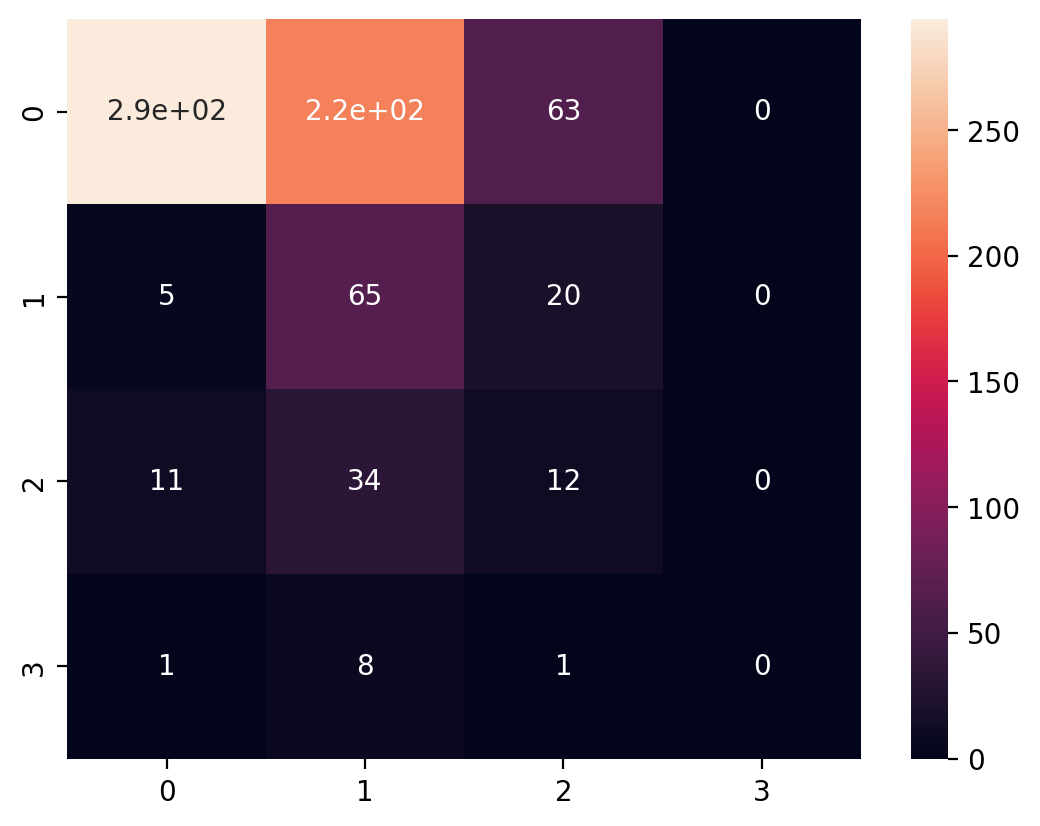

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
107/107 [==============================] - 13s 91ms/step - loss: 7.8513 - root_mean_squared_error: 2.8020 - val_loss: 1.0745 - val_root_mean_squared_error: 1.0366
Epoch 2/50
107/107 [==============================] - 9s 85ms/step - loss: 1.1182 - root_mean_squared_error: 1.0575 - val_loss: 0.9339 - val_root_mean_squared_error: 0.9664
Epoch 3/50
107/107 [==============================] - 9s 86ms/step - loss: 1.1132 - root_mean_squared_error: 1.0551 - val_loss: 0.8791 - val_root_mean_squared_error: 0.9376
Epoch 4/50
107/107 [==============================] - 9s 85ms/step - loss: 1.0348 - root_mean_squared_error: 1.0173 - val_loss: 0.7779 - val_root_mean_squared_error: 0.8820
Epoch 5/50
107/107 [==============================] - 9s 85ms/step - loss: 0.8950 - root_mean_squared_error: 0.9460 - val_loss: 0.7175 - val_root_mean_squared_error: 0.8471
Epoch 6/50
107/107 [==============================] - 9s 85ms/step - loss: 0.8468 - root_mean_squared_error: 0.9202 - val_loss: 0.7378

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 117ms/step


predictions  actuals
0       0.506606      2.0
1       0.897982      2.0
2       0.678943      2.0
3       0.745255      2.0
4       0.662806      2.0
..           ...      ...
726     0.818572      0.0
727     0.542575      0.0
728     1.328898      0.0
729     1.399224      0.0
730     0.881456      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            1.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72       574
         1.0       0.18      0.49      0.26        90
         2.0       0.12      0.25      0.16        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.54       731
   macro avg       0.31      0.33      0.29       731
weighted avg       0.77      0.54      0.61       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72       574
         1.0       0.18      0.49      0.26        90
         2.0       0.12      0.25      0.16        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.54       731
   macro avg       0.31      0.33      0.29       731
weighted avg       0.77      0.54      0.61       731



<Axes: >

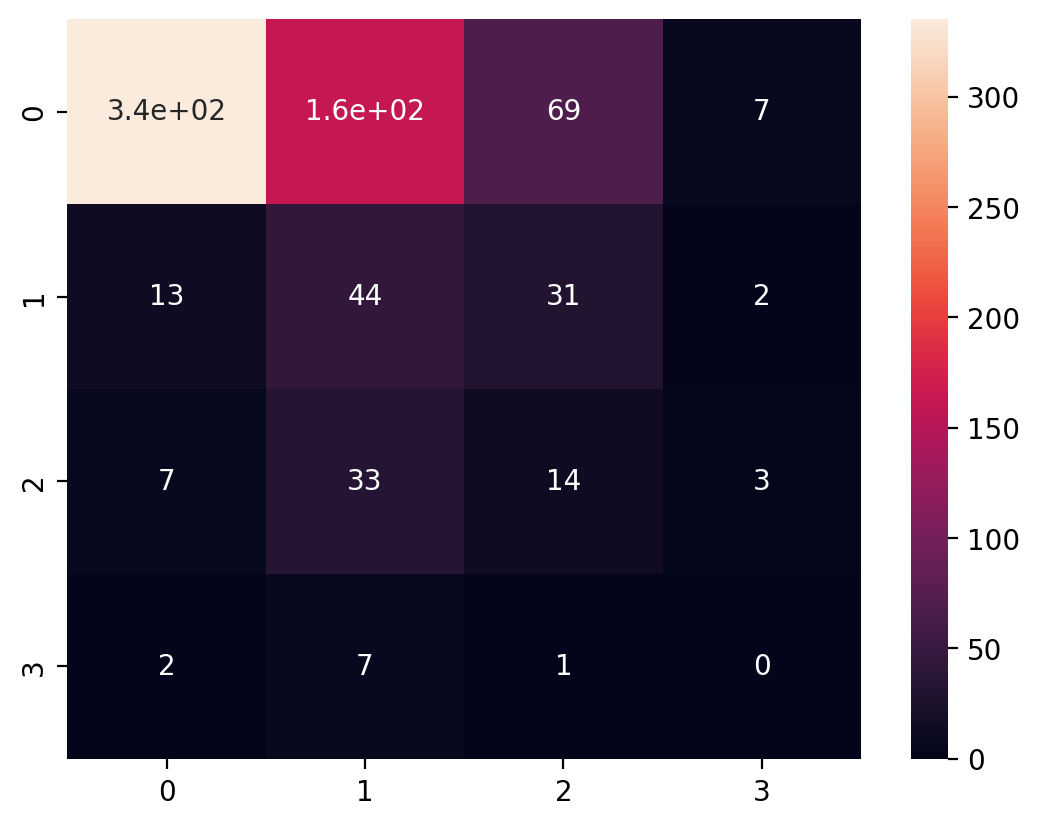

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

##Holt, Nebraska

###train

In [ ]:
holt = train[train['fips']==31089]

#using interpolation to fill in the NaN values
holt = holt.interpolate().fillna(method='bfill')
holt.score[holt.score <0.5] = 0
holt.score[(holt.score >=0.5)&(holt.score<1.5)] = 1
holt.score[(holt.score >=1.5)&(holt.score<2.5)] = 2
holt.score[(holt.score >=2.5)&(holt.score<3.5)] = 3
holt.score[(holt.score >=3.5)&(holt.score<4.5)] = 4
holt.score[(holt.score >=4.5)&(holt.score<5.5)] = 5
holt

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
10333440  31089  2000-01-01     0.01  93.41  2.75 -1.44   -5.13   -5.08   
10333441  31089  2000-01-02     0.04  93.59  2.20 -2.04   -7.86   -7.72   
10333442  31089  2000-01-03     0.45  94.43  2.07 -5.37   -9.04   -8.87   
10333443  31089  2000-01-04     0.00  94.70  1.23 -8.35  -14.42  -14.00   
10333444  31089  2000-01-05     0.75  93.78  2.93 -0.28   -4.69   -4.61   
...         ...         ...      ...    ...   ...   ...     ...     ...   
10339645  31089  2016-12-27     0.00  94.39  2.18 -1.94   -8.15   -7.73   
10339646  31089  2016-12-28     0.00  94.13  2.57  1.48   -5.88   -5.77   
10339647  31089  2016-12-29     0.00  95.16  2.09 -0.83   -8.21   -8.03   
10339648  31089  2016-12-30     0.00  93.67  2.47 -0.24   -6.75   -6.61   
10339649  31089  2016-12-31     0.00  93.71  2.01 -2.22   -8.91   -8.72   

          T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
10333440     2.68    -3.58       6.25 -1.61   4.19       5.79       2.51   
10333441     1.90    -3.85       5.74 -1.58   4.82       7.75       1.95   
10333442    -2.24   -12.52      10.28 -5.01   8.21      12.51       2.48   
10333443    -1.13   -14.98      13.85 -7.72   5.61       8.52       2.29   
10333444     4.49    -3.13       7.62 -0.85   5.99       9.33       4.16   
...           ...      ...        ...   ...    ...        ...        ...   
10339645     5.22    -7.74      12.97 -2.68   5.16       7.82       2.63   
10339646     5.71    -0.58       6.29  0.71   8.25      10.88       5.23   
10339647     2.91    -3.61       6.52 -1.40   8.30      11.88       2.64   
10339648     8.70    -5.13      13.83 -1.09   5.74       7.79       3.03   
10339649     2.14    -6.79       8.93 -2.34   5.78      10.06       2.42   

          WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
10333440         3.29   6.23       7.95       4.73         3.22    3.0  
10333441         5.80   6.12       9.67       3.25         6.42    3.0  
10333442        10.02  10.06      15.14       3.02        12.12    3.0  
10333443         6.22   7.38      11.59       3.24         8.35    3.0  
10333444         5.16   8.87      12.34       4.95         7.39    3.0  
...               ...    ...        ...        ...          ...    ...  
10339645         5.19   8.30      11.25       4.54         6.70    0.0  
10339646         5.66  11.82      14.63       7.66         6.96    0.0  
10339647         9.24  11.63      15.96       4.64        11.32    0.0  
10339648         4.76   8.96      10.87       5.42         5.45    0.0  
10339649         7.65   8.33      13.11       4.34         8.77    0.0  

[6210 rows x 21 columns]

###val

In [ ]:
ne_val = validation[validation['fips']==31089]

#using interpolation to fill in the NaN values
ne_val = ne_val.interpolate().fillna(method='bfill')
ne_val.score[ne_val.score <0.5] = 0
ne_val.score[(ne_val.score >=0.5)&(ne_val.score<1.5)] = 1
ne_val.score[(ne_val.score >=1.5)&(ne_val.score<2.5)] = 2
ne_val.score[(ne_val.score >=2.5)&(ne_val.score<3.5)] = 3
ne_val.score[(ne_val.score >=3.5)&(ne_val.score<4.5)] = 4
ne_val.score[(ne_val.score >=4.5)&(ne_val.score<5.5)] = 5

ne_val

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
1214720  31089  2017-01-01     0.04  93.66  2.63  -2.85   -5.65   -5.61   
1214721  31089  2017-01-02     0.06  93.92  2.77  -3.09   -5.48   -5.42   
1214722  31089  2017-01-03     0.00  95.10  0.95 -12.34  -16.73  -16.24   
1214723  31089  2017-01-04     1.29  94.87  0.79 -14.59  -18.56  -17.98   
1214724  31089  2017-01-05     0.01  94.66  0.74 -14.68  -19.22  -18.49   
...        ...         ...      ...    ...   ...    ...     ...     ...   
1215445  31089  2018-12-27     9.20  93.28  1.84  -8.28  -10.51   -9.98   
1215446  31089  2018-12-28     0.30  94.80  1.12 -13.48  -16.34  -15.10   
1215447  31089  2018-12-29     0.00  94.55  1.54 -11.15  -12.58  -12.48   
1215448  31089  2018-12-30     0.00  93.16  3.11  -2.41   -3.75   -4.01   
1215449  31089  2018-12-31     0.51  94.23  1.72 -10.17  -11.23  -11.87   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
1214720     1.54    -6.57       8.12  -3.38   3.81       4.91       2.34   
1214721     1.97    -9.66      11.63  -2.83   5.46      10.66       1.65   
1214722    -9.98   -14.74       4.76 -11.85   8.76      10.70       5.71   
1214723   -13.49   -16.25       2.76 -13.68   4.39       6.10       2.84   
1214724   -12.67   -17.33       4.67 -14.38   5.66       8.80       2.78   
...          ...      ...        ...    ...    ...        ...        ...   
1215445    -2.63   -10.49       7.85  -8.26  12.32      13.21       9.79   
1215446   -10.67   -19.11       8.44 -14.20   8.38      12.34       3.28   
1215447    -3.73   -19.04      15.31 -12.86   5.71       7.82       2.06   
1215448     1.70    -8.49      10.18  -3.20   5.09       7.43       2.10   
1215449    -1.00   -16.84      15.84 -10.16  10.40      13.46       2.55   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1214720         2.56   6.14       8.40       4.07         4.33    0.0  
1214721         9.00   7.08      12.95       1.75        11.20    0.0  
1214722         5.00  10.78      12.90       7.27         5.63    0.0  
1214723         3.26   5.35       7.68       3.12         4.55    0.0  
1214724         6.02   7.30      10.44       4.58         5.86    0.0  
...              ...    ...        ...        ...          ...    ...  
1215445         3.41  15.31      16.50      12.21         4.29    0.0  
1215446         9.06  10.95      15.59       4.70        10.89    0.0  
1215447         5.76   7.79      10.85       2.70         8.15    0.0  
1215448         5.33   7.77      10.44       3.65         6.79    0.0  
1215449        10.91  13.05      16.29       4.34        11.95    0.0  

[730 rows x 21 columns]

In [ ]:
ne_val['score'].value_counts()

0.0    604
1.0     95
2.0     31
Name: score, dtype: int64

In [ ]:
ne_val = ne_val.round(4)

In [ ]:
X = ne_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = ne_val['score']

###xgboost feature importance

In [ ]:
X_train = holt[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = holt['score']

In [ ]:
X_val = ne_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = ne_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

-2.8627826733752784
0.33563144026901565
0.9801638879273381


In [ ]:
model.get_booster().get_score(importance_type='gain')

{'f0': 1.9159694910049438,
 'f1': 2.7869150638580322,
 'f2': 3.866452217102051,
 'f3': 3.893061637878418,
 'f4': 8.7964506149292,
 'f5': 8.209504127502441,
 'f6': 5.152744770050049,
 'f7': 4.917638301849365,
 'f8': 3.651806592941284,
 'f9': 7.1848859786987305,
 'f10': 3.59748911857605,
 'f11': 3.6229844093322754,
 'f12': 3.2757890224456787,
 'f13': 4.051080226898193,
 'f14': 4.1675190925598145,
 'f15': 3.6400904655456543,
 'f16': 3.9975199699401855,
 'f17': 3.8020031452178955}

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

{'f0': 1.9159694910049438,
 'f1': 2.7869150638580322,
 'f2': 3.866452217102051,
 'f3': 3.893061637878418,
 'f4': 8.7964506149292,
 'f5': 8.209504127502441,
 'f6': 5.152744770050049,
 'f7': 4.917638301849365,
 'f8': 3.651806592941284,
 'f9': 7.1848859786987305,
 'f10': 3.59748911857605,
 'f11': 3.6229844093322754,
 'f12': 3.2757890224456787,
 'f13': 4.051080226898193,
 'f14': 4.1675190925598145,
 'f15': 3.6400904655456543,
 'f16': 3.9975199699401855,
 'f17': 3.8020031452178955}

In [ ]:
importance_df

0
f0   1.915969
f1   2.786915
f2   3.866452
f3   3.893062
f4   8.796451
f5   8.209504
f6   5.152745
f7   4.917638
f8   3.651807
f9   7.184886
f10  3.597489
f11  3.622984
f12  3.275789
f13  4.051080
f14  4.167519
f15  3.640090
f16  3.997520
f17  3.802003

<Axes: >

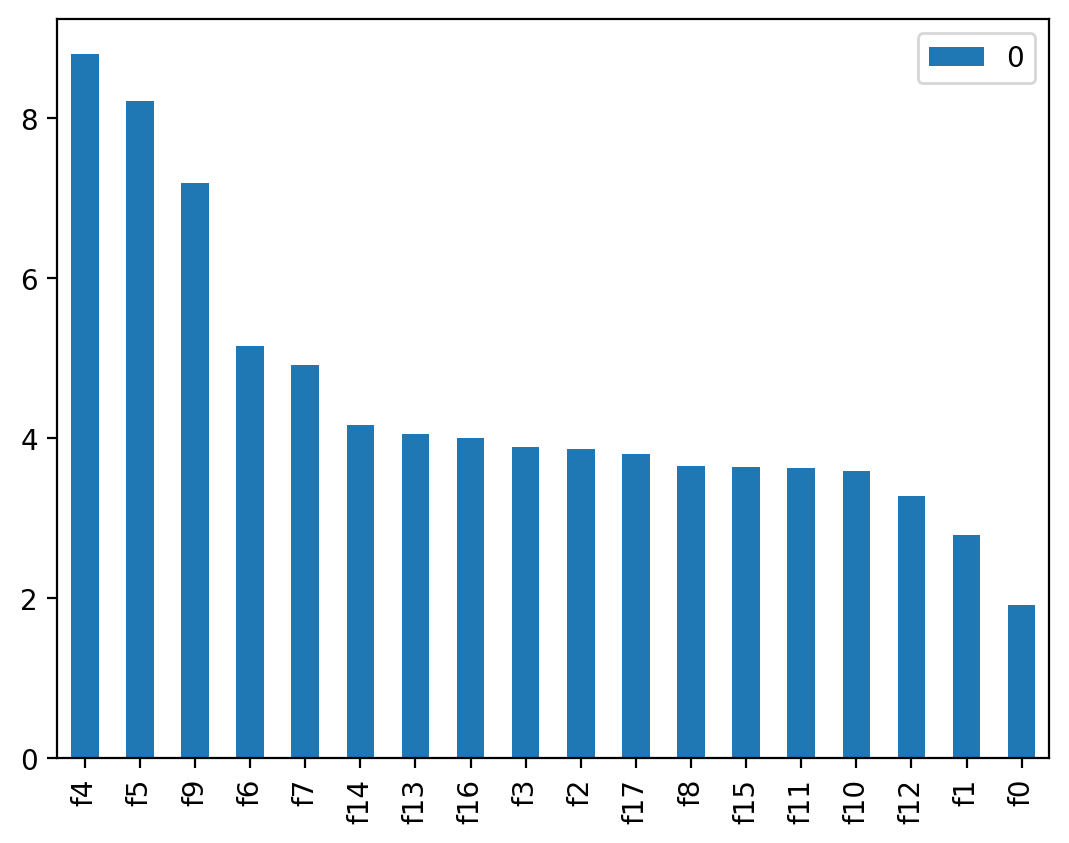

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. T2MDEW
2. T2MWET
3. TS
4. T2M_MAX
5. T2M_MIN
6. WS50M
7. WS10M_RANGE
8. WS50M_MIN
9. T2M
10. QV2M
11. WS50M_RANGE
12. T2M_RANGE
13. WS50M_MAX
14. WS10M_MAX
15. WS10M
16. WS10M_MIN
17. PS
18. PRECTOT

###test

In [ ]:
ne_test = test[test['fips']==31089]

#using interpolation to fill in the NaN values
ne_test = ne_test.interpolate().fillna(method='bfill')
ne_test.score[ne_test.score <0.5] = 0
ne_test.score[(ne_test.score >=0.5)&(ne_test.score<1.5)] = 1
ne_test.score[(ne_test.score >=1.5)&(ne_test.score<2.5)] = 2
ne_test.score[(ne_test.score >=2.5)&(ne_test.score<3.5)] = 3
ne_test.score[(ne_test.score >=3.5)&(ne_test.score<4.5)] = 4
ne_test.score[(ne_test.score >=4.5)&(ne_test.score<5.5)] = 5

ne_test.head()

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
1216384  31089  2019-01-01      0.0  95.27  0.79 -14.89  -20.44  -18.10   
1216385  31089  2019-01-02      0.0  94.19  2.00  -6.56   -9.34   -9.62   
1216386  31089  2019-01-03      0.0  93.89  3.01  -1.30   -4.07   -4.15   
1216387  31089  2019-01-04      0.0  93.78  3.66   1.43   -1.45   -1.51   
1216388  31089  2019-01-05      0.0  94.15  3.94   1.83   -0.39   -0.44   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
1216384   -10.67   -19.12       8.45 -14.87   4.75       8.68       1.76   
1216385     1.38   -14.64      16.02  -7.40   5.50       6.98       3.82   
1216386     3.72    -4.90       8.62  -2.51   4.99       6.63       3.72   
1216387     6.23    -0.88       7.12  -0.06   4.52       5.83       3.44   
1216388     7.00    -0.64       7.64   0.72   3.89       5.06       2.69   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1216384         6.92   6.34      11.07       2.33         8.74    0.0  
1216385         3.16   8.75      10.40       6.51         3.88    0.0  
1216386         2.90   8.24       9.42       6.95         2.47    0.0  
1216387         2.39   8.20       9.94       5.67         4.26    0.0  
1216388         2.37   6.96      10.15       4.31         5.84    0.0

In [ ]:
ne_test = ne_test.round(4)
ne_test

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
1216384  31089  2019-01-01     0.00  95.27  0.79 -14.89  -20.44  -18.10   
1216385  31089  2019-01-02     0.00  94.19  2.00  -6.56   -9.34   -9.62   
1216386  31089  2019-01-03     0.00  93.89  3.01  -1.30   -4.07   -4.15   
1216387  31089  2019-01-04     0.00  93.78  3.66   1.43   -1.45   -1.51   
1216388  31089  2019-01-05     0.00  94.15  3.94   1.83   -0.39   -0.44   
...        ...         ...      ...    ...   ...    ...     ...     ...   
1217110  31089  2020-12-27     0.18  93.99  2.89  -1.97   -4.58   -3.28   
1217111  31089  2020-12-28     0.38  95.22  2.14  -5.28   -8.33   -6.81   
1217112  31089  2020-12-29    16.27  94.24  2.44  -5.12   -6.78   -5.95   
1217113  31089  2020-12-30     0.00  94.48  1.83  -7.25  -10.38   -8.81   
1217114  31089  2020-12-31     0.00  94.30  2.20  -6.24   -8.09   -7.17   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
1216384   -10.67   -19.12       8.45 -14.87   4.75       8.68       1.76   
1216385     1.38   -14.64      16.02  -7.40   5.50       6.98       3.82   
1216386     3.72    -4.90       8.62  -2.51   4.99       6.63       3.72   
1216387     6.23    -0.88       7.12  -0.06   4.52       5.83       3.44   
1216388     7.00    -0.64       7.64   0.72   3.89       5.06       2.69   
...          ...      ...        ...    ...    ...        ...        ...   
1217110     2.59    -7.72      10.31  -2.23   6.24      12.02       1.93   
1217111    -1.57    -9.21       7.64  -5.54   2.71       4.88       1.01   
1217112    -3.66    -7.57       3.91  -5.52   5.90       8.11       2.48   
1217113    -2.65   -12.07       9.42  -9.27   5.42       7.49       1.13   
1217114     0.86   -11.59      12.44  -7.30   4.69       5.44       2.98   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1216384         6.92   6.34      11.07       2.33         8.74    0.0  
1216385         3.16   8.75      10.40       6.51         3.88    0.0  
1216386         2.90   8.24       9.42       6.95         2.47    0.0  
1216387         2.39   8.20       9.94       5.67         4.26    0.0  
1216388         2.37   6.96      10.15       4.31         5.84    0.0  
...              ...    ...        ...        ...          ...    ...  
1217110        10.09   8.33      14.78       3.48        11.30    2.0  
1217111         3.87   3.91       6.83       1.57         5.27    2.0  
1217112         5.63   8.15      11.54       4.17         7.37    2.0  
1217113         6.36   8.20      11.54       1.53        10.01    2.0  
1217114         2.46   7.64       9.71       4.79         4.92    2.0  

[731 rows x 21 columns]

In [ ]:
ne_test['score'].value_counts()

0.0    625
2.0     97
1.0      9
Name: score, dtype: int64

In [ ]:
X_test = ne_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = ne_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN 2D With SuperTML Method

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


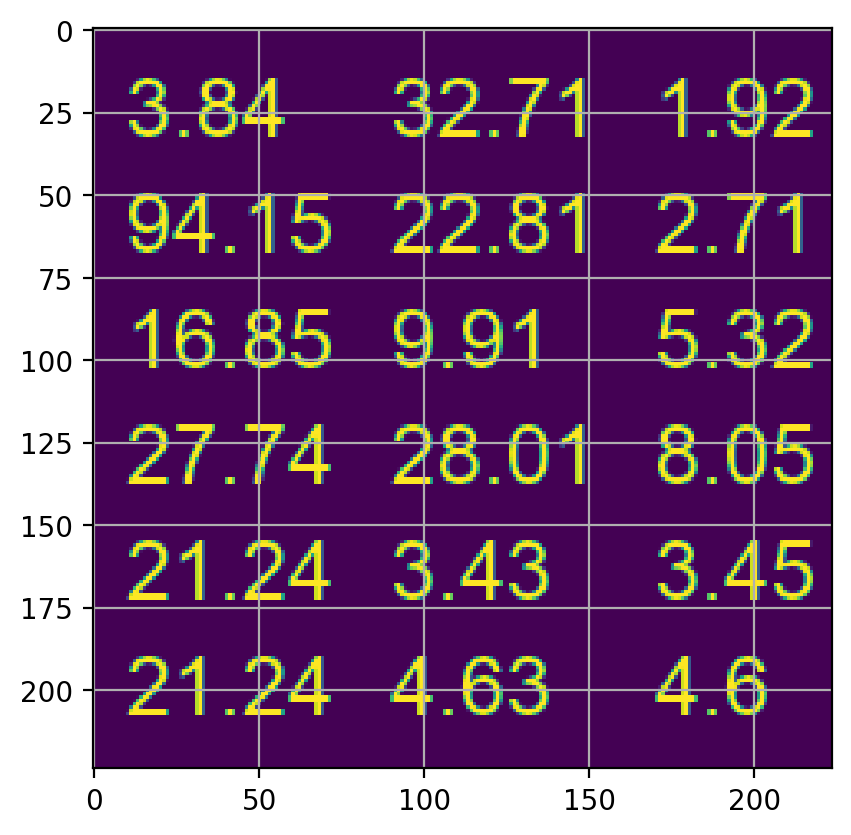

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 9s 82ms/step - loss: 59.4967 - root_mean_squared_error: 7.7134 - val_loss: 0.3435 - val_root_mean_squared_error: 0.5861
Epoch 2/50
37/37 [==============================] - 1s 32ms/step - loss: 0.6332 - root_mean_squared_error: 0.7957 - val_loss: 0.2448 - val_root_mean_squared_error: 0.4947
Epoch 3/50
37/37 [==============================] - 1s 32ms/step - loss: 0.3039 - root_mean_squared_error: 0.5513 - val_loss: 0.2633 - val_root_mean_squared_error: 0.5131
Epoch 4/50
37/37 [==============================] - 1s 32ms/step - loss: 0.2845 - root_mean_squared_error: 0.5334 - val_loss: 0.2530 - val_root_mean_squared_error: 0.5030
Epoch 5/50
37/37 [==============================] - 1s 32ms/step - loss: 0.2679 - root_mean_squared_error: 0.5176 - val_loss: 0.2375 - val_root_mean_squared_error: 0.4873
Epoch 6/50
37/37 [==============================] - 1s 32ms/step - loss: 0.2596 - root_mean_squared_error: 0.5095 - val_loss: 0.2314 - val_root_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 2s 20ms/step


predictions  actuals
0       0.421783      0.0
1       0.070903      0.0
2       0.167496      0.0
3       0.105725      0.0
4       0.131195      0.0
..           ...      ...
726     0.073901      2.0
727     0.104490      2.0
728     0.073171      2.0
729     0.088654      2.0
730     0.219273      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       625
         1.0       0.03      0.11      0.05         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.82       731
   macro avg       0.29      0.35      0.32       731
weighted avg       0.73      0.82      0.77       731



<AxesSubplot:>

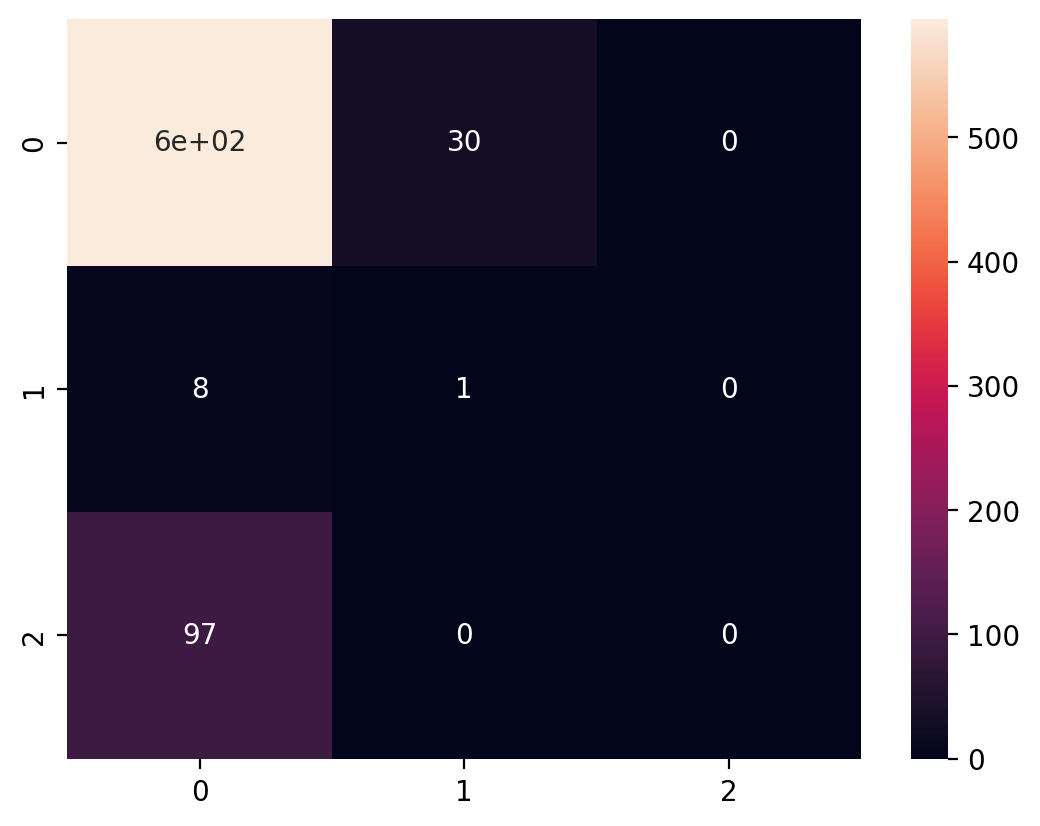

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 24s 234ms/step - loss: 4.2256 - root_mean_squared_error: 2.0556 - val_loss: 0.2754 - val_root_mean_squared_error: 0.5248
Epoch 2/50
37/37 [==============================] - 3s 78ms/step - loss: 0.2746 - root_mean_squared_error: 0.5240 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 3/50
37/37 [==============================] - 3s 75ms/step - loss: 0.2735 - root_mean_squared_error: 0.5230 - val_loss: 0.2524 - val_root_mean_squared_error: 0.5024
Epoch 4/50
37/37 [==============================] - 3s 74ms/step - loss: 0.2629 - root_mean_squared_error: 0.5127 - val_loss: 0.2531 - val_root_mean_squared_error: 0.5031
Epoch 5/50
37/37 [==============================] - 3s 74ms/step - loss: 0.2637 - root_mean_squared_error: 0.5135 - val_loss: 0.2552 - val_root_mean_squared_error: 0.5051
Epoch 6/50
37/37 [==============================] - 3s 77ms/step - loss: 0.2918 - root_mean_squared_error: 0.5402 - val_loss: 0.2467 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 41ms/step


predictions  actuals
0       0.169077      0.0
1       0.126792      0.0
2       0.618659      0.0
3       0.099098      0.0
4       0.072050      0.0
..           ...      ...
726     0.072050      2.0
727     0.072050      2.0
728     0.072050      2.0
729     0.678120      2.0
730     0.346064      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          1.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          1.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       625
         1.0       0.01      0.11      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.71       731
   macro avg       0.28      0.31      0.28       731
weighted avg       0.72      0.71      0.72       731



<AxesSubplot:>

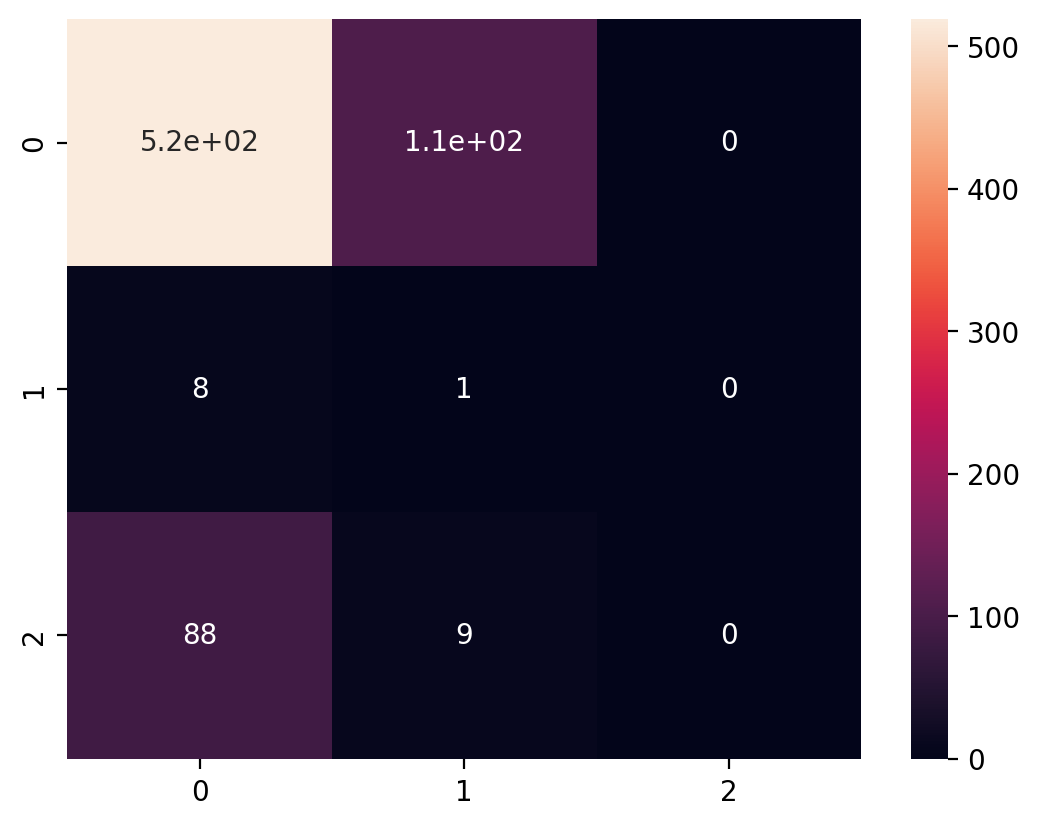

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 3s 33ms/step - loss: 1.3673 - root_mean_squared_error: 1.1693 - val_loss: 0.2577 - val_root_mean_squared_error: 0.5076
Epoch 2/50
37/37 [==============================] - 1s 19ms/step - loss: 0.2723 - root_mean_squared_error: 0.5218 - val_loss: 0.2836 - val_root_mean_squared_error: 0.5325
Epoch 3/50
37/37 [==============================] - 1s 18ms/step - loss: 0.2804 - root_mean_squared_error: 0.5295 - val_loss: 0.2620 - val_root_mean_squared_error: 0.5118
Epoch 4/50
37/37 [==============================] - 1s 19ms/step - loss: 0.2661 - root_mean_squared_error: 0.5159 - val_loss: 0.2527 - val_root_mean_squared_error: 0.5027
Epoch 5/50
37/37 [==============================] - 1s 19ms/step - loss: 0.2557 - root_mean_squared_error: 0.5057 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 6/50
37/37 [==============================] - 1s 19ms/step - loss: 0.2591 - root_mean_squared_error: 0.5091 - val_loss: 0.2495 - val_root_m

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 1s 17ms/step


predictions  actuals
0       0.211974      0.0
1       0.211974      0.0
2       0.211974      0.0
3       0.211974      0.0
4       0.211974      0.0
..           ...      ...
726     0.211974      2.0
727     0.211974      2.0
728     0.211974      2.0
729     0.211974      2.0
730     0.211974      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       625
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.85       731
   macro avg       0.28      0.33      0.31       731
weighted avg       0.73      0.85      0.79       731



<AxesSubplot:>

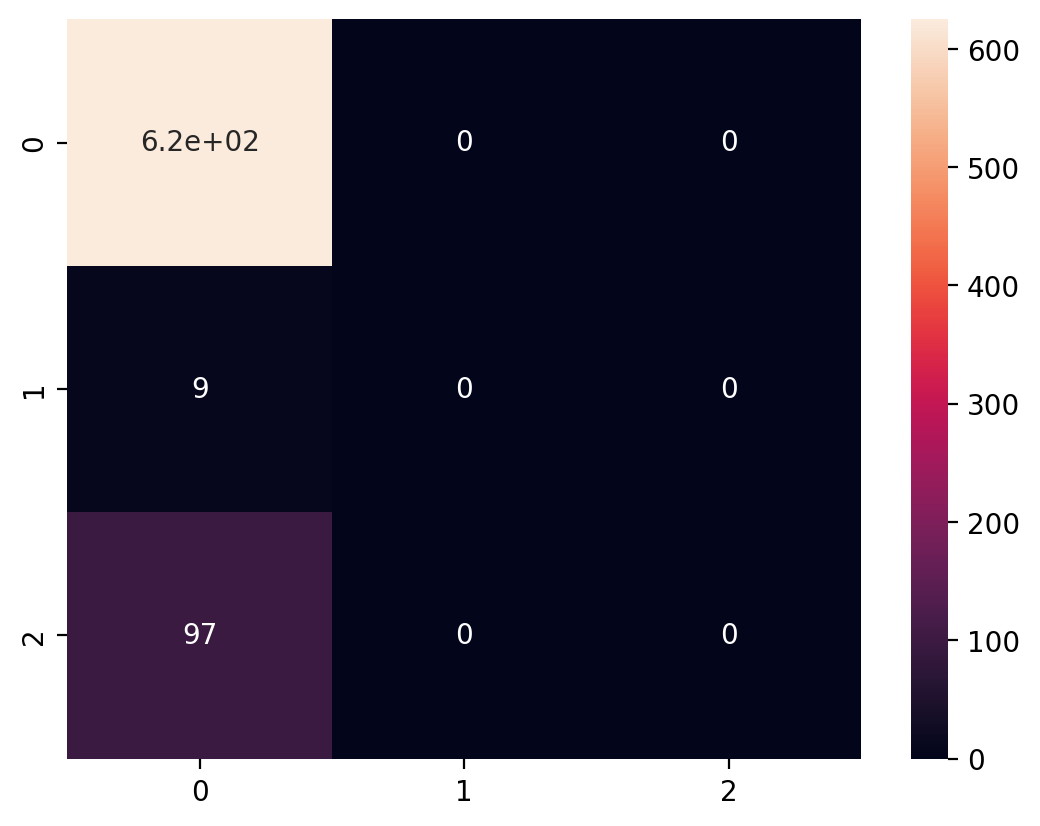

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:604,1:604,2:604},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1812, 18)
After OverSampling, the shape of train_y: (1812,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[ 3.84  , 94.15  , 16.85  , ...,  8.05  ,  3.45  ,  4.6   ],
       [ 3.72  , 94.54  ,  3.69  , ..., 11.72  ,  6.03  ,  5.69  ],
       [ 5.18  , 94.01  ,  3.61  , ...,  9.79  ,  6.62  ,  3.17  ],
       ...,
       [ 0.224 , 94.2347, 13.0348, ...,  7.5173,  1.286 ,  6.2313],
       [ 0.2159, 94.3869, 12.4836, ...,  7.3572,  2.0533,  5.3039],
       [ 0.1379, 94.2538, 13.0879, ...,  8.2262,  1.5424,  6.6838]])

(1812, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


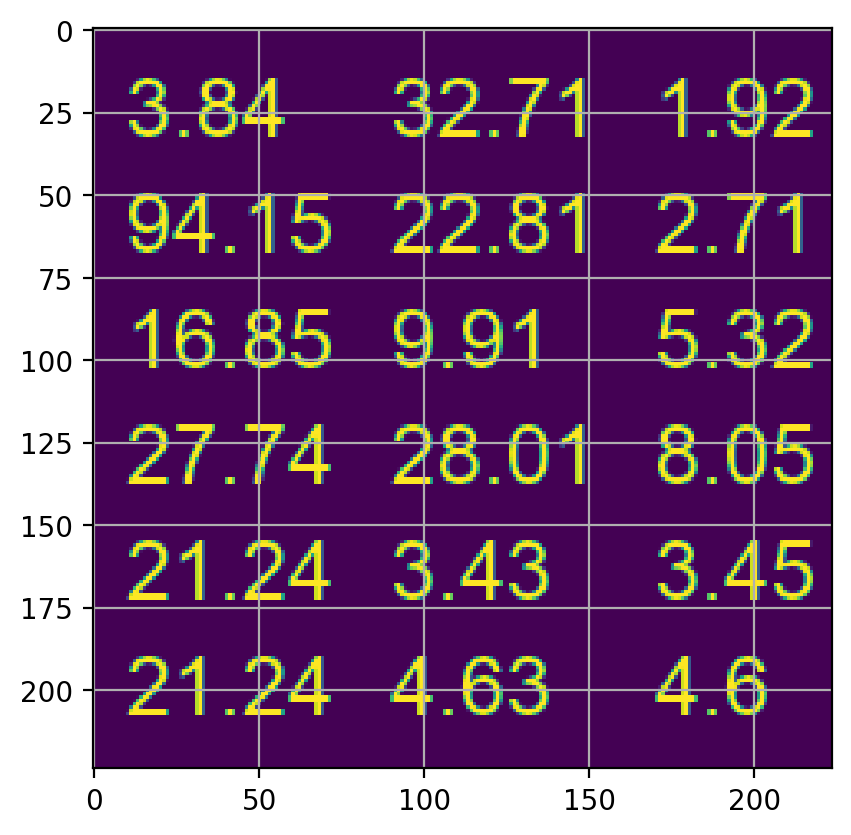

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1812, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1812,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_18 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_9 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
114/114 [==============================] - 24s 143ms/step - loss: 22.9295 - root_mean_squared_error: 4.7885 - val_loss: 0.2417 - val_root_mean_squared_error: 0.4916
Epoch 2/50
114/114 [==============================] - 14s 122ms/step - loss: 0.4956 - root_mean_squared_error: 0.7040 - val_loss: 0.2259 - val_root_mean_squared_error: 0.4752
Epoch 3/50
114/114 [==============================] - 14s 123ms/step - loss: 0.4559 - root_mean_squared_error: 0.6752 - val_loss: 0.2256 - val_root_mean_squared_error: 0.4750
Epoch 4/50
114/114 [==============================] - 14s 123ms/step - loss: 0.4425 - root_mean_squared_error: 0.6652 - val_loss: 0.2473 - val_root_mean_squared_error: 0.4973
Epoch 5/50
114/114 [==============================] - 14s 123ms/step - loss: 0.4209 - root_mean_squared_error: 0.6488 - val_loss: 0.2224 - val_root_mean_squared_error: 0.4716
Epoch 6/50
114/114 [==============================] - 14s 124ms/step - loss: 0.3995 - root_mean_squared_error: 0.6321 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 94ms/step


predictions  actuals
0       0.398896      0.0
1      -0.174220      0.0
2       0.109708      0.0
3       0.041107      0.0
4       0.083361      0.0
..           ...      ...
726    -0.146437      2.0
727    -0.199255      2.0
728    -0.209638      2.0
729    -0.138810      2.0
730     0.128493      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       625
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.81       731
   macro avg       0.28      0.32      0.30       731
weighted avg       0.73      0.81      0.77       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       625
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.81       731
   macro avg       0.28      0.32      0.30       731
weighted avg       0.73      0.81      0.77       731



<Axes: >

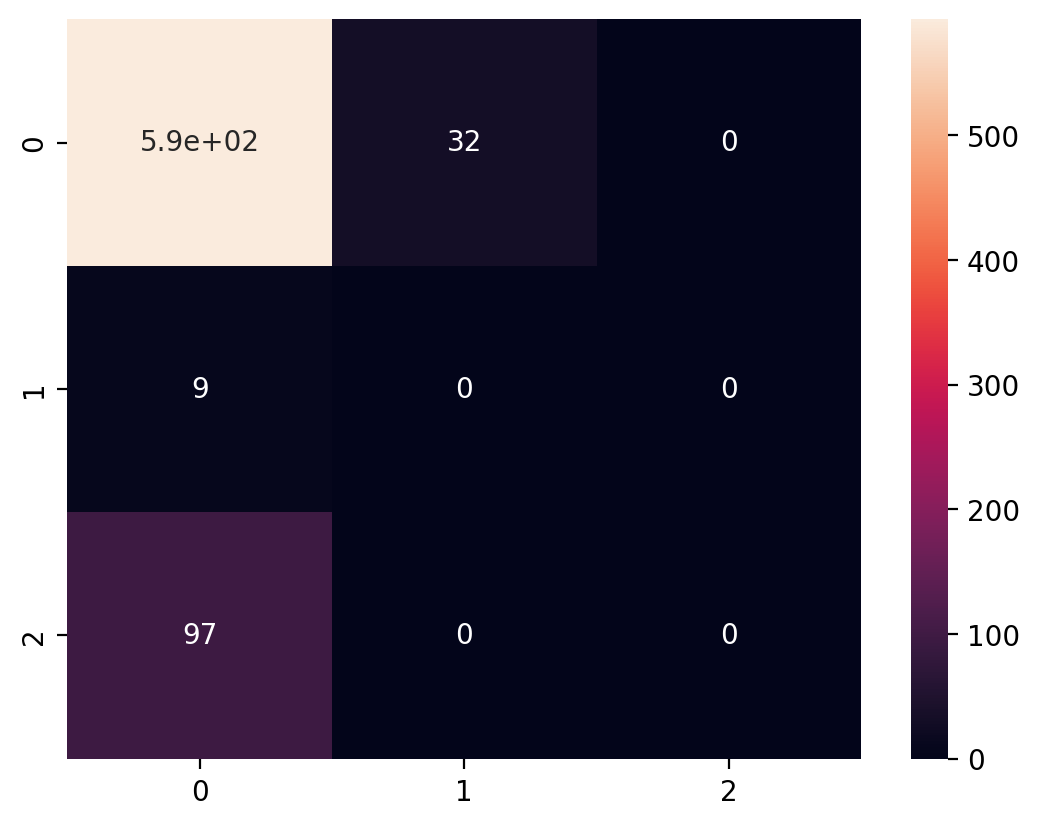

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_10 (LSTM)              (None, 256)               39584768  
                                                                 
 dense_20 (Dense)            (None, 64)                16448     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)               

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
114/114 [==============================] - 44s 247ms/step - loss: 3.4558 - root_mean_squared_error: 1.8590 - val_loss: 0.2515 - val_root_mean_squared_error: 0.5015
Epoch 2/50
114/114 [==============================] - 22s 193ms/step - loss: 0.6614 - root_mean_squared_error: 0.8133 - val_loss: 0.2367 - val_root_mean_squared_error: 0.4865
Epoch 3/50
114/114 [==============================] - 22s 191ms/step - loss: 0.6328 - root_mean_squared_error: 0.7955 - val_loss: 0.2449 - val_root_mean_squared_error: 0.4949
Epoch 4/50
114/114 [==============================] - 22s 190ms/step - loss: 0.5851 - root_mean_squared_error: 0.7649 - val_loss: 0.2423 - val_root_mean_squared_error: 0.4922
Epoch 5/50
114/114 [==============================] - 22s 191ms/step - loss: 0.5323 - root_mean_squared_error: 0.7296 - val_loss: 0.2488 - val_root_mean_squared_error: 0.4988
Epoch 6/50
114/114 [==============================] - 22s 192ms/step - loss: 0.5244 - root_mean_squared_error: 0.7242 - val_l

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 10s 161ms/step


predictions  actuals
0       0.587445      0.0
1       0.587445      0.0
2       0.587445      0.0
3       0.587445      0.0
4       0.587445      0.0
..           ...      ...
726     0.587445      2.0
727     0.587445      2.0
728     0.587445      2.0
729     0.627364      2.0
730     0.587445      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      2.0
727          1.0      2.0
728          1.0      2.0
729          1.0      2.0
730          1.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      2.0
727          1.0      2.0
728          1.0      2.0
729          1.0      2.0
730          1.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       625
         1.0       0.01      1.00      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.01       731
   macro avg       0.00      0.33      0.01       731
weighted avg       0.00      0.01      0.00       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       625
         1.0       0.01      1.00      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.01       731
   macro avg       0.00      0.33      0.01       731
weighted avg       0.00      0.01      0.00       731



<Axes: >

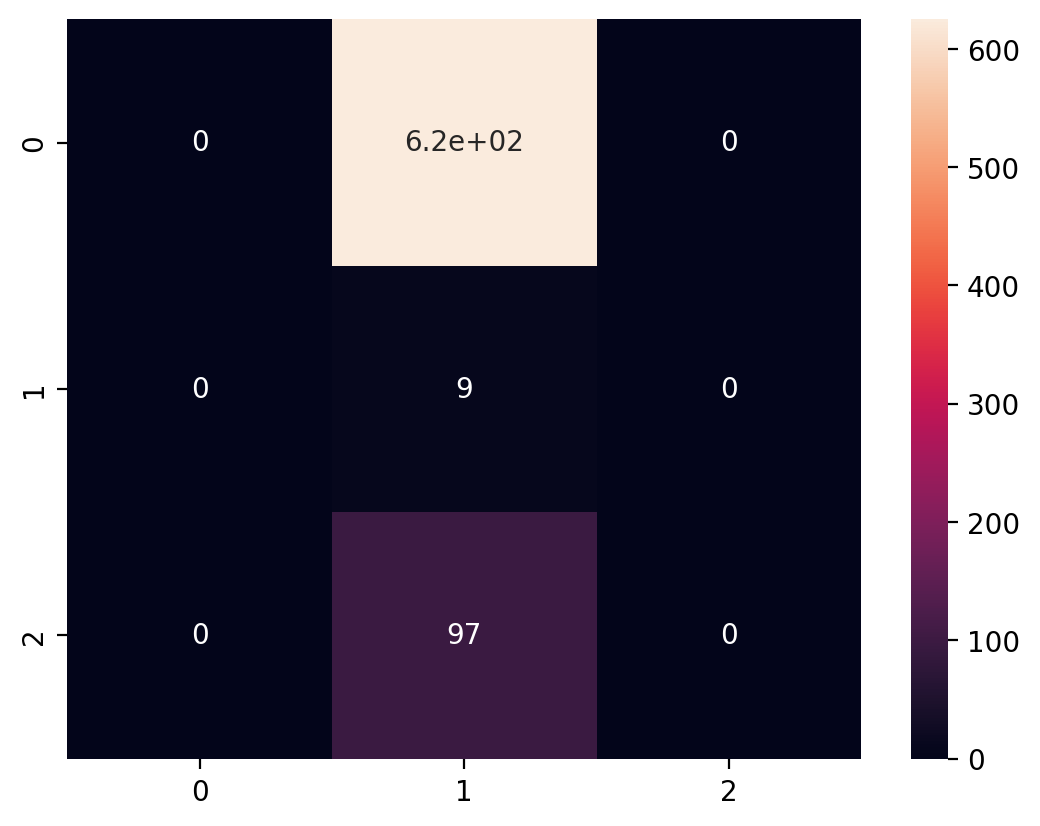

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 512)     14714688  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               25953280  
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
114/114 [==============================] - 27s 103ms/step - loss: 1.2250 - root_mean_squared_error: 1.1068 - val_loss: 0.2521 - val_root_mean_squared_error: 0.5021
Epoch 2/50
114/114 [==============================] - 9s 82ms/step - loss: 0.4254 - root_mean_squared_error: 0.6522 - val_loss: 0.2418 - val_root_mean_squared_error: 0.4918
Epoch 3/50
114/114 [==============================] - 10s 84ms/step - loss: 0.3925 - root_mean_squared_error: 0.6265 - val_loss: 0.2329 - val_root_mean_squared_error: 0.4826
Epoch 4/50
114/114 [==============================] - 9s 83ms/step - loss: 0.3498 - root_mean_squared_error: 0.5915 - val_loss: 0.2490 - val_root_mean_squared_error: 0.4990
Epoch 5/50
114/114 [==============================] - 10s 84ms/step - loss: 0.3365 - root_mean_squared_error: 0.5801 - val_loss: 0.2236 - val_root_mean_squared_error: 0.4729
Epoch 6/50
114/114 [==============================] - 10s 84ms/step - loss: 0.3177 - root_mean_squared_error: 0.5636 - val_loss: 0.

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 12s 304ms/step


predictions  actuals
0       1.001868      0.0
1       1.001868      0.0
2       1.001868      0.0
3       1.001868      0.0
4       1.001868      0.0
..           ...      ...
726     1.001868      2.0
727     1.001868      2.0
728     1.001868      2.0
729     1.001868      2.0
730     1.001868      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      2.0
727          1.0      2.0
728          1.0      2.0
729          1.0      2.0
730          1.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      2.0
727          1.0      2.0
728          1.0      2.0
729          1.0      2.0
730          1.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       625
         1.0       0.01      1.00      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.01       731
   macro avg       0.00      0.33      0.01       731
weighted avg       0.00      0.01      0.00       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       625
         1.0       0.01      1.00      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.01       731
   macro avg       0.00      0.33      0.01       731
weighted avg       0.00      0.01      0.00       731



<Axes: >

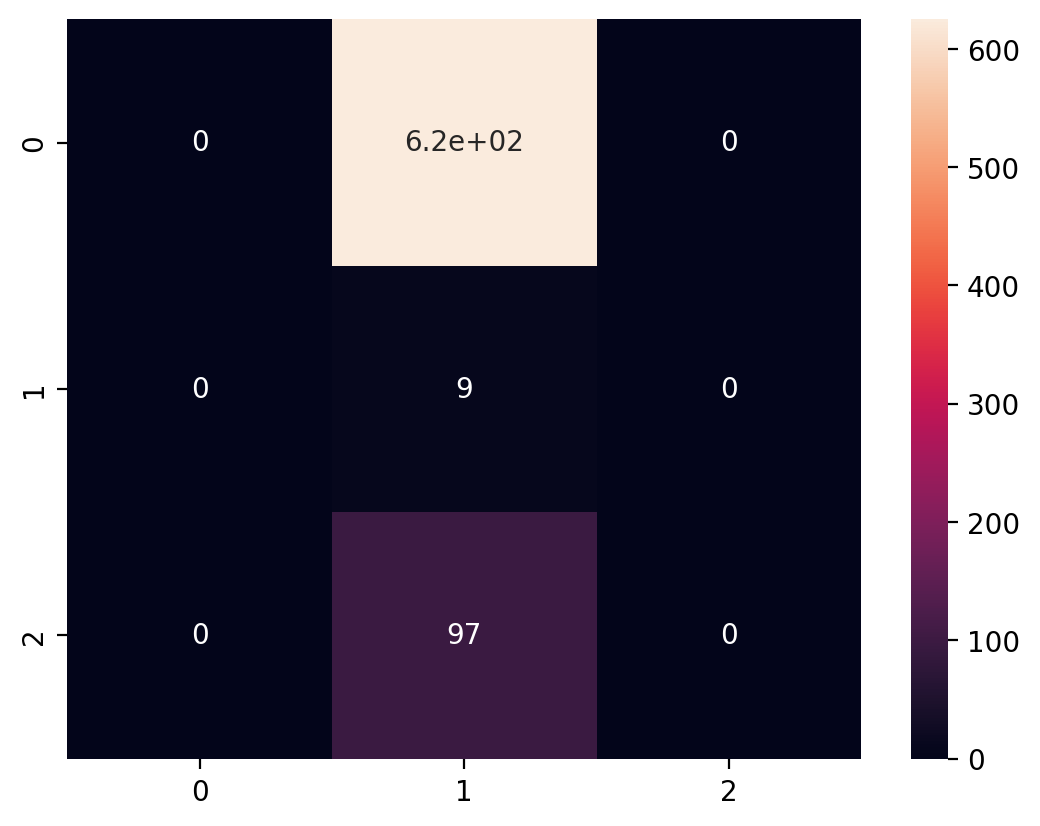

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[5]), fill='white', font=font2)
        draw.text((10, 80), str(dat[9]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[7]), fill='white', font=font3)
        draw.text((10, 185), str(dat[14]), fill='white', font=font3)
        draw.text((90, 10), str(dat[13]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[3]), fill='white', font=font4)
        draw.text((90, 115), str(dat[2]), fill='white', font=font4)
        draw.text((90, 150), str(dat[17]), fill='white', font=font5)
        draw.text((90, 185), str(dat[8]), fill='white', font=font5)
        draw.text((170, 10), str(dat[15]), fill='white', font=font5)
        draw.text((170, 45), str(dat[11]), fill='white', font=font5)
        draw.text((170, 80), str(dat[10]), fill='white', font=font5)
        draw.text((170, 115), str(dat[12]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


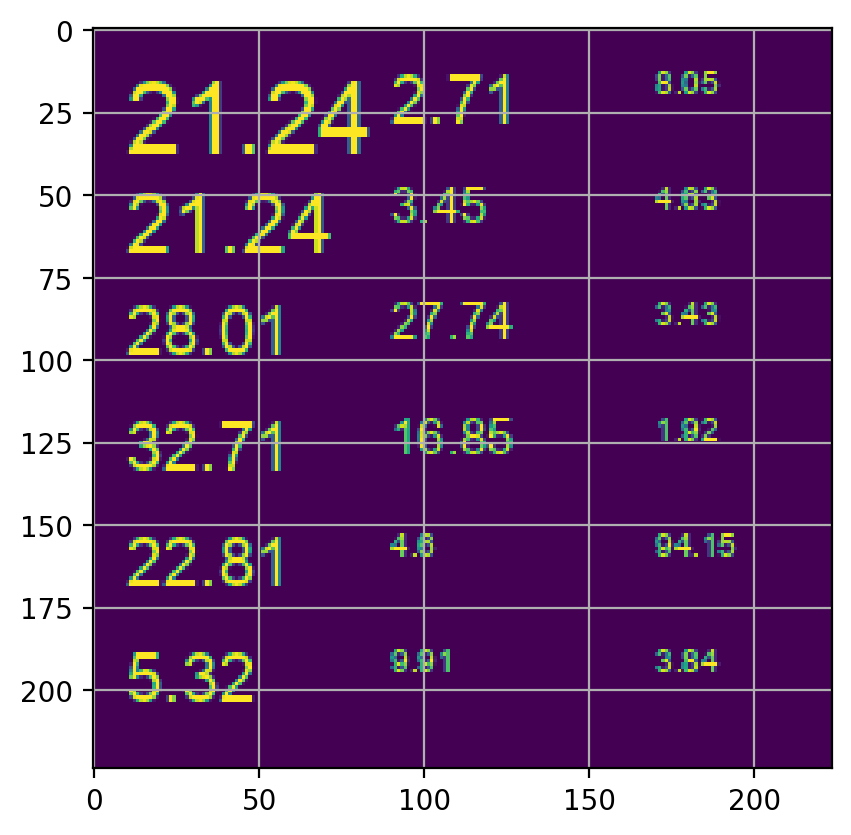

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 12s 188ms/step - loss: 65.9031 - root_mean_squared_error: 8.1181 - val_loss: 0.5821 - val_root_mean_squared_error: 0.7630
Epoch 2/50
37/37 [==============================] - 5s 138ms/step - loss: 0.2974 - root_mean_squared_error: 0.5453 - val_loss: 0.2587 - val_root_mean_squared_error: 0.5086
Epoch 3/50
37/37 [==============================] - 5s 138ms/step - loss: 0.2689 - root_mean_squared_error: 0.5185 - val_loss: 0.2528 - val_root_mean_squared_error: 0.5028
Epoch 4/50
37/37 [==============================] - 5s 139ms/step - loss: 0.2582 - root_mean_squared_error: 0.5081 - val_loss: 0.2407 - val_root_mean_squared_error: 0.4906
Epoch 5/50
37/37 [==============================] - 5s 140ms/step - loss: 0.2620 - root_mean_squared_error: 0.5119 - val_loss: 0.2400 - val_root_mean_squared_error: 0.4899
Epoch 6/50
37/37 [==============================] - 5s 139ms/step - loss: 0.2623 - root_mean_squared_error: 0.5122 - val_loss: 0.2362 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 96ms/step


predictions  actuals
0       0.637742      0.0
1       0.086865      0.0
2       0.086865      0.0
3       0.086865      0.0
4       0.086865      0.0
..           ...      ...
726     0.184381      2.0
727     0.086865      2.0
728     0.086865      2.0
729     0.086865      2.0
730     0.264404      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       625
         1.0       0.03      0.33      0.05         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.71       731
   macro avg       0.29      0.38      0.29       731
weighted avg       0.71      0.71      0.71       731



<Axes: >

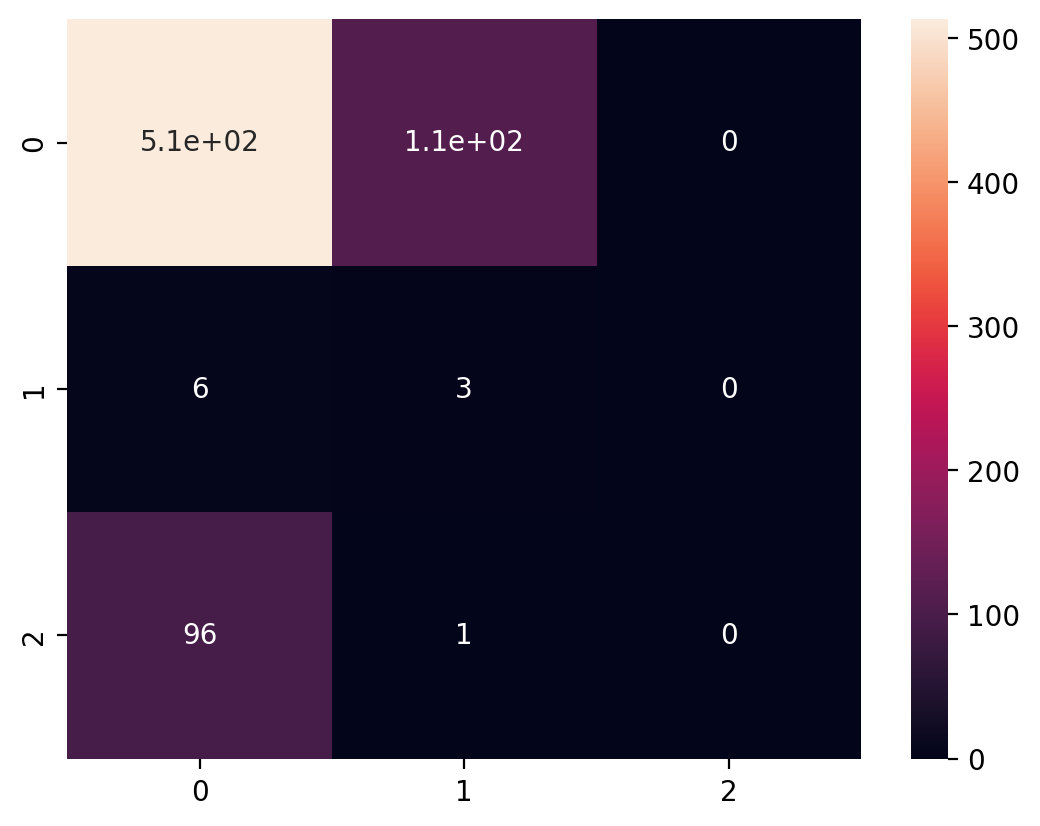

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 28s 364ms/step - loss: 15.7499 - root_mean_squared_error: 3.9686 - val_loss: 0.4136 - val_root_mean_squared_error: 0.6431
Epoch 2/50
37/37 [==============================] - 8s 215ms/step - loss: 0.3024 - root_mean_squared_error: 0.5499 - val_loss: 0.2708 - val_root_mean_squared_error: 0.5204
Epoch 3/50
37/37 [==============================] - 8s 218ms/step - loss: 0.2681 - root_mean_squared_error: 0.5178 - val_loss: 0.2495 - val_root_mean_squared_error: 0.4995
Epoch 4/50
37/37 [==============================] - 8s 217ms/step - loss: 0.2680 - root_mean_squared_error: 0.5176 - val_loss: 0.2425 - val_root_mean_squared_error: 0.4924
Epoch 5/50
37/37 [==============================] - 8s 217ms/step - loss: 0.2751 - root_mean_squared_error: 0.5245 - val_loss: 0.2794 - val_root_mean_squared_error: 0.5286
Epoch 6/50
37/37 [==============================] - 8s 214ms/step - loss: 0.2830 - root_mean_squared_error: 0.5320 - val_loss: 0.2581 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 166ms/step


predictions  actuals
0       0.097113      0.0
1       0.097113      0.0
2       0.097113      0.0
3       0.097113      0.0
4       0.097113      0.0
..           ...      ...
726     0.097113      2.0
727     0.097113      2.0
728     0.097113      2.0
729     0.097113      2.0
730     0.097113      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       625
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.85       731
   macro avg       0.28      0.33      0.31       731
weighted avg       0.73      0.85      0.78       731



<Axes: >

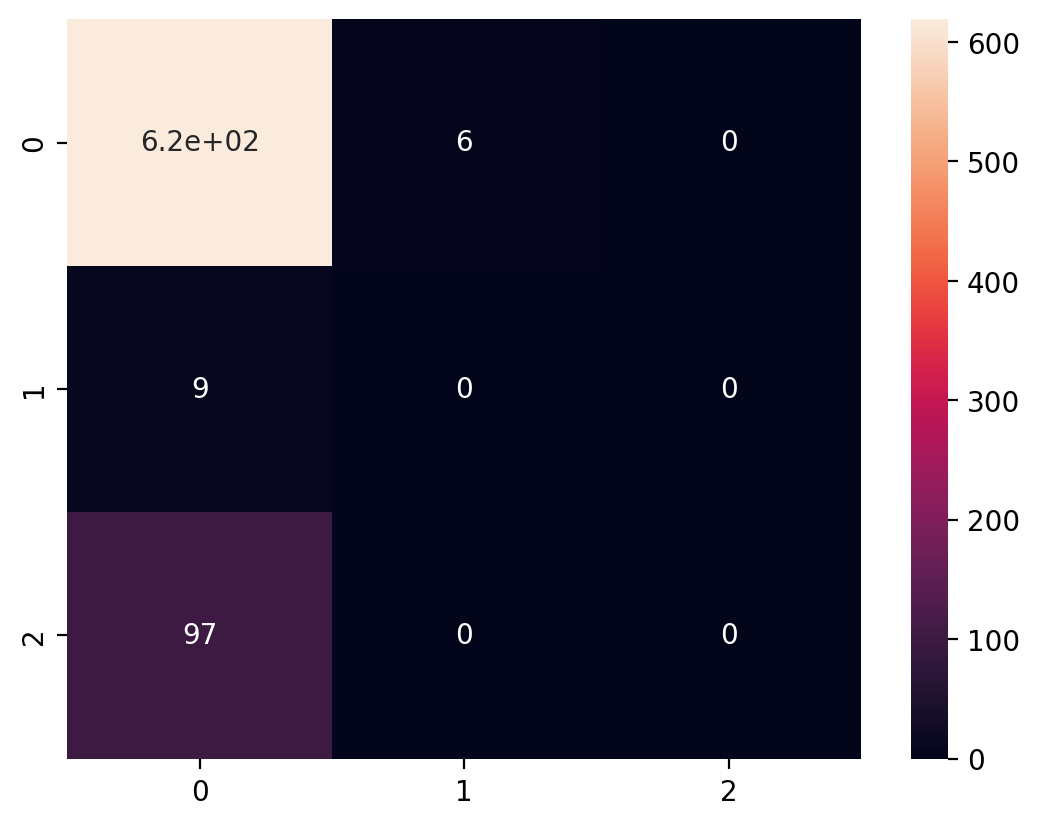

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 8s 132ms/step - loss: 0.3184 - root_mean_squared_error: 0.5643 - val_loss: 0.2616 - val_root_mean_squared_error: 0.5115
Epoch 2/50
37/37 [==============================] - 4s 115ms/step - loss: 0.2749 - root_mean_squared_error: 0.5243 - val_loss: 0.2490 - val_root_mean_squared_error: 0.4990
Epoch 3/50
37/37 [==============================] - 4s 115ms/step - loss: 0.2613 - root_mean_squared_error: 0.5111 - val_loss: 0.2436 - val_root_mean_squared_error: 0.4935
Epoch 4/50
37/37 [==============================] - 4s 115ms/step - loss: 0.2482 - root_mean_squared_error: 0.4981 - val_loss: 0.2664 - val_root_mean_squared_error: 0.5162
Epoch 5/50
37/37 [==============================] - 4s 117ms/step - loss: 0.2579 - root_mean_squared_error: 0.5079 - val_loss: 0.2383 - val_root_mean_squared_error: 0.4881
Epoch 6/50
37/37 [==============================] - 4s 117ms/step - loss: 0.2509 - root_mean_squared_error: 0.5009 - val_loss: 0.2473 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 153ms/step


predictions  actuals
0        0.21214      0.0
1        0.21214      0.0
2        0.21214      0.0
3        0.21214      0.0
4        0.21214      0.0
..           ...      ...
726      0.21214      2.0
727      0.21214      2.0
728      0.21214      2.0
729      0.21214      2.0
730      0.21214      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       625
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.85       731
   macro avg       0.28      0.33      0.31       731
weighted avg       0.73      0.85      0.79       731



<Axes: >

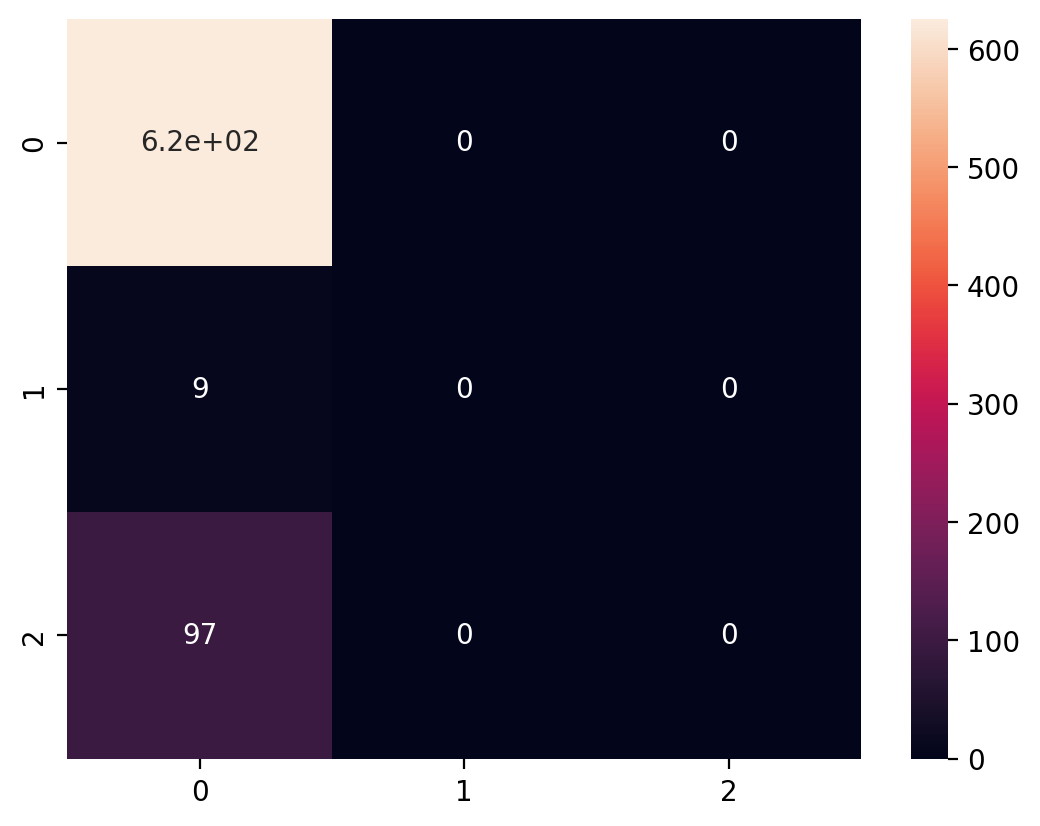

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[5]), fill='white', font=font2)
        draw.text((10, 80), str(dat[9]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[7]), fill='white', font=font3)
        draw.text((10, 185), str(dat[14]), fill='white', font=font3)
        draw.text((90, 10), str(dat[13]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[3]), fill='white', font=font4)
        draw.text((90, 115), str(dat[2]), fill='white', font=font4)
        draw.text((90, 150), str(dat[17]), fill='white', font=font5)
        draw.text((90, 185), str(dat[8]), fill='white', font=font5)
        draw.text((170, 10), str(dat[15]), fill='white', font=font5)
        draw.text((170, 45), str(dat[11]), fill='white', font=font5)
        draw.text((170, 80), str(dat[10]), fill='white', font=font5)
        draw.text((170, 115), str(dat[12]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:604,1:604,2:604},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1812, 18)
After OverSampling, the shape of train_y: (1812,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[ 3.84  , 94.15  , 16.85  , ...,  8.05  ,  3.45  ,  4.6   ],
       [ 3.72  , 94.54  ,  3.69  , ..., 11.72  ,  6.03  ,  5.69  ],
       [ 5.18  , 94.01  ,  3.61  , ...,  9.79  ,  6.62  ,  3.17  ],
       ...,
       [ 0.224 , 94.2347, 13.0348, ...,  7.5173,  1.286 ,  6.2313],
       [ 0.2159, 94.3869, 12.4836, ...,  7.3572,  2.0533,  5.3039],
       [ 0.1379, 94.2538, 13.0879, ...,  8.2262,  1.5424,  6.6838]])

(1812, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


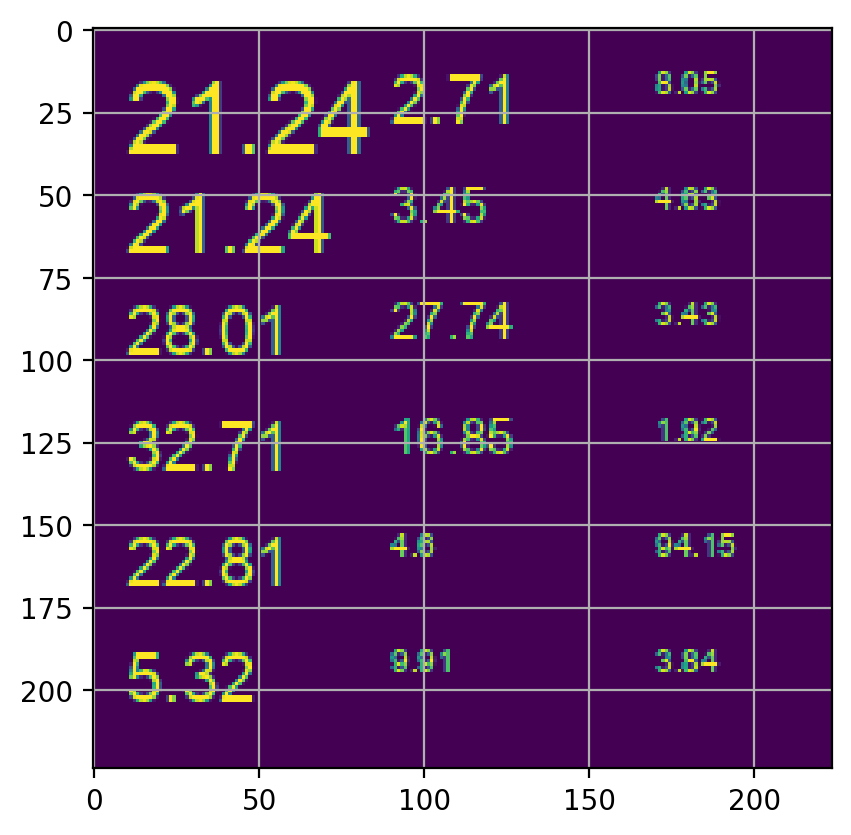

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1812, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1812,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
114/114 [==============================] - 26s 158ms/step - loss: 29.5936 - root_mean_squared_error: 5.4400 - val_loss: 0.2336 - val_root_mean_squared_error: 0.4833
Epoch 2/50
114/114 [==============================] - 15s 133ms/step - loss: 0.5882 - root_mean_squared_error: 0.7670 - val_loss: 0.2303 - val_root_mean_squared_error: 0.4799
Epoch 3/50
114/114 [==============================] - 15s 132ms/step - loss: 0.6620 - root_mean_squared_error: 0.8137 - val_loss: 0.2291 - val_root_mean_squared_error: 0.4787
Epoch 4/50
114/114 [==============================] - 15s 136ms/step - loss: 0.5913 - root_mean_squared_error: 0.7689 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4632
Epoch 5/50
114/114 [==============================] - 15s 133ms/step - loss: 0.5812 - root_mean_squared_error: 0.7624 - val_loss: 0.2101 - val_root_mean_squared_error: 0.4583
Epoch 6/50
114/114 [==============================] - 15s 132ms/step - loss: 0.5520 - root_mean_squared_error: 0.7430 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 137ms/step


predictions  actuals
0       0.515222      0.0
1       0.320908      0.0
2       0.259266      0.0
3       0.340423      0.0
4       0.370694      0.0
..           ...      ...
726     0.351112      2.0
727     0.364495      2.0
728     0.325419      2.0
729     0.363926      2.0
730     0.409022      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       625
         1.0       0.02      0.22      0.03         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.71       731
   macro avg       0.28      0.35      0.29       731
weighted avg       0.71      0.71      0.71       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       625
         1.0       0.02      0.22      0.03         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.71       731
   macro avg       0.28      0.35      0.29       731
weighted avg       0.71      0.71      0.71       731



<Axes: >

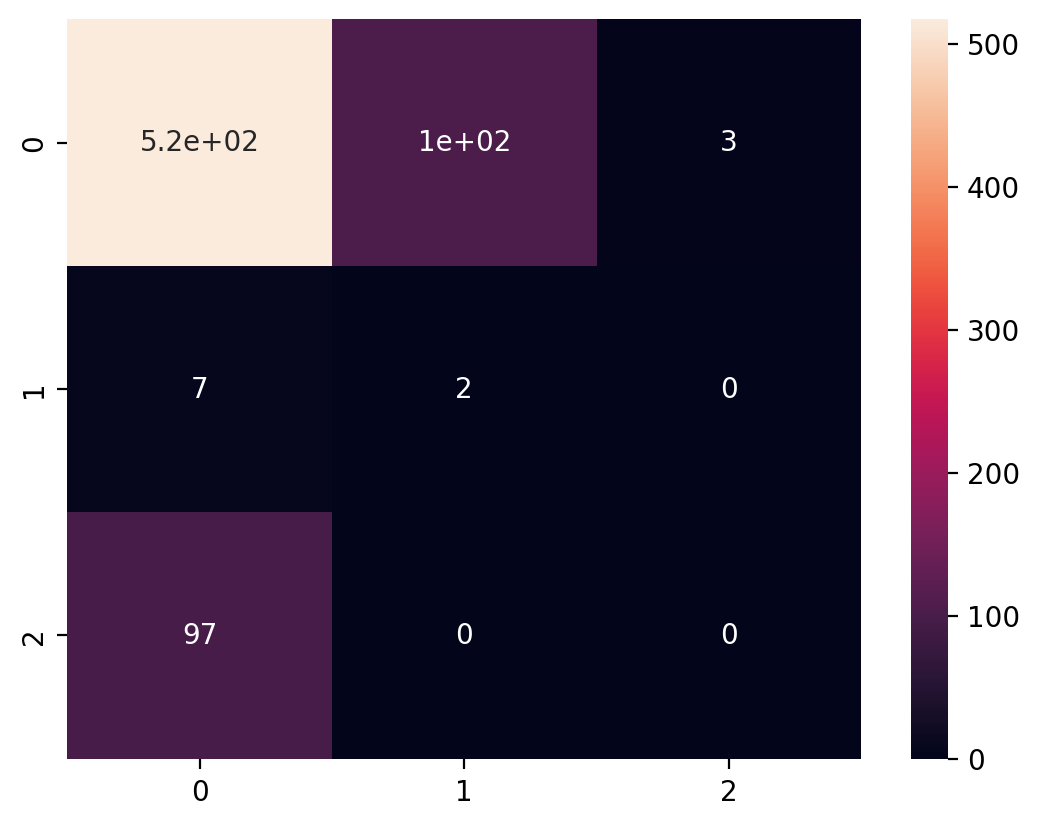

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
114/114 [==============================] - 49s 265ms/step - loss: 12.4155 - root_mean_squared_error: 3.5236 - val_loss: 0.2408 - val_root_mean_squared_error: 0.4907
Epoch 2/50
114/114 [==============================] - 23s 199ms/step - loss: 0.5582 - root_mean_squared_error: 0.7471 - val_loss: 0.2360 - val_root_mean_squared_error: 0.4858
Epoch 3/50
114/114 [==============================] - 23s 198ms/step - loss: 0.4795 - root_mean_squared_error: 0.6924 - val_loss: 0.2200 - val_root_mean_squared_error: 0.4690
Epoch 4/50
114/114 [==============================] - 23s 199ms/step - loss: 0.4990 - root_mean_squared_error: 0.7064 - val_loss: 0.2310 - val_root_mean_squared_error: 0.4806
Epoch 5/50
114/114 [==============================] - 23s 199ms/step - loss: 0.4951 - root_mean_squared_error: 0.7037 - val_loss: 0.2274 - val_root_mean_squared_error: 0.4769
Epoch 6/50
114/114 [==============================] - 23s 200ms/step - loss: 0.4539 - root_mean_squared_error: 0.6737 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 13s 236ms/step


predictions  actuals
0       0.329895      0.0
1       0.208363      0.0
2       0.231697      0.0
3       0.332203      0.0
4       0.329040      0.0
..           ...      ...
726     0.167407      2.0
727     0.168867      2.0
728     0.231273      2.0
729     0.295590      2.0
730     0.312353      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       625
         1.0       0.01      0.11      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.73       731
   macro avg       0.28      0.32      0.29       731
weighted avg       0.72      0.73      0.73       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       625
         1.0       0.01      0.11      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.73       731
   macro avg       0.28      0.32      0.29       731
weighted avg       0.72      0.73      0.73       731



<Axes: >

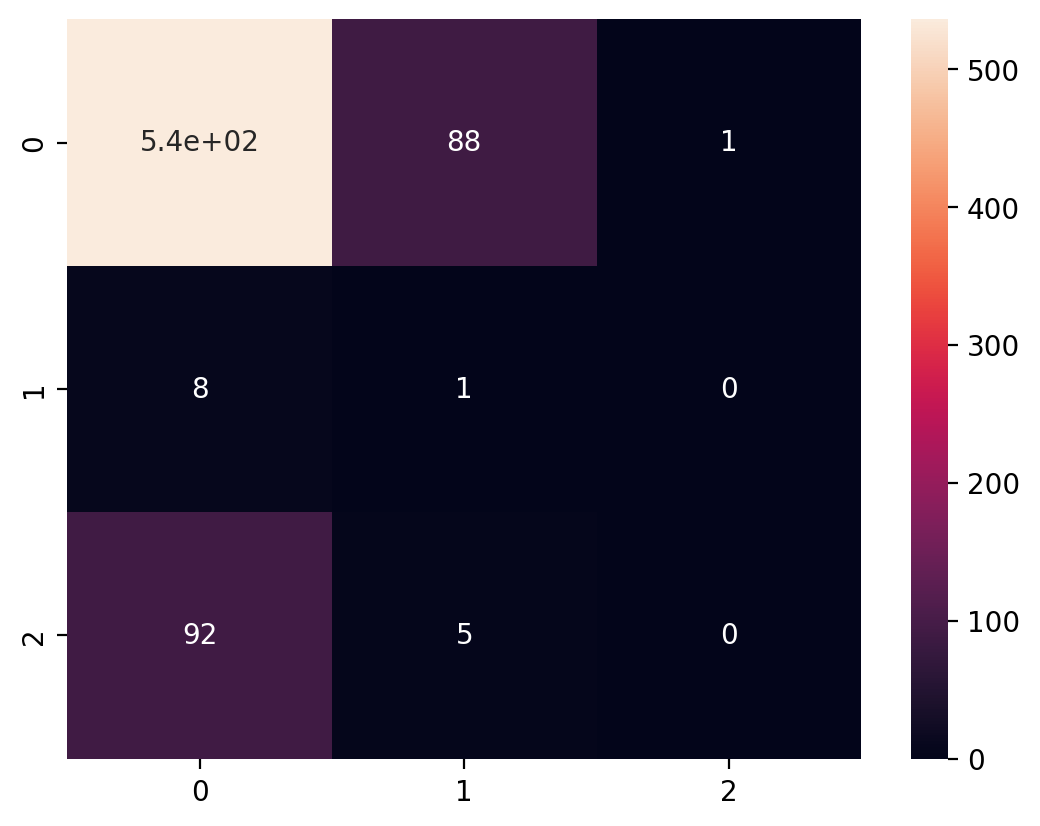

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
114/114 [==============================] - 14s 93ms/step - loss: 1.0706 - root_mean_squared_error: 1.0347 - val_loss: 0.2740 - val_root_mean_squared_error: 0.5234
Epoch 2/50
114/114 [==============================] - 10s 90ms/step - loss: 0.4707 - root_mean_squared_error: 0.6861 - val_loss: 0.2470 - val_root_mean_squared_error: 0.4970
Epoch 3/50
114/114 [==============================] - 10s 90ms/step - loss: 0.4303 - root_mean_squared_error: 0.6559 - val_loss: 0.2251 - val_root_mean_squared_error: 0.4744
Epoch 4/50
114/114 [==============================] - 10s 89ms/step - loss: 0.3905 - root_mean_squared_error: 0.6249 - val_loss: 0.1983 - val_root_mean_squared_error: 0.4453
Epoch 5/50
114/114 [==============================] - 10s 87ms/step - loss: 0.3645 - root_mean_squared_error: 0.6038 - val_loss: 0.2097 - val_root_mean_squared_error: 0.4580
Epoch 6/50
114/114 [==============================] - 10s 87ms/step - loss: 0.3136 - root_mean_squared_error: 0.5600 - val_loss: 0

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 124ms/step


predictions  actuals
0       0.509081      0.0
1       0.291582      0.0
2       0.365425      0.0
3       0.155095      0.0
4       0.558043      0.0
..           ...      ...
726     0.171517      2.0
727     0.098335      2.0
728     0.168127      2.0
729     0.233995      2.0
730     0.186058      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          0.0      2.0
727          0.0      2.0
728          0.0      2.0
729          0.0      2.0
730          0.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       625
         1.0       0.01      0.11      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.72       731
   macro avg       0.28      0.32      0.29       731
weighted avg       0.72      0.72      0.72       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       625
         1.0       0.01      0.11      0.02         9
         2.0       0.00      0.00      0.00        97

    accuracy                           0.72       731
   macro avg       0.28      0.32      0.29       731
weighted avg       0.72      0.72      0.72       731



<Axes: >

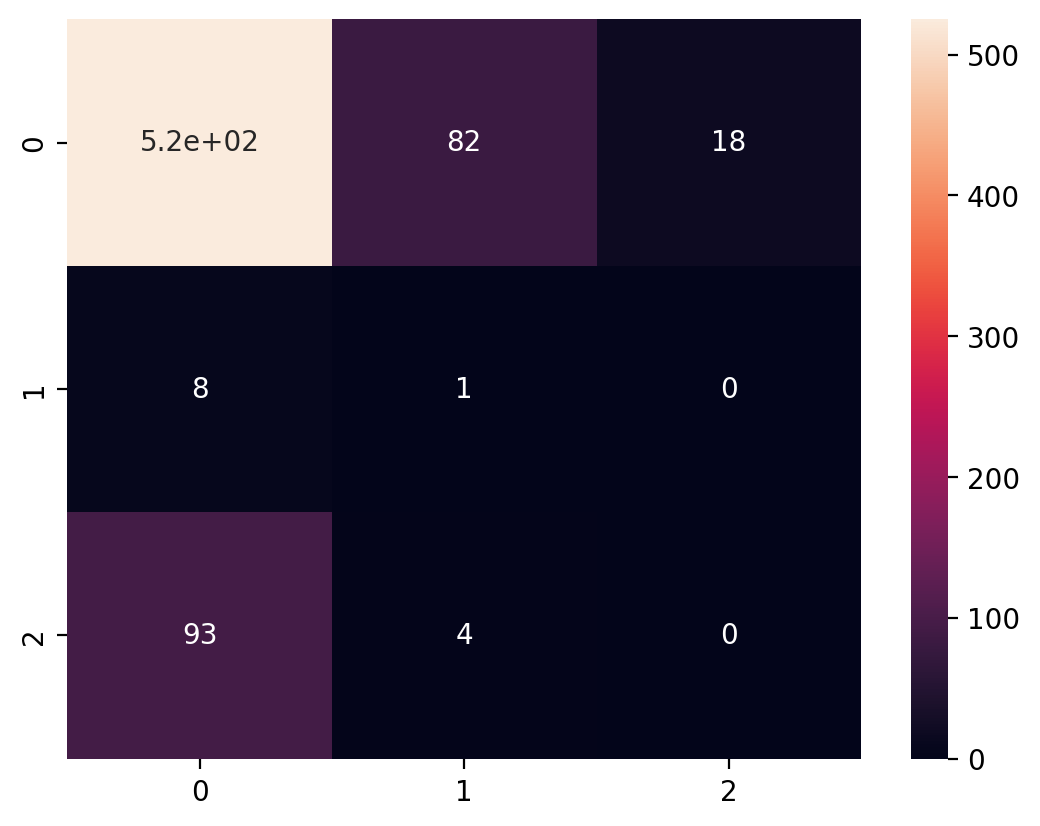

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)